# OCR Cookbook

---

## OCR Exploration and Simple Structured Outputs (Deprecated)
In this cookbook, we will explore the basics of OCR and leverage it together with existing models to achieve structured outputs fueled by our OCR model (we recommend using the new Annotations feature instead for better results).

You may want to do this in case current vision models are not powerful enough, hence enhancing their vision OCR capabilities with the OCR model to achieve better structured data extraction.

---

### Model Used
- Mistral OCR
- Pixtral 12B & Ministral 8B

---

**For a more up to date guide on structured outputs visit our [Annotations cookbook](https://github.com/mistralai/cookbook/blob/main/mistral/ocr/data_extraction.ipynb) on Data Extraction.**


## Setup

First, let's install `mistralai` and download the required files.

In [1]:
%%capture
!pip install mistralai

### Download PDF and image files

In [2]:
%%capture
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/mistral7b.pdf
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/receipt.png

## Mistral OCR with PDF

We will need to set up our client. You can create an API key on our [Plateforme](https://console.mistral.ai/api-keys/).

In [4]:
# Initialize Mistral client with API key
from mistralai import Mistral
from google.colab import userdata

api_key = userdata.get('MISTRAL_API_KEY') # Replace with your API key
client = Mistral(api_key=api_key)

There are two types of files you can apply OCR to:
- 1. PDF files
- 2. Image files

Let's start with a PDF file:

In [5]:
# Import required libraries
from pathlib import Path
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json

# Verify PDF file exists
pdf_file = Path("test.pdf")
assert pdf_file.is_file()

# Upload PDF file to Mistral's OCR service
uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)

# Get URL for the uploaded file
signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

# Process PDF with OCR, including embedded images
pdf_response = client.ocr.process(
    document=DocumentURLChunk(document_url=signed_url.url),
    model="mistral-ocr-latest",
    include_image_base64=True
)

# Convert response to JSON format
response_dict = json.loads(pdf_response.model_dump_json())

print(json.dumps(response_dict, indent=4)[0:1000]) # check the first 1000 characters

{
    "pages": [
        {
            "index": 0,
            "markdown": "\u0bb5\u0bbe\u0b95\u0bcd\u0b95\u0bbe\u0bb3\u0bb0\u0bcd \u0baa\u0b9f\u0bcd\u0b9f\u0bbf\u0baf\u0bb2\u0bcd 2022 S22 \u0ba4\u0bae\u0bbf\u0bb4\u0bcd\u0ba8\u0bbe\u0b9f\u0bc1\n\n|  \u0b9a\u0b9f\u0bcd\u0b9f\u0bae\u0ba9\u0bcd\u0bb1\u0ba4\u0bcd \u0ba4\u0bca\u0b95\u0bc1\u0ba4\u0bbf \u0b8e\u0ba3\u0bcd, \u0baa\u0bc6\u0baf\u0bb0\u0bcd \u0bae\u0bb1\u0bcd\u0bb1\u0bc1\u0bae\u0bcd \u0b92\u0ba4\u0bc1\u0b95\u0bcd\u0b95\u0bc0\u0b9f\u0bcd\u0b9f\u0bc1\u0ba4\u0bcd\u0ba4\u0b95\u0bc1\u0ba4\u0bbf \u0ba8\u0bbf\u0bb2\u0bc8 : 110 - \u0b95\u0bcb\u0baf\u0bae\u0bcd\u0baa\u0bc1\u0ba4\u0bcd\u0ba4\u0bc2\u0bb0\u0bcd (\u0bb5\u0b9f\u0b95\u0bcd\u0b95\u0bc1) (\u0baa\u0bca\u0ba4\u0bc1) | \u0baa\u0bbe\u0b95\u0bae\u0bcd \u0b8e\u0ba3\u0bcd  |\n| --- | --- |\n|   | 1  |\n\n\u0b9a\u0b9f\u0bcd\u0b9f\u0bae\u0ba9\u0bcd\u0bb1\u0ba4\u0bcd \u0ba4\u0bca\u0b95\u0bc1\u0ba4\u0bbf \u0b85\u0b9f\u0b99\u0bcd\u0b95\u0bbf\u0baf\u0bc1\u0bb3\u0bcd\u0bb3 \u0ba8\u0bbe\u0b9f\u0

View the result with the following:

வாக்காளர் பட்டியல் 2022 S22 தமிழ்நாடு

|  சட்டமன்றத் தொகுதி எண், பெயர் மற்றும் ஒதுக்கீட்டுத்தகுதி நிலை : 110 - கோயம்புத்தூர் (வடக்கு) (பொது) | பாகம் எண்  |
| --- | --- |
|   | 1  |

சட்டமன்றத் தொகுதி அடங்கியுள்ள நாடாளுமன்றத் தொகுதியின் எண், பெயர் மற்றும் ஒதுக்கீட்டுத்தகுதி நிலை : 20 - கோயம்புத்தூர் (பொது)

1.திருத்தத்தின் விவரங்கள்

|  திருத்தப்படும் ஆண்டு | 2022 | பட்டியல் வகை  |
| --- | --- | --- |
|  தகுதியேற்படுத்தும் நாள் | 01-01-2022 | 01-11-2021 அன்று வெளியிடப்பட்ட, சிறப்பு சுருக்கமுறைத்  |
|  திருத்தத்தின் வகை | சிறப்பு சுருக்கமுறைத் | திருத்தம், 2022 ன் அடிப்படைப் பட்டியலோடு  |
|   | திருத்தம், 2022 | ஒருங்கிணைக்கப்பட்ட அத்திருத்தத்தின் சேர்த்தல்கள்  |
|   |  | அடங்கிய துணைப்பட்டியல் -1 (துணை பட்டியல் 1 உள்ள  |
|  பட்டியல் வெளியிடப்பட்ட நாள் | 05-01-2022 | நீக்கங்களும் திருத்தங்களும் அடிப்படை பட்டியலில்  |
|   |  | குறியிடப்பட்டுள்ளன )  |

1.பாகத்தின் விவரங்கள் மற்றும் வாக்குச்சாவடிக்கான பரப்பளவு

இந்த பாகத்தில் பாகத்தின் கீழ்வரும் பிரிவின் எண் மற்றும் பெயர்

|  1. வார்டு எண் 17 அருண் நகர் | முக்கிய நகரம் (அர் கிராமம் | வடவள்ளி  |
| --- | --- | --- |
|  2. வார்டு எண் 17 வி ஓ நகர் | கி.நி.அ மண்டலம் | வடவள்ளி  |
|  3. வார்டு எண் 17 மணியகாரர் தோட்டம் | பிரகா | வடவள்ளி  |
|  4. வார்டு எண் 17 காளிதால் நகர் | காவல் நிலையம் | வடவள்ளி  |
|  999. அயல்நாடு வாழ் வாக்காளர்கள் | வட்டம் | பேருர்  |
|   | மாவட்டம் | கோயம்புத்தூர்  |
|   | அஞ்சலகக்குறியீட்டெண் | 841041  |

1.வாக்குச் சாவடியின் விவரங்கள்

|  வாக்குச்சாவடியின் எண் மற்றும் பெயர் | வாக்குச்சாவடியின் வகைப்பாடு (ஆண் / பெண் / பொது ) |   |
| --- | --- | --- |
|  1-மாநகராட்சி நடுநிலைப்பள்ளி(தெற்கு), தொண்டாமுத்தூர் | துணை வாக்குச்சாவடிகளின் எண்ணிக்கை | 0  |
|  ரோடு,வடவள்ளி-841041 |  |   |

1.வாக்குச்சாவடியின் முகவரி மாநகராட்சி நடுநிலைப்பள்ளி வடபுற கட்டிடம் கிழக்குப் பார்த்த வடக்கிலிருந்து முதல் அறை வடவள்ளி தெற்கு, தொண்டாமுத்தூர் ரோடு வடவள்ளி 841041

4.வாக்காளர்களின் எண்ணிக்கை

|  தொடங்கும் வரிசை எண் | முடியும் வரிசை எண் | நிகர வாக்காளர்களின் எண்ணிக்கை  |
| --- | --- | --- |
|   |  | 0  |
|  1 | 1253 | 657  |

வாக்காளர் பதிவு அதிகாரியின் கையொப்பம்

மொத்த பக்கங்கள் 48 - பக்கம் 1

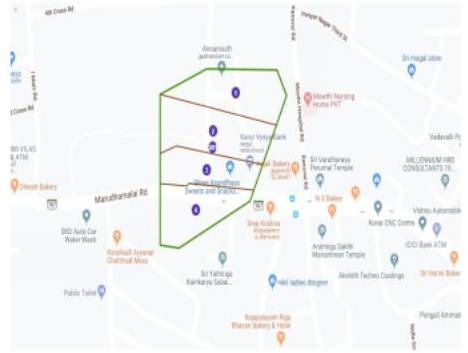

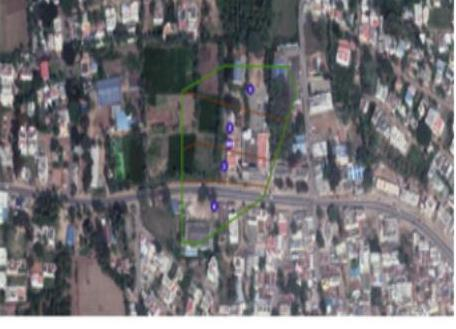

# **Polling Station Building Front View**

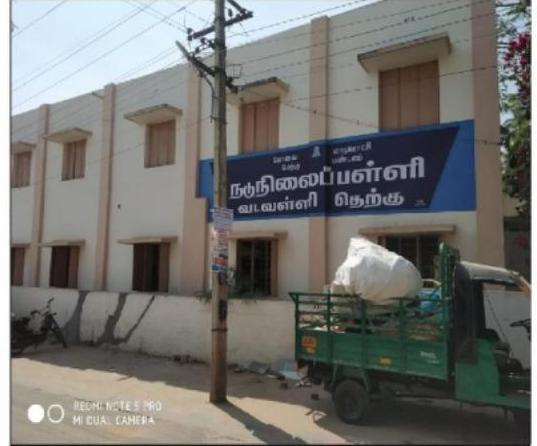

# **Polling Station Front View**

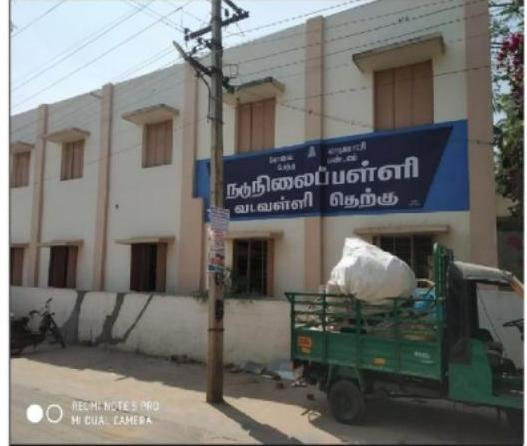

# **CAD View**

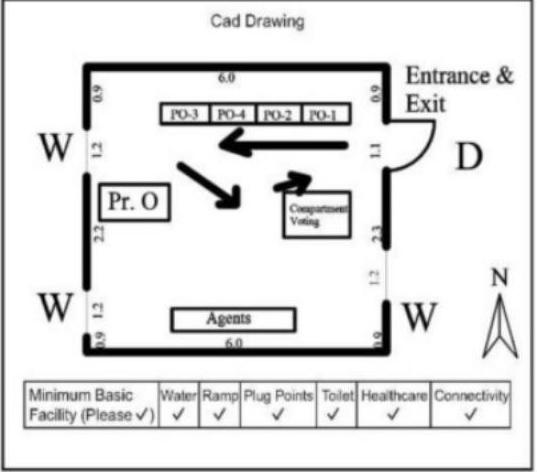

# **Key MAP View**

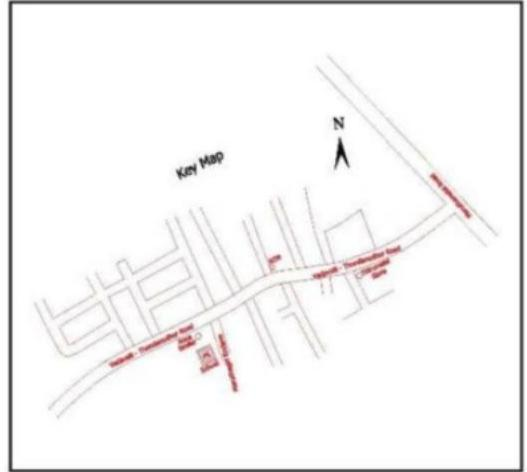

# பிளவு எண் மற்றும் பெயர் : 1-வார்டு எண் 17 அருண் நகர்

|  1 | IBU2609337 | 2 | IBU0520122 | 3 | IBU0263616  |
| --- | --- | --- | --- | --- | --- |
|  பெயர் : விமல்
தந்தை பெயர் : பத்மநாபன்
வீட்டு எண் : 42
வயது : 47 பாலினம் : பெண் |  | பெயர் : புருஷோத்தமன்
தந்தை பெயர் : கிருஷ்ணமூர்த்தி
வீட்டு எண் : 74
வயது : 74 பாலினம் : ஆண் |  | பெயர் : துரைவேலன்
தந்தை பெயர் : முனிசாமி
வீட்டு எண் : 74
வயது : 69 பாலினம் : ஆண் |   |
|  4 | IBU0520601 | 5 | IBU0856781 | 6 | IBU0518720  |
|  பெயர் : பிரபா
கணவர் பெயர் : ரகோத்தமன்
வீட்டு எண் : 74
வயது : 66 பாலினம் : பெண் |  | பெயர் : கோகுலகிருஷ்ணன்
தந்தை பெயர் : சுப்பிரமணியன்
வீட்டு எண் : 74
வயது : 45 பாலினம் : ஆண் |  | பெயர் : திரேசா
கணவர் பெயர் : சங்கர்
வீட்டு எண் : 74
வயது : 42 பாலினம் : பெண் |   |
|  7 | IBU0748830 | 8 | IBU0263632 | 9 | IBU0263640  |
|  பெயர் : ஜார்ஜ்கிருபாகர்
தந்தை பெயர் : டேவிட்
சுந்திரமோகன்
வீட்டு எண் : 74
வயது : 40 பாலினம் : ஆண் |  | பெயர் : இன்பவள்ளிது
தந்தை பெயர் : துரைவேலன்
வீட்டு எண் : 74
வயது : 39 பாலினம் : ஆண் |  | பெயர் : ஆர்த்தி
தந்தை பெயர் : துரைவேலன்
வீட்டு எண் : 74
வயது : 37 பாலினம் : பெண் |   |
|  10 | IBU1621994 | 11 | IBU1622002 | 12 | IBU2735512  |
|  பெயர் : முத்துசாமி
தந்தை பெயர் : கிருஷ்ணசாமி
வீட்டு எண் : 1
வயது : 91 பாலினம் : ஆண் |  | பெயர் : பிரிஜேஷ் பார்னி
கணவர் பெயர் : பார்னி
வீட்டு எண் : 1
வயது : 86 பாலினம் : பெண் |  | பெயர் : ராதாகிருஷ்ணன்
தந்தை பெயர் : ரங்கசாமிராஜு
வீட்டு எண் : 1
வயது : 80 பாலினம் : ஆண் |   |
|  13 | IBU1622010 | 14 | IBU0856872 | 15 | IBU0174029  |
|  பெயர் : ஸ்ரீனிவாசன்
தந்தை பெயர் : ராமச்சந்திரன்
வீட்டு எண் : 1
வயது : 76 பாலினம் : ஆண் |  | பெயர் : ஜெகதீசன்
தந்தை பெயர் : சஞ்சீவி
வீட்டு எண் : 1
வயது : 77 பாலினம் : ஆண் |  | பெயர் : கிருஸ்ணமூர்த்தி
தந்தை பெயர் : இராமன்
வீட்டு எண் : 1
வயது : 77 பாலினம் : ஆண் |   |
|  16 | IBU2735520 | 17 | IBU0263285 | 18 | IBU0174813  |
|  பெயர் : லலிதா
கணவர் பெயர் : ராதாகிருஷ்ணன்
வீட்டு எண் : 1
வயது : 76 பாலினம் : பெண் |  | பெயர் : லலிதா
கணவர் பெயர் : கிருஷ்னமூர்த்தி
வீட்டு எண் : 1
வயது : 71 பாலினம் : பெண் |  | பெயர் : முரளிதரன்
தந்தை பெயர் : குருசாமி
வீட்டு எண் : 1
வயது : 70 பாலினம் : ஆண் |   |
|  19 | IBU1392265 | 20 | IBU1622034 | 21 | IBU1622058  |
|  பெயர் : சிவராமன்
தந்தை பெயர் : சிதம்பரம்
வீட்டு எண் : 1
வயது : 70 பாலினம் : ஆண் |  | பெயர் : ராஜமானிக்கம்
தந்தை பெயர் : மாரியப்பன்
வீட்டு எண் : 1
வயது : 67 பாலினம் : ஆண் |  | பெயர் : கண்மனிசிந்தனா
கணவர் பெயர் : ராஜமானிக்கம்
வீட்டு எண் : 1
வயது : 63 பாலினம் : பெண் |   |
|  22 | IBU1622066 | 23 | IBU1622074 | 24 | IBU0856716  |
|  பெயர் : கோபாலகிருஷ்ணன்
தந்தை பெயர் : குருசாமி
வீட்டு எண் : 1
வயது : 67 பாலினம் : ஆண் |  | பெயர் : மணிமேகலை
கணவர் பெயர் : சிவகுருநாதன்
வீட்டு எண் : 1
வயது : 66 பாலினம் : பெண் |  | பெயர் : பெருமால்சாமி
தந்தை பெயர் : தேவண்ணன்
வீட்டு எண் : 1
வயது : 66 பாலினம் : ஆண் |   |
|  25 | IBU0856740 | 26 | IBU0520155 | 27 | IBU0519561  |
|  பெயர் : கலாவதி
கணவர் பெயர் : பெருமாள்சாமி
வீட்டு எண் : 1
வயது : 64 பாலினம் : பெண் |  | பெயர் : சோமசுந்தரம்
தந்தை பெயர் : எசுப்பன்
வீட்டு எண் : 1
வயது : 63 பாலினம் : ஆண் |  | பெயர் : மாலா
தந்தை பெயர் : சிவராமன்
வீட்டு எண் : 1
வயது : 61 பாலினம் : பெண் |   |
|  28 | IBU1499672 | 29 | IBU1189612 | 30 | IBU1499680  |
|  பெயர் : ஜெயலட்சுமி
தாய் பெயர் : வீலா
வீட்டு எண் : 1
வயது : 60 பாலினம் : பெண் |  | பெயர் : கதிரவன்
தந்தை பெயர் : மாரிமுத்து
வீட்டு எண் : 1
வயது : 60 பாலினம் : ஆண் |  | பெயர் : வெங்கடாசலம்
தந்தை பெயர் : கருப்புசாமி
வீட்டு எண் : 1
வயது : 47 பாலினம் : ஆண் |   |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1

|  IDU1499698 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : அமிராமியண்டாரு - கணவர் பெயர் : உதயகிருஷ்ணாபண்டாரு - வீட்டு எண் : 1 - வயது : 47 பாலினம் : பெண்

|  IDU1499722 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : அனிமேகலா - கணவர் பெயர் : வெங்கடாசலம் - வீட்டு எண் : 1 - வயது : 44 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : விக்னேஷ்ராஜ்குமார் - தந்தை பெயர் : ராஜமாணிக்கம் - வீட்டு எண் : 1 - வயது : 40 பாலினம் : ஆண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : உமா - கணவர் பெயர் : சிதம்பரம் - வீட்டு எண் : 1 - வயது : 38 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : விக்னேஷ்ராஜ்குமார் - தந்தை பெயர் : ராஜமாணிக்கம் - வீட்டு எண் : 1 - வயது : 38 பாலினம் : ஆண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : உமா - கணவர் பெயர் : சிதம்பரம் - வீட்டு எண் : 1 - வயது : 38 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : விக்னேஷ்ராஜ்குமார் - தந்தை பெயர் : ராஜமாணிக்கம் - வீட்டு எண் : 1 - வயது : 40 பாலினம் : ஆண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : உமா - கணவர் பெயர் : சிதம்பரம் - வீட்டு எண் : 1 - வயது : 38 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : மம்தாதேவி - கணவர் பெயர் : பிரதீப் - வீட்டு எண் : 1 - வயது : 34 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : உமா - கணவர் பெயர் : சிதம்பரம் - வீட்டு எண் : 1 - வயது : 26 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : மம்தாதேவி - கணவர் பெயர் : பிரதீப் - வீட்டு எண் : 1 - வயது : 34 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : சதுரங்கா - தந்தை பெயர் : சங்குருநாதன் - வீட்டு எண் : 1 - வயது : 26 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : சதுரங்கா - தந்தை பெயர் : சங்குருநாதன் - வீட்டு எண் : 1 - வயது : 26 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : சதுரங்கா - தந்தை பெயர் : சங்குருநாதன் - வீட்டு எண் : 1 - வயது : 26 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : தேவேஷ் - தந்தை பெயர் : பெருமாள்சாமி - வீட்டு எண் : 1 - வயது : 30 பாலினம் : ஆண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : தேவேஷ் - தந்தை பெயர் : பெருமாள்சாமி - வீட்டு எண் : 1 - வயது : 30 பாலினம் : ஆண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : திவ்யா - தந்தை பெயர் : ராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : திவ்யா - தந்தை பெயர் : ராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : தேவேஷ் - தந்தை பெயர் : ராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ | |

## பெயர் : ஜஸ்வர்யாசுப்பராமன் - தந்தை பெயர் : சுப்பராமன் - வீட்டு எண் : 1 - வயது : 25 பாலினம் : பெண்

|  IDU1499771 | |
| --- | --- |
|  ------------------------------------------------------------------------------------------------------------------------------ |

|  61 | IBU0520106 | 62 | IBU0519520 | 63 | IBU0857037  |
| --- | --- | --- | --- | --- | --- |
|  பெயர் : பிரதீபா - |  | பெயர் : மேரி ஸ்டெபி - |  | பெயர் : ஜோதிராமசந்திரன் - |   |
|  கணவர் பெயர் : கிஷோர் - | Photo is | தந்தை பெயர் : ஜோசப் - |  | கணவர் பெயர் : ராமசந்திரன் - | Photo is  |
|  வீட்டு எண் : 18 | Available | வீட்டு எண் : 18 | Photo is | வீட்டு எண் : 18 | Available  |
|  வயது : 38 பாலினம் : பெண் |  | வயது : 34 பாலினம் : பெண் |  | வயது : 61 பாலினம் : பெண் |   |
|  64 | IBU3262896 | 65 | IBU0263343 | 66 | IBU1392273  |
|  பெயர் : சுகவனம் - |  | பெயர் : கதர்சனா பிரசன்னா - |  | பெயர் : சங்கர் - |   |
|  மனைவி பெயர் : சசிகலா |  | கணவர் பெயர் : பிரசன்னா - |  | தந்தை பெயர் : சந்திரசேகரன் - |   |
|  சுகவனம் | Photo is | வீட்டு எண் : 1-0 | Photo is | வீட்டு எண் : 41 | Photo is  |
|  வீட்டு எண் : 1-ஸீ | Available | வயது : 38 பாலினம் : பெண் | Available | வயது : 53 பாலினம் : ஆண் | Available  |
|  வயது : 62 பாலினம் : ஆண் |  |  |  |  |   |
|  67 | IBU1392117 | 68 | IBU1388362 | 69 | IBU3362852  |
|  பெயர் : கனகவல்லி - |  | பெயர் : சாரதா பத்மநாபன் - |  | பெயர் : ராதா சாமி |   |
|  கணவர் பெயர் : சந்திரசேகரன் - | Photo is | கணவர் பெயர் : பத்மநாபன் - |  | கணவர் பெயர் : சாமி |   |
|  வீட்டு எண் : 4-1 | Available | வீட்டு எண் : A-1 | Photo is | வீட்டு எண் : 41 | Photo is  |
|  வயது : 78 பாலினம் : பெண் |  | வயது : 63 பாலினம் : பெண் | Available | வயது : 37 பாலினம் : பெண் | Available  |
|  70 | MPH7543903 | 71 | MPH7543911 | 72 | IBU1987494  |
|  பெயர் : ராமசந்திரன் - |  | பெயர் : சாரதாராமசந்திரன் - |  | பெயர் : சாந்தினி - |   |
|  தந்தை பெயர் : சிவராமன் - |  | கணவர் பெயர் : ராமசந்திரன் - |  | கணவர் பெயர் : பழனிசாமி - |   |
|  வீட்டு எண் : 81 | Photo is | வீட்டு எண் : 81 | Photo is | வீட்டு எண் : 51 | Photo is  |
|  வயது : 80 பாலினம் : ஆண் | Available | வயது : 69 பாலினம் : பெண் | Available | வயது : 65 பாலினம் : பெண் | Available  |
|  73 | IBU0175083 | 74 | IBU0175091 | 75 | IBU1392141  |
|  பெயர் : சுப்பராயன் - |  | பெயர் : கலாவதி - |  | பெயர் : சரஸ்வதி - |   |
|  தந்தை பெயர் : சாம்பசிவன் - |  | கணவர் பெயர் : சுப்பராயன் - |  | கணவர் பெயர் : ஸ்ரீனிவாசன் - |   |
|  வீட்டு எண் : 0-1 | Photo is | வீட்டு எண் : 0-1 | Photo is | வீட்டு எண் : 41 | Photo is  |
|  வயது : 57 பாலினம் : ஆண் | Available | வயது : 55 பாலினம் : பெண் | Available | வயது : 74 பாலினம் : பெண் | Available  |
|  76 | IBU1895705 | 77 | IBU1392323 | 78 | IBU2433589  |
|  பெயர் : ஜீவன் - |  | பெயர் : ந சிவகுருநாதன் - |  | பெயர் : சந்திரசேகர் - |   |
|  தந்தை பெயர் : ராமமூர்த்தி - |  | தந்தை பெயர் : சி நடராஜன் - |  | தந்தை பெயர் : சுப்ரமணியன் - |   |
|  வீட்டு எண் : 01 | Photo is | வீட்டு எண் : 01 | Photo is | வீட்டு எண் : 41 | Photo is  |
|  வயது : 67 பாலினம் : ஆண் | Available | வயது : 56 பாலினம் : ஆண் | Available | வயது : 54 பாலினம் : ஆண் | Available  |
|  79 | IBU1895747 | 80 | IBU1189570 | 81 | IBU2433555  |
|  பெயர் : விஜயலட்சுமி - |  | பெயர் : ஷங்கர் ஸ்ரீனிவாசன் - |  | பெயர் : ரேணுகா - |   |
|  தந்தை பெயர் : ஜீவன் - |  | தந்தை பெயர் : ஸ்ரீனிவாசன் |  | கணவர் பெயர் : சந்திரசேகர் - |   |
|  வீட்டு எண் : 01 | Photo is | நாகராஜன் | Photo is | வீட்டு எண் : 41 | Photo is  |
|  வயது : 53 பாலினம் : ஆண் | Available | வீட்டு எண் : 01 | Available | வயது : 48 பாலினம் : பெண் | Available  |
|  82 | IBU1392331 | 83 | IBU2613305 | 84 | IBU0806646  |
|  பெயர் : சுப்ரியா - |  | பெயர் : விஷ்வநாதன் - |  | பெயர் : குரூராஜன் - |   |
|  கணவர் பெயர் : ஷங்கர் - |  | தந்தை பெயர் : சிவா குருநாதன் - |  | தந்தை பெயர் : வெங்கட் ராமன் - |   |
|  வீட்டு எண் : 01 | Photo is | வீட்டு எண் : 18 | Photo is | வீட்டு எண் : 41 | Photo is  |
|  வயது : 42 பாலினம் : பெண் | Available | வயது : 22 பாலினம் : ஆண் | Available | வயது : 68 பாலினம் : ஆண் | Available  |
|  85 | IBU0806653 | 86 | IBU0175067 | 87 | IBU0000927  |
|  பெயர் : உஷா - |  | பெயர் : ச்ரோஜா - |  | பெயர் : சங்கர் - |   |
|  கணவர் பெயர் : குரூராஜன் - |  | கணவர் பெயர் : கிருஷ்ணமூர்த்தி - |  | தந்தை பெயர் : சண்முகம் - |   |
|  வீட்டு எண் : 41 | Photo is | வீட்டு எண் : F1 | Photo is | வீட்டு எண் : F1 | Photo is  |
|  வயது : 62 பாலினம் : பெண் | Available | வயது : 74 பாலினம் : பெண் | Available | வயது : 41 பாலினம் : ஆண் | Available  |
|  88 | IBU3321833 | 89 | KXQ4818985 | 90 | RAZ2063956  |
|  பெயர் : சுப்ரமணியன் - |  | பெயர் : கிரிஜா - |  | பெயர் : கோபலரத்னம் - |   |
|  தந்தை பெயர் : கணேஷ் |  | கணவர் பெயர் : சுப்ரமணியன் - |  | தந்தை பெயர் : ராமச்சந்திரன் - |   |
|  வீட்டு எண் : அடுக்கு வீடு ஏ | Photo is | வீட்டு எண் : அடுக்கு வீடு ஏ | Photo is | வீட்டு எண் : பிளாட் எண் பீ-1 | Photo is  |
|  1-வது தளம் | Available | 1-வது தளம் | Available | வயது : 64 பாலினம் : ஆண் | Available  |
|  வயது : 41 பாலினம் : ஆண் |  | வயது : 37 பாலினம் : பெண் |  |  |   |

# பாகம் எண் : 1

## பி.நூறில் வியாபாரம்

பிரிவு எண் மற்றும் பெயர் : 1-வார்டு எண் 17 அருள் நகர்

|  81 | RAZ2063915 | 82 | IBU2603546 | 83 | IBU1392083  |
| --- | --- | --- | --- | --- | --- |
|  பெயர் : பத்மா கோபால்
கணவர் பெயர் : கோபலரத்னம்
வீட்டு எண் : பிளாட் எண் பீ-1
வயது : 61 பாலினம் : பெண் | Photo : 0
Available | பெயர் : இந்திராமணி
கணவர் பெயர் : பாலசுந்தரம்
வீட்டு எண் : ஜி1
வயது : 66 பாலினம் : பெண் | Photo : 0
Available | பெயர் : திவ்யா
தந்தை பெயர் : வெங்கடேஷ்
வீட்டு எண் : ர1
வயது : 32 பாலினம் : பெண் | Photo : 0
Available  |
|  84 | IBU1392364 | 85 | IBU2494759 | 86 | IBU1171974  |
|  பெயர் : சன்முகவேல்
தந்தை பெயர் : ஆறுமுகம்
வீட்டு எண் : 5F001
வயது : 45 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : பாலாஜி
தந்தை பெயர் : காந்தி
வீட்டு எண் : ஸீ-2
வயது : 45 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : சாமி
தந்தை பெயர் : ராஜகோபால்
வீட்டு எண் : 2
வயது : 74 பாலினம் : ஆண் | Photo : 0
Available  |
|  87 | IBU1987601 | 88 | IBU1171982 | 89 | IBU1987593  |
|  பெயர் : கோ. தனஜோதி
கணவர் பெயர் : கோபால்சாமி
வீட்டு எண் : 2
வயது : 72 பாலினம் : பெண் | Photo : 0
Available | பெயர் : லலிதா
கணவர் பெயர் : சாமி
வீட்டு எண் : 2
வயது : 75 பாலினம் : பெண் | Photo : 0
Available | பெயர் : ர. சு. கோபால்சாமி
தந்தை பெயர் : கோபால்சாமி
வீட்டு எண் : 2
வயது : 68 பாலினம் : ஆண் | Photo : 0
Available  |
|  100 | IBU0190017 | 101 | IBU1171990 | 102 | IBU1189620  |
|  பெயர் : விஜயன்
தந்தை பெயர் : முகுந்தன்
வீட்டு எண் : 2
வயது : 54 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : சுரேஷ்குமார்
தந்தை பெயர் : சாமி
வீட்டு எண் : 2
வயது : 52 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : வே. கண்ணன்
தந்தை பெயர் : வேணுகோபால்
வீட்டு எண் : 2
வயது : 51 பாலினம் : ஆண் | Photo : 0
Available  |
|  103 | IBU0263087 | 104 | IBU1172006 | 105 | IBU1189638  |
|  பெயர் : கமலா
கணவர் பெயர் : வேலுசாமி
வீட்டு எண் : 2
வயது : 51 பாலினம் : பெண் | Photo : 0
Available | பெயர் : மல்லீஸ்வரி
கணவர் பெயர் : சுரேஷ்குமார்
வீட்டு எண் : 2
வயது : 50 பாலினம் : பெண் | Photo : 0
Available | பெயர் : அமர் பி லுண்ட்
தந்தை பெயர் : பல்தேவ்தாஸ் பி
லுண்ட்
வீட்டு எண் : 2
வயது : 49 பாலினம் : ஆண் | Photo : 0
Available  |
|  106 | MPR3104247 | 107 | IBU1499904 | 108 | IBU1189646  |
|  பெயர் : காந்தராஜ்
தந்தை பெயர் : ராமன்
வீட்டு எண் : 2
வயது : 48 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : மா.பாபிப்பன்
தந்தை பெயர் : முத்துராமன்
வீட்டு எண் : 2
வயது : 47 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : ஹீனா எ லுண்ட்
கணவர் பெயர் : அமர் பி
லுண்ட்
வீட்டு எண் : 2
வயது : 46 பாலினம் : பெண் | Photo : 0
Available  |
|  109 | IBU1189653 | 110 | IBU1189661 | 111 | MPR3292711  |
|  பெயர் : சரளா
கணவர் பெயர் : கதிரவன்
வீட்டு எண் : 2
வயது : 46 பாலினம் : பெண் | Photo : 0
Available | பெயர் : க. உமா
கணவர் பெயர் : வே. கண்ணன்
வீட்டு எண் : 2
வயது : 40 பாலினம் : பெண் | Photo : 0
Available | பெயர் : சுவாதி
தந்தை பெயர் : கண்ணன்
வீட்டு எண் : 2
வயது : 32 பாலினம் : பெண் | Photo : 0
Available  |
|  112 | IBU6090740 | 113 | IBU1392281 | 114 | IBU1392067  |
|  பெயர் : ஏம. ஹேமலதா
கணவர் பெயர் : ஷா
மனோஜ்குமார்
வீட்டு எண் : 2
வயது : 28 பாலினம் : பெண் | Photo : 0
Available | பெயர் : பானு
தந்தை பெயர் : கந்தன் சேர்வை
சாமி
வீட்டு எண் : 2
வயது : 27 பாலினம் : பெண் | Photo : 0
Available | பெயர் : சிந்து
தந்தை பெயர் : பழனிச்சாமி
வீட்டு எண் : 2
வயது : 26 பாலினம் : பெண் | Photo : 0
Available  |
|  115 | ABQ0061259 | 116 | MPR9582396 | 117 | MPR9582404  |
|  பெயர் : ரஞ்சித் குமார்
தாய் பெயர் : ராதிகா
வீட்டு எண் : 2 ஏ, ப்லஸ்
அடுக்ககம்
வயது : 33 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : செல்வராஜ்
தந்தை பெயர் : வருலேல்
வீட்டு எண் : 2A
வயது : 61 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : ஏஞ்சலின்
கணவர் பெயர் : செல்வராஜ்
வீட்டு எண் : 2A
வயது : 55 பாலினம் : பெண் | Photo : 0
Available  |
|  118 | IBU2678985 | 119 | MPR2291193 | 120 | MPR2426526  |
|  பெயர் : செலீனா.செ.ராஜ்
தந்தை பெயர் : செல்வராஜ்
வீட்டு எண் : 2A
வயது : 21 பாலினம் : பெண் | Photo : 0
Available | பெயர் : கண்ணன்
தந்தை பெயர் : ஞானசம்பந்தம்
வீட்டு எண் : 2B
வயது : 58 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : லதா
கணவர் பெயர் : கண்ணன்
வீட்டு எண் : 2B
வயது : 58 பாலினம் : பெண் | Photo : 0
Available  |

கணவர் பெயர் : சுமார் 48 பாலினம் : ஆண்

வயது : 01.01. 2022 ல்

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1

|  ID | ID | பெயர் | தளம்  |
| --- | --- | --- | --- |
|  121 | 122 | 123 | 124  |
|  பெயர்: அம்சராஜ் | பெயர்: விசாலாட்சி | பெயர்: தலைட்சுமி | பெயர்: தலைட்சுமி  |
|  மனைவி பெயர்: அந்ஹேலீனெனிதா.ஏ |  | கனவர் பெயர்: திருப்பதி | கனவர் பெயர்: குருப்ரசாத்  |
|  வீட்டு எண்: 200 |  | வீட்டு எண்: 42 | வீட்டு எண்: 47  |
|  பெயர்: 43 பாலினம் : ஆண் |  | பெயர்: 60 பாலினம் : பெண் |   |
|  124 | 125 | 126 | 127  |
|  பெயர்: ரம்யா | பெயர்: அழகு சிந்து | பெயர்: அழகு சிந்து | பெயர்: அழகு சிந்து  |
|  தந்தை பெயர்: திருப்பதி | தந்தை பெயர்: திருமூர்த்தி | தந்தை பெயர்: திருப்பதி | தந்தை பெயர்: திருப்பதி  |
|  வீட்டு எண்: 42 | வீட்டு எண்: 42 | வீட்டு எண்: 47 | வீட்டு எண்: 50  |
|  பெயர்: 25 பாலினம் : பெண் | பெயர்: 23 பாலினம் : பெண் | பெயர்: 23 பாலினம் : பெண் |   |
|  127 | 128 | 129 | 130  |
|  பெயர்: பத்மநாபன் | பெயர்: சுராயபிரகாஷ்நாயக் | பெயர்: சுராயபிரகாஷ்நாயக் | பெயர்: வாசுதேவ்நாயக்  |
|  தந்தை பெயர்: சுப்பையர் | தந்தை பெயர்: பாண்டுரங்காநாயக் | தந்தை பெயர்: சுராயபிரகாஷ் | தந்தை பெயர்: சுராயபிரகாஷ்  |
|  வீட்டு எண்: A0102 | வீட்டு எண்: 60 | வீட்டு எண்: 62 | வீட்டு எண்: 68  |
|  பெயர்: 74 பாலினம் : ஆண் | பெயர்: 60 பாலினம் : ஆண் | பெயர்: 20 பாலினம் : ஆண் |   |
|  131 | 132 | 133 | 134  |
|  பெயர்: பாக்யா | பெயர்: மூத்தகுமாரசுவாமி | பெயர்: மூத்தகுமாரசுவாமி | பெயர்: பிரசாந்தி  |
|  தந்தை பெயர்: கோபால் | தந்தை பெயர்: பாலசுப்ரமணியன் | தந்தை பெயர்: தாலசுப்ரமணியன் | தந்தை பெயர்: செந்தில்குமார்  |
|  வீட்டு எண்: 135 | வீட்டு எண்: 135 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: பாக்யா | பெயர்: மூத்தகுமாரசுவாமி | பெயர்: 64 பாலினம் : ஆண் |   |
|  தந்தை பெயர்: கோபால் | தந்தை பெயர்: பாலசுப்ரமணியன் | தந்தை பெயர்: நேஷனமதி | தந்தை பெயர்: நேஷனமதி  |
|  வீட்டு எண்: 136 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: பாக்யா | பெயர்: மூத்தகுமாரசுவாமி | பெயர்: 64 பாலினம் : ஆண் |   |
|  தந்தை பெயர்: கோபால் | தந்தை பெயர்: நேஷனமதி | தந்தை பெயர்: நேஷனமதி | தந்தை பெயர்: நேஷனமதி  |
|  வீட்டு எண்: 137 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: பாக்யா | பெயர்: நேஷனமதி | பெயர்: 64 பாலினம் : ஆண் |   |
|  தந்தை பெயர்: வாதராஜன் | தந்தை பெயர்: நேஷனமதி | தந்தை பெயர்: நேஷனமதி | தந்தை பெயர்: வாதராஜன்  |
|  வீட்டு எண்: 138 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 13  |
|  பெயர்: சதா | பெயர்: ஸ்ம்ருதி | பெயர்: ஸ்ம்ருதி | பெயர்: பாலசுப்ரமணியன்  |
|  தந்தை பெயர்: விஜயராகவன் | தந்தை பெயர்: சீதா | தந்தை பெயர்: ராமசுப்ரமணியன் | தந்தை பெயர்: ராமசுப்ரமணியன்  |
|  வீட்டு எண்: 139 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 13  |
|  பெயர்: சதா | பெயர்: ஸ்ம்ருதி | பெயர்: 64 பாலினம் : ஆண் |   |
|  தந்தை பெயர்: விஜயராகவன் | தந்தை பெயர்: சீதா | தந்தை பெயர்: ராமசுப்ரமணியன் | தந்தை பெயர்: ராமசுப்ரமணியன்  |
|  வீட்டு எண்: 140 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 14  |
|  பெயர்: கிரிஜா | பெயர்: அஷோக் | பெயர்: சுதீக்ஷா விஜயராகவன் | பெயர்: சுதீக்ஷா விஜயராகவன்  |
|  தந்தை பெயர்: கிரிஜா | தந்தை பெயர்: ராமசுப்ரமணியன் | தந்தை பெயர்: ராமசுப்ரமணியன் | தந்தை பெயர்: ராமசுப்ரமணியன்  |
|  வீட்டு எண்: 141 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 14  |
|  பெயர்: கிரிஜா | பெயர்: அஷோக் | பெயர்: சுதீக்ஷா விஜயராகவன் | பெயர்: ராகா லஷ்மி  |
|  தந்தை பெயர்: கிரிஜா | தந்தை பெயர்: ராமசுப்ரமணியன் | தந்தை பெயர்: ராமசுப்ரமணியன் | தந்தை பெயர்: ராகா லஷ்மி  |
|  வீட்டு எண்: 142 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 14  |
|  பெயர்: தங்கவேல் | பெயர்: மேகவி | பெயர்: ஆனந்தசௌம்யா | பெயர்: ஆனந்தசௌம்யா  |
|  தந்தை பெயர்: முருகேஷ் | தந்தை பெயர்: கதிரவன் | தந்தை பெயர்: அண்ணாதுரை | தந்தை பெயர்: கதிரவன்  |
|  வீட்டு எண்: 143 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 14  |
|  பெயர்: தங்கவேல் | பெயர்: மேகவி | பெயர்: 20 பாலினம் : பெண் |   |
|  தந்தை பெயர்: முருகேஷ் | தந்தை பெயர்: கதிரவன் | தந்தை பெயர்: ராமசுப்ரமணியன் | தந்தை பெயர்: கதிரவன்  |
|  வீட்டு எண்: 144 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 14  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | பெயர்: 67 பாலினம் : ஆண் |   |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 145 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 14  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 146 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 14  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 147 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 14  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 148 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 14  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 149 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 14  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 150 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 15  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 151 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 15  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 152 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 15  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 153 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 15  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 154 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 15  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 155 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 15  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 156 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 15  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 157 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 15  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 158 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 15  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 159 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 15  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 160 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 16  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 161 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 16  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 162 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 163 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 164 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 165 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 166 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 167 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 168 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 169 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 170 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 171 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 172 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 173 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  தந்தை பெயர்: வீராசாமி | தந்தை பெயர்: சந்தனபாபு சி | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 174 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 175 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 176 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 177 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 178 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 179 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 180 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 181 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 182 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 183 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 184 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 185 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 186 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 187 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 188 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 189 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 190 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 191 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 192 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 193 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 194 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 195 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 196 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 197 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 198 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 199 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 200 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 201 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 202 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 203 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 204 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 205 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 206 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 207 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 208 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: சந்தானபாபு  |
|  வீட்டு எண்: 209 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: அலமேலு ச  |
|  வீட்டு எண்: 2100 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: அலமேலு ச  |
|  வீட்டு எண்: 2101 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: அலமேலு ச  |
|  வீட்டு எண்: 202 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: அலமேலு ச  |
|  வீட்டு எண்: 203 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு | பெயர்: அலமேலு ச  |
|  வீட்டு எண்: 204 | வீட்டு எண்: 12 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 205 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 206 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 207 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 208 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 209 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 203 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 204 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 205 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 206 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 207 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 208 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  பெயர்: சந்தானபாபு | பெயர்: அலமேலு ச | தந்தை பெயர்: சந்தனபாபு  |
|  வீட்டு எண்: 209 | வீட்டு எண்: 12 | வீட்டு எண்: 12  |
|  |  |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |  

|  161 | MPR3133071 | 162 | IBU1189679 | 163 | MPR3037728  |
| --- | --- | --- | --- | --- | --- |
|  பெயர் : ராஜு - |  | பெயர் : ஆர் கண்ணன் - |  | பெயர் : விஜயகுமார் - |   |
|  தந்தை பெயர் : ராஜாமணி - | Photo is | தந்தை பெயர் : கே எஸ் | Photo is | தந்தை பெயர் : | Photo is  |
|  வீட்டு எண் : 3 | Available | ராதாகிருஷ்ணன் - | Available | முத்துசாமிநாயுடு - | Available  |
|  வயது : 65 பாலினம் : ஆண் |  | வீட்டு எண் : 3 |  | வயது : 61 பாலினம் : ஆண் |   |
|  164 | MPR3133089 | 165 | IBU1189687 | 166 | MPR7544018  |
|  பெயர் : விஜயலட்சுமி - |  | பெயர் : கே வேதவல்லி - |  | பெயர் : சித்ரா - |   |
|  தந்தை பெயர் : ராஜு - | Photo is | கணவர் பெயர் : ஆர் கண்ணன் | Photo is | கணவர் பெயர் : அன்பு - | Photo is  |
|  வீட்டு எண் : 3 | Available | வீட்டு எண் : 3 | Available | வீட்டு எண் : 3 |   |
|  வயது : 65 பாலினம் : பெண் |  | வயது : 65 பாலினம் : பெண் |  | வயது : 63 பாலினம் : பெண் |   |
|  167 | IBU1189695 | 168 | IBU0263053 | 169 | IBU0806869  |
|  பெயர் : கே பி ராஜகோபால் - |  | பெயர் : மகாலஷ்மி - |  | பெயர் : பகவத் குமார் - |   |
|  தந்தை பெயர் : கே ஆர் | Photo is | கணவர் பெயர் : விஜயகுமார் - | Photo is | தந்தை பெயர் : சிவதானு | Photo is  |
|  பாலசுப்ரமணியம் - | Available | வீட்டு எண் : 3 | Available | பிள்ளை |   |
|  வீட்டு எண் : 3 |  | வயது : 62 பாலினம் : பெண் |  | வீட்டு எண் : 3 |   |
|  வயது : 62 பாலினம் : ஆண் |  |  |  | வயது : 48 பாலினம் : ஆண் |   |
|  160 | IBU1189703 | 161 | IBU3339702 | 162 | IBU0856856  |
|  பெயர் : காவேரி ராஜகோபால் - |  | பெயர் : சீமா |  | பெயர் : சிவக்குமார் - |   |
|  கணவர் பெயர் : கே பி | Photo is | தந்தை பெயர் : சிவகுமார் | Photo is | தந்தை பெயர் : ராஜமாணிக்கம் - | Photo is  |
|  ராஜகோபால் - | Available | வீட்டு எண் : 3 | Available | வீட்டு எண் : 3 |   |
|  வயது : 47 பாலினம் : பெண் |  | வயது : 46 பாலினம் : பெண் |  | வயது : 44 பாலினம் : ஆண் |   |
|  163 | IBU0520148 | 164 | IBU0806851 | 165 | IBU1006568  |
|  பெயர் : அர்ஜித் - |  | பெயர் : கோமதி - |  | பெயர் : தில்லை ராணி - |   |
|  தந்தை பெயர் : | Photo is | கணவர் பெயர் : குமார் பகவத் - | Photo is | தந்தை பெயர் : சிவக்குமார் - | Photo is  |
|  ராதாகிருஷ்ணன் - | Available | வீட்டு எண் : 3 | Available | வீட்டு எண் : 3 |   |
|  வீட்டு எண் : 3 |  | வயது : 41 பாலினம் : பெண் |  | வயது : 39 பாலினம் : பெண் |   |
|  வயது : 41 பாலினம் : ஆண் |  |  |  |  |   |
|  166 | MPR3137270 | 167 | IBU0190314 | 168 | IBU0263061  |
|  பெயர் : மகேஷ் - |  | பெயர் : சுபாஷ் - |  | பெயர் : கௌதம் விஜய் - |   |
|  தந்தை பெயர் : ராஜூா - | Photo is | தந்தை பெயர் : ராஜீ - | Photo is | தந்தை பெயர் : விஜயகுமார் - | Photo is  |
|  வீட்டு எண் : 3 | Available | வீட்டு எண் : 3 | Available | வீட்டு எண் : 3 |   |
|  வயது : 36 பாலினம் : ஆண் |  | வயது : 31 பாலினம் : ஆண் |  | வயது : 30 பாலினம் : ஆண் |   |
|  169 | IBU0263376 | 170 | IBU1189711 | 171 | IBU0791681  |
|  பெயர் : கருதி - |  | பெயர் : கே பத்மா - |  | பெயர் : ஸ்ரீவித்யா |   |
|  தந்தை பெயர் : | Photo is | தந்தை பெயர் : ஆர் கண்ணன் - | Photo is | கணவர் பெயர் : வாசுதேவன் - | Photo is  |
|  வெங்கடேஸ்வரன் - | Available | வீட்டு எண் : 3 | Available | வீட்டு எண் : 3 ஸீ தி ஷேல்டா |   |
|  வீட்டு எண் : 3 |  | வயது : 27 பாலினம் : பெண் |  | அடுக்ககம் |   |
|  வயது : 30 பாலினம் : பெண் |  |  |  | வயது : 47 பாலினம் : பெண் |   |
|  172 | IBU2616027 | 173 | IBU0519470 | 174 | IBU0520080  |
|  பெயர் : பாலமுருகன் |  | பெயர் : ஜெயராமன் - |  | பெயர் : சாந்தி - |   |
|  தந்தை பெயர் : மணிகண்டன் | Photo is | தந்தை பெயர் : காரி - | Photo is | கணவர் பெயர் : ஜெயராமன் - | Photo is  |
|  வீட்டு எண் : 3 வானபிரஸ்தா | Available | வீட்டு எண் : 3a | Available | வீட்டு எண் : 3A |   |
|  வயது : 22 பாலினம் : ஆண் |  | வயது : 64 பாலினம் : ஆண் |  | வயது : 63 பாலினம் : பெண் |   |
|  175 | IBU0525568 | 176 | IBU0525576 | 177 | IBU1519289  |
|  பெயர் : செந்தில்ராஜா - |  | பெயர் : நந்தினி - |  | பெயர் : சன்முகவடிவேல் - |   |
|  தந்தை பெயர் : ஜெயராமன் - | Photo is | தந்தை பெயர் : ஜெயராமன் - | Photo is | தந்தை பெயர் : ராமச்சந்திரன் - | Photo is  |
|  வீட்டு எண் : 3A | Available | வீட்டு எண் : 3A | Available | வீட்டு எண் : 3-ஏ, முதல் தளம் |   |
|  வயது : 35 பாலினம் : ஆண் |  | வயது : 32 பாலினம் : பெண் |  | வயது : 49 பாலினம் : ஆண் |   |
|  178 | HBW3190840 | 179 | IBU1926658 | 180 | IBU3116506  |
|  பெயர் : அனந்தநாராயனன் - |  | பெயர் : ராஜா - |  | பெயர் : பிரபு |   |
|  தந்தை பெயர் : ராமசாமி - | Photo is | தந்தை பெயர் : |  | தந்தை பெயர் : ஜெயந்தி |   |
|  வீட்டு எண் : 3B | Available | அனந்தகிருஷ்ணன் - | Photo is | வீட்டு எண் : 3-பீ |   |
|  வயது : 69 பாலினம் : ஆண் |  | வயது : 47 பாலினம் : ஆண் | Available | வயது : 69 பாலினம் : ஆண் |   |

|  181 | IBU3115367 | 182 | MPR2406056 | 183 | IBU0856948  |
| --- | --- | --- | --- | --- | --- |
|  பெயர் : ஜெயந்தி
கணவர் பெயர் : பிரபு
வீட்டு எண் : 5-பீ
வயது : 64 பாலினம் : பெண் |  | பெயர் : அன்னத்தாய்
இதரர் பெயர் : ராமசாமி
வீட்டு எண் : 50
வயது : 66 பாலினம் : பெண் |  | பெயர் : சுப்ரமணியன்
தந்தை பெயர் :
கிருஷ்ணஅய்யர்
வீட்டு எண் : 50
வயது : 65 பாலினம் : ஆண் | Photo : A
Available  |
|  184 | IBU0856936 | 185 | IBU2463503 | 186 | MPR2406064  |
|  பெயர் : மதுரகல்யாணி
கணவர் பெயர் : சுப்ரமணியன்
வீட்டு எண் : 30
வயது : 73 பாலினம் : பெண் |  | பெயர் : சார்லஸ் ராஜா
தந்தை பெயர் : ஸ்டாலின்
வீட்டு எண் : 50
வயது : 69 பாலினம் : ஆண் |  | பெயர் : ஜெயசேகர்
தந்தை பெயர் : ராமசாமி
வீட்டு எண் : 50
வயது : 67 பாலினம் : ஆண் | Photo : A
Available  |
|  187 | IBU0856922 | 188 | IBU2496323 | 189 | IBU0791673  |
|  பெயர் : கிருஷ்ணன்
தந்தை பெயர் : சுப்ரமணியன்
வீட்டு எண் : 30
வயது : 41 பாலினம் : ஆண் |  | பெயர் : பிரித்தி ஷரோன்
கணவர் பெயர் : சார்லஸ் ராஜா
வீட்டு எண் : 50
வயது : 35 பாலினம் : பெண் |  | பெயர் : வாசுதேவன்
தந்தை பெயர் : ராகவேந்திரன்
வீட்டு எண் : 5-ஸீ தி ஷேல்டா
அடுக்ககம்
வயது : 64 பாலினம் : ஆண் | Photo : A
Available  |
|  190 | IBU2497477 | R 191 | IBU2463313 | 192 | IBU2433613  |
|  பெயர் : பாரதி
தந்தை பெயர் : அர்புதசாமி
வீட்டு எண் : A3
வயது : 69 பாலினம் : ஆண் |  | பெயர் : ஜெய ஸ்ரீ ஸ்ரீ
கணவர் பெயர் : ஸ்ரீ ஸ்ரீ
வீட்டு எண் : A3
வயது : 57 பாலினம் : பெண் |  | பெயர் : ஜெய் பிரகாஷ்
தந்தை பெயர் : சுரேஷ்
வீட்டு எண் : 43
வயது : 40 பாலினம் : ஆண் | Photo : A
Available  |
|  193 | IBU3355542 | 194 | IBU3358272 | 195 | IBU2597763  |
|  பெயர் : செந்தில் குமார்
தந்தை பெயர் : கணேசன்
வீட்டு எண் : A-3
வயது : 49 பாலினம் : ஆண் |  | பெயர் : சித்ரா
கணவர் பெயர் : செந்தில் குமார்
வீட்டு எண் : ஏ-3
வயது : 47 பாலினம் : பெண் |  | பெயர் : ஜெய்பிரகாஷ்
தந்தை பெயர் : சுரேஷ்
வீட்டு எண் : A-3
வயது : 45 பாலினம் : ஆண் | Photo : A
Available  |
|  196 | IBU1189562 | 197 | IBU2497543 | 198 | IBU1189588  |
|  பெயர் : ரஞ்சிதம்
கணவர் பெயர் : கிருஷ்ணசாமி
வீட்டு எண் : 43
வயது : 63 பாலினம் : பெண் |  | பெயர் : ஜெயசிரி
கணவர் பெயர் : வெங்கட்ராமன்
வீட்டு எண் : D3
வயது : 61 பாலினம் : பெண் |  | பெயர் : சிவப்பிரகாசம்
தந்தை பெயர் : கிருஷ்ணசாமி
வீட்டு எண் : D3
வயது : 43 பாலினம் : ஆண் | Photo : A
Available  |
|  199 | IBU1189596 | 200 | IBU1388370 | 201 | IBU1388388  |
|  பெயர் : ஜோதிலக்ஷ்மி
கணவர் பெயர் : சிவப்பிரகாசம்
வீட்டு எண் : D-3
வயது : 40 பாலினம் : பெண் |  | பெயர் : முகுந்தன்
தந்தை பெயர் : சங்கரன்
வீட்டு எண் : E-3
வயது : 68 பாலினம் : ஆண் |  | பெயர் : இந்திரா முகுந்தன்
கணவர் பெயர் : முகுந்தன்
வீட்டு எண் : E-3
வயது : 60 பாலினம் : பெண் | Photo : A
Available  |
|  202 | IBU0525808 | 203 | IBU0525790 | 204 | IBU3194255  |
|  பெயர் : மணிகண்டதாஸ்
தந்தை பெயர் : நாராயணன்
வீட்டு எண் : F3
வயது : 49 பாலினம் : ஆண் |  | பெயர் : பிரித்தீ தாஸ்
கணவர் பெயர் : மணிகண்டன்
வீட்டு எண் : F3
வயது : 46 பாலினம் : பெண் |  | பெயர் : சோளபர்ணிகா
தந்தை பெயர் : மணிகண்டன்
தாஸ்
வீட்டு எண் : ஏஃபாஃஃபெராத
தளம்
வயது : 19 பாலினம் : பெண் | Photo : A
Available  |
|  205 | IBU3115342 | 206 | IBU3115334 | 207 | IBU3115326  |
|  பெயர் : நிர்மலா
கணவர் பெயர் : செல்வராஜ்
வீட்டு எண் : ஜிஎப்ஃஃபார்க் வ்யு
அப்ட்
வயது : 52 பாலினம் : பெண் |  | பெயர் : சபாரத்தினம்
தந்தை பெயர் : செல்வராஜ்
வீட்டு எண் : ஜிஎப்ஃஃபார்க் வ்யு
அப்ட்
வயது : 30 பாலினம் : ஆண் |  | பெயர் : செல்வராஜ்
தந்தை பெயர் : சபாரத்தினம்
வீட்டு எண் : ஜிஎப்ஃஃபார்க் வ்யு
அபார்
வயது : 62 பாலினம் : ஆண் | Photo : A
Available  |
|  208 | IBU2596476 | 209 | IBU2596484 | 210 | MPR7535925  |
|  பெயர் : கோபால்
தந்தை பெயர் : கல்யாணி
வீட்டு எண் : J-3
வயது : 63 பாலினம் : ஆண் |  | பெயர் : கல்யாணி
கணவர் பெயர் : கோபால்
வீட்டு எண் : J-3
வயது : 59 பாலினம் : பெண் |  | பெயர் : வசந்தா
கணவர் பெயர் : சீனிவாசன்
வீட்டு எண் : சைட் எண்-3
வயது : 76 பாலினம் : பெண் | Photo : A
Available  |

#### **பிரிவு எண் மற்றும் பெயர் : 1-வார்டு எண் 17 அருண் நகர்**

#### **பாகம் எண் : 1**

|  211 | IBU0263129 | 212 | IBU1189729 | 213 | IBU0806695  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: சின்னகண்ணு |  | பெயர்: ஆட மகேஸ்வரி |  | பெயர்: ரகுபதி |   |
|  தந்தை பெயர்: ஆறுமுகம் | Photo is | கணவர் பெயர்: நடஆறுமுகம் | Photo is | தந்தை பெயர்: | Photo is  |
|  வியது: 62 பாலினம் : ஆண் | Available | வியது: 61 பாலினம் : பெண் | Available | கிருஷ்ணமூர்த்தி |   |
|   |  |  |  | வியது: 59 பாலினம் : ஆண் |   |
|  214 | IBU1189737 | 215 | IBU1392232 | 216 | IBU1189745  |
|  பெயர்: கணேஷ் |  | பெயர்: இந்திரஜித் கோஸ்வாமி |  | பெயர்: வதா |   |
|  தந்தை பெயர்: ஸ்ரீனிவாசன் | Photo is | தந்தை பெயர்: சைலா | Photo is | தந்தை பெயர்: கணேஷ் | Photo is  |
|  வியது: 54 பாலினம் : ஆண் | Available | கோஸ்வாமி | Available | வீட்டு எண்: 4 |   |
|   |  | வீட்டு எண்: 4 |  | வியது: 50 பாலினம் : பெண் |   |
|   |  | வீட்டு எண்: 4 |  |  |   |
|  217 | IBU2596518 | 218 | IBU1189752 | 219 | IBU1189760  |
|  பெயர்: ராமகிருஷ்ணன் |  | பெயர்: கணேசன் |  | பெயர்: சண்பகவள்ளி |   |
|  தாய் பெயர்: கற்பகம் | Photo is | தந்தை பெயர்: கன்னிப்பபன் | Photo is | கணவர் பெயர்: சுப்ரமணியன் | Photo is  |
|  வீட்டு எண்: 4 | Available | வீட்டு எண்: 4 | Available | வீட்டு எண்: 4 |   |
|  வியது: 50 பாலினம் : ஆண் |  | வீட்டு எண்: 4 |  | வியது: 48 பாலினம் : பெண் |   |
|   |  | வீட்டு எண்: 4 |  |  |   |
|  220 | IBU1392059 | 221 | IBU0806687 | 222 | IBU1189778  |
|  பெயர்: சோமா கோஸ்வாமி |  | பெயர்: ஸஷலஜா |  | பெயர்: பா கணேஷ் குமார் |   |
|  கணவர் பெயர்: இந்திரஜித் | Photo is | கணவர் பெயர்: ரகுபதி | Photo is | தந்தை பெயர்: | Photo is  |
|  சோஸ்வாமி | Available | வீட்டு எண்: 4 | Available | பாலசுப்ரமணியம் |   |
|  வீட்டு எண்: 4 |  | வீட்டு எண்: 4 |  | வீட்டு எண்: 4 |   |
|  வியது: 47 பாலினம் : பெண் |  | வீட்டு எண்: 4 |  | வியது: 46 பாலினம் : ஆண் |   |
|   |  | வீட்டு எண்: 4 |  |  |   |
|  223 | IBU1186113 | 224 | IBU2596500 | 225 | IBU1189786  |
|  பெயர்: சுரேஷ் |  | பெயர்: கற்பகம் |  | பெயர்: ஆனந்த் |   |
|  தந்தை பெயர்: நாராயணன் | Photo is | தந்தை பெயர்: ராமகிருஷ்ணன் | Photo is | தந்தை பெயர்: | Photo is  |
|  வீட்டு எண்: 4 | Available | வீட்டு எண்: 4 | Available | ஹரிஹரகிருஷ்ணன் |   |
|  வியது: 46 பாலினம் : ஆண் |  | வீட்டு எண்: 4 |  | வீட்டு எண்: 4 |   |
|   |  | வீட்டு எண்: 4 |  | வியது: 45 பாலினம் : ஆண் |   |
|  226 | IBU1189794 | 227 | IBU1189802 | 228 | IBU1189810  |
|  பெயர்: அரவிந்த் |  | பெயர்: ஆட பிரவீன் குமார் |  | பெயர்: வித்யா |   |
|  தந்தை பெயர்: ஹரிஹரகிருஷ்ணன் | Photo is | தந்தை பெயர்: நடஆறுமுகம் | Photo is | தந்தை பெயர்: | Photo is  |
|  வீட்டு எண்: 4 | Available | வீட்டு எண்: 4 | Available | ஹரிஹரகிருஷ்ணன் |   |
|  வியது: 42 பாலினம் : ஆண் |  | வீட்டு எண்: 4 |  | வீட்டு எண்: 4 |   |
|   |  | வீட்டு எண்: 4 |  | வியது: 41 பாலினம் : பெண் |   |
|  229 | IBU1987577 | 230 | IBU1186121 | 231 | IBU1987585  |
|  பெயர்: கா ரமேஷ் குமார் |  | பெயர்: ராதிகா |  | பெயர்: ர மகாலட்சுமி |   |
|  தந்தை பெயர்: கா காமாட்சி | Photo is | தந்தை பெயர்: சந்திர சேகரன் | Photo is | கணவர் பெயர்: கா | Photo is  |
|  வீட்டு எண்: 4 | Available | வீட்டு எண்: 4 | Available | ரமேஷ்குமார்கா |   |
|  வியது: 41 பாலினம் : ஆண் |  | வீட்டு எண்: 4 |  | வீட்டு எண்: 4 |   |
|   |  | வீட்டு எண்: 4 |  | வியது: 38 பாலினம் : பெண் |   |
|  232 | IBU0175166 | 233 | IBU0806661 | 234 | IBU1189836  |
|  பெயர்: பிரியா |  | பெயர்: ஸ்வத்தியநாதன் |  | பெயர்: ப சீதாலக்ஷ்மி |   |
|  தந்தை பெயர்: ஆறுமுகம் | Photo is | தந்தை பெயர்: கருப்பையா | Photo is | கணவர் பெயர்: ஆட பிரவீன் | Photo is  |
|  வீட்டு எண்: 4 | Available | வீட்டு எண்: 4 | Available | குமார் |   |
|  வியது: 33 பாலினம் : பெண் |  | வீட்டு எண்: 4 |  | வீட்டு எண்: 4 |   |
|   |  | வீட்டு எண்: 4 |  | வியது: 32 பாலினம் : பெண் |   |
|  235 | IBU3242856 | 236 | IBU2500973 | 237 | MPR7543697  |
|  பெயர்: பிரபாகரன் |  | பெயர்: சபரி பிரனேஷ் ரா |  | பெயர்: சித்திரலேகா |   |
|  தந்தை பெயர்: கோவிந்தராஜ் | Photo is | தந்தை பெயர்: பி | Photo is | கணவர் பெயர்: | Photo is  |
|  வீட்டு எண்: 4 | Available | ராமகிருஷ்ணன் | Available | பாண்டுரங்கநாயக் |   |
|  வியது: 20 பாலினம் : ஆண் |  | வீட்டு எண்: 4 |  | வீட்டு எண்: 4 |   |
|   |  | வீட்டு எண்: 4 |  | வியது: 31 பாலினம் : பெண் |   |
|  238 | MPR9584616 | 239 | MPR7544646 | 3 240 | IBU3262946  |
|  பெயர்: குமரகுருபரன் |  | பெயர்: விஜயலட்சுமி |  | பெயர்: பாலசந்திரன் |   |
|  தந்தை பெயர்: பூவங்கநாதன் | Photo is | கணவர் பெயர்: குமரகுருபரன் | Photo is | தந்தை பெயர்: | Photo is  |
|  வீட்டு எண்: 48 | Available | வீட்டு எண்: 48 | Available | வீட்டு எண்: 4 |   |
|  வியது: 49 பாலினம் : ஆண் |  | வீட்டு எண்: 48 |  | வியது: 37 பாலினம் : ஆண் |   |
|   |  | வீட்டு எண்: 4 |  |  |   |
|  239 | IBU3242856 | 240 | IBU2500973 | 241 | MPR7543697  |
|  பெயர்: சுதிரலேகா |  | பெயர்: சபரி பிரனேஷ் ரா |  | பெயர்: சித்திரலேகா |   |
|  தந்தை பெயர்: பூவங்கநாதன் | Photo is | தந்தை பெயர்: பி | Photo is | கணவர் பெயர்: | Photo is  |
|  வீட்டு எண்: 4 | Available | ராமகிருஷ்ணன் | Available | பாண்டுரங்கநாயக் |   |
|  வியது: 20 பாலினம் : ஆண் |  | வீட்டு எண்: 4 |  | வீட்டு எண்: 4 |   |
|   |  | வீட்டு எண்: 4 |  | வியது: 31 பாலினம் : பெண் |   |
|  242 | MPR9584616 | 243 | MPR7544646 | 3 242 | IBU3262946  |
|  பெயர்: குமரகுருபரன் |  | பெயர்: விஜயலட்சுமி |  | பெயர்: பாலசந்திரன் |   |
|  தந்தை பெயர்: பூவங்கநாதன் | Photo is | கணவர் பெயர்: குமரகுருபரன் | Photo is | தந்தை பெயர்: | Photo is  |
|  வீட்டு எண்: 48 | Available | வீட்டு எண்: 48 | Available | வீட்டு எண்: 4 |   |
|  வியது: 49 பாலினம் : ஆண் |  | வீட்டு எண்: 48 |  | வியது: 39 பாலினம் : ஆண் |   |
|   |  | வீட்டு எண்: 4 |  |  |   |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1

|  241 | MPR2434850 | 242 | MPR2434868 | 243 | MPR3188521  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: கருப்பையா - தந்தை பெயர்: நாராயணன் - வீட்டு எண்: 40 வயது: 69 பாலினம் : ஆண் | Photo is Available | பெயர்: உமையாள் - கணவர் பெயர்: கருப்பையா - வீட்டு எண்: 40 வயது: 59 பாலினம் : பெண் | Photo is Available | பெயர்: நாச்சியப்பன் - தந்தை பெயர்: சிதம்பரம் - வீட்டு எண்: 40 வயது: 47 பாலினம் : ஆண் | Photo is Available  |
|  244 | MPR3188539 | 245 | IBU2735536 | 246 | IBU3193117  |
|  பெயர்: உமா - கணவர் பெயர்: நாச்சியப்பன் - வீட்டு எண்: 40 வயது: 42 பாலினம் : பெண் | Photo is Available | பெயர்: கிருஷ்ணன் - தந்தை பெயர்: அப்பு - வீட்டு எண்: 4E வயது: 74 பாலினம் : ஆண் | Photo is Available | பெயர்: ராமகுமாரா எஸ் ச - தந்தை பெயர்: சன்னமுகம் - வீட்டு எண்: 4JK Martin - வயது: 20 பாலினம் : ஆண் | Photo is Available  |
|  247 | IBU2728004 | 248 | IBU1189521 | 249 | IBU1189539  |
|  பெயர்: சிரிஜா கோஸ்வாமி - தந்தை பெயர்: இந்திரஜித் - வீட்டு எண்: 8 0 மாடி: 004 வயது: 21 பாலினம் : பெண் | Photo is Available | பெயர்: ஹரி ஹர கிருஷ்ணன் - தந்தை பெயர்: சீதாராமன் - வீட்டு எண்: 84-FF வயது: 74 பாலினம் : ஆண் | Photo is Available | பெயர்: லலிதா ஹரிஹர கிருஷ்ணன் - கணவர் பெயர்: ஹரி ஹரகிருஷ்ணன் - வீட்டு எண்: 84-FF வயது: 67 பாலினம் : பெண் | Photo is Available  |
|  250 | IBU1189547 | 251 | IBU1189554 | 252 | IBU2734572  |
|  பெயர்: கௌசல்யா - ஸ்ரீனிவாசன் - கணவர் பெயர்: ஸ்ரீனிவாசன் - வீட்டு எண்: 04 வயது: 71 பாலினம் : பெண் | Photo is Available | பெயர்: உதயகிருஷ்ணா பன்டாரு - தந்தை பெயர்: ஜெயராம் செட்டி - வீட்டு எண்: 04 வயது: 61 பாலினம் : ஆண் | Photo is Available | பெயர்: குமரன் குப்புசாமி மனைவி பெயர்: மகாலட்சுமி குமரன் - வீட்டு எண்: ஸ்ரீ4, பத்மாவதி அடுக்கம் - வயது: 54 பாலினம் : ஆண் | Photo is Available  |
|  253 | IBU3262938 | 254 | IBU3262912 | 255 | IBU3194172  |
|  பெயர்: நவநீதா கிருஷ்ணன் - தந்தை பெயர்: வேலு - வீட்டு எண்: 14 வயது: 65 பாலினம் : ஆண் | Photo is Available | பெயர்: அரவிந்த் - தந்தை பெயர்: நவநீதா கிருஷ்ணன் - வீட்டு எண்: 14.4 வயது: 32 பாலினம் : ஆண் | Photo is Available | பெயர்: அரவிந்த் - தந்தை பெயர்: நவநீதா கிருஷ்ணன் - வீட்டு எண்: 14.4, குஜந்00 அலன்ஸ் அபார்டமாந - வயது: 32 பாலினம் : ஆண் | Photo is Available  |
|  256 | IBU0857052 | 257 | IBU1392158 | 258 | IBU3239340  |
|  பெயர்: சுவேதா - கணவர் பெயர்: மகேஷ் - வீட்டு எண்: 74 வயது: 46 பாலினம் : பெண் | Photo is Available | பெயர்: உமா - கணவர் பெயர்: சங்கர் - வீட்டு எண்: எண் 4 வயது: 52 பாலினம் : பெண் | Photo is Available | பெயர்: சினேகா ஜெயலெட்சுமி - தந்தை பெயர்: ஜெயராமன் - வீட்டு எண்: எஸ்4 வயது: 24 பாலினம் : ஆண் | Photo is Available  |
|  259 | IBU0857045 | 260 | MPR3133113 | 261 | IBU2735546  |
|  பெயர்: ராஜாலஷ்மி - கணவர் பெயர்: ராமமூர்த்தி - வீட்டு எண்: 74 வயது: 76 பாலினம் : பெண் | Photo is Available | பெயர்: ரமணன் - தந்தை பெயர்: ராமசந்திரன் - வீட்டு எண்: 5 வயது: 79 பாலினம் : ஆண் | Photo is Available | பெயர்: பக்தசிங் - தந்தை பெயர்: ராமகிருஷ்ணமுத்து - வீட்டு எண்: 5 வயது: 76 பாலினம் : ஆண் | Photo is Available  |
|  262 | MPR2460830 | 263 | MPR3137296 | 264 | MPR3292638  |
|  பெயர்: லோகநாதன் - தந்தை பெயர்: நாரயணசாமி - வீட்டு எண்: 5 வயது: 71 பாலினம் : ஆண் | Photo is Available | பெயர்: ராஜேஸ்வரி - கணவர் பெயர்: ரமணன் - வீட்டு எண்: 5 வயது: 71 பாலினம் : பெண் | Photo is Available | பெயர்: கப்பிரமணியன் - தந்தை பெயர்: சின்னசாமி - வீட்டு எண்: 5 வயது: 67 பாலினம் : ஆண் | Photo is Available  |
|  265 | MPR3339777 | 266 | IBU2735553 | 267 | MPR2460855  |
|  பெயர்: மணிமேகலை - தந்தை பெயர்: சுப்பிரமணியன் - வீட்டு எண்: 5 வயது: 67 பாலினம் : பெண் | Photo is Available | பெயர்: ராதாகிருஷ்ணன் - தந்தை பெயர்: கிருஷ்ணன் - வீட்டு எண்: 5 வயது: 61 பாலினம் : ஆண் | Photo is Available | பெயர்: மேகலா - கணவர் பெயர்: லோகநாதன் - வீட்டு எண்: 5 வயது: 60 பாலினம் : பெண் | Photo is Available  |
|  268 | IBU2497451 | 269 | IBU0175174 | 270 | IBU2497584  |
|  பெயர்: சேக்கிழார் - தந்தை பெயர்: சன்முகம் - வீட்டு எண்: 5 வயது: 57 பாலினம் : ஆண் | Photo is Available | பெயர்: அச்சுதன் - தந்தை பெயர்: ராமச்சந்திரன் - வீட்டு எண்: 5 வயது: 55 பாலினம் : ஆண் | Photo is Available | பெயர்: சித்ரா - கணவர் பெயர்: சேக்கிழார் - வீட்டு எண்: 5 வயது: 52 பாலினம் : பெண் | Photo is Available  |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1

|  271 | IBU2735561 | 272 | IBU1189844 | 273 | IBU1901933  |
| --- | --- | --- | --- | --- | --- |
|  பெயர் : கரஜா |  | பெயர் : ஈ ஜெய்சங்கர் |  | பெயர் : செல்வகுமார் |   |
|  கணவர் பெயர் : ராதாகிருஷ்ணன் | Photo is Available | தந்தை பெயர் : சா ஈஸ்வரன் | Photo is Available | தந்தை பெயர் : ராஜன் | Photo is Available  |
|  வீட்டு எண் : 5 |  | வீட்டு எண் : 5 |  | வீட்டு எண் : 5 |   |
|  வயது : 50 பாலினம் : பெண் |  | வயது : 50 பாலினம் : ஆண் |  | வயது : 49 பாலினம் : ஆண் |   |
|  274 | IBU1990308 | 275 | IBU1189851 | 276 | IBU1189869  |
|  பெயர் : அனிதா |  | பெயர் : ர ரன்ஜித் |  | பெயர் : ஜெ விஜயலட்சுமி |   |
|  கணவர் பெயர் : செல்வக்குமார் | Photo is Available | தந்தை பெயர் : கௌத் | Photo is Available | கணவர் பெயர் : ஈ ஜெய்சங்கர் | Photo is Available  |
|  வீட்டு எண் : 5 |  | ராமதாஸ் |  | வீட்டு எண் : 5 |   |
|  வயது : 46 பாலினம் : பெண் |  | வீட்டு எண் : 5 |  | வயது : 43 பாலினம் : பெண் |   |
|  277 | MPR3292646 | 278 | MPR3133121 | 279 | IBU1189877  |
|  பெயர் : கார்த்திகேயன் |  | பெயர் : பால்பூஜீ |  | பெயர் : மேனன் மஞ்சுளா ஹரிதாஸ் |   |
|  தந்தை பெயர் : சுப்பிரமணியன் | Photo is Available | தந்தை பெயர் : ரமணன் | Photo is Available | தந்தை பெயர் : ர ரஞ்சித் | Photo is Available  |
|  வீட்டு எண் : 5 |  | வயது : 42 பாலினம் : ஆண் |  | வீட்டு எண் : 5 |   |
|  வயது : 42 பாலினம் : ஆண் |  |  |  | வயது : 41 பாலினம் : பெண் |   |
|  280 | MPR3342110 | 281 | IBU0190066 | 282 | IBU0263095  |
|  பெயர் : கலைச்செல்வி |  | பெயர் : மகேஷ்வரி |  | பெயர் : வைத்தியநாதன் |   |
|  கணவர் பெயர் : கார்த்திகேயன் | Photo is Available | கணவர் பெயர் : அச்சுதன் | Photo is Available | தந்தை பெயர் : கருப்பயா | Photo is Available  |
|  வீட்டு எண் : 5 |  | வயது : 40 பாலினம் : பெண் |  | வயது : 38 பாலினம் : ஆண் |   |
|  வயது : 41 பாலினம் : பெண் |  |  |  |  |   |
|  283 | IBU1006360 | 284 | IBU0514471 | 285 | IBU0806679  |
|  பெயர் : அம்பிகா |  | பெயர் : ரம்யா |  | பெயர் : சிவா |   |
|  தந்தை பெயர் : முருகானாந்தம் | Photo is Available | தந்தை பெயர் : ராதாகிருஷ்னன் | Photo is Available | தந்தை பெயர் : கருப்பையா | Photo is Available  |
|  வீட்டு எண் : 5 |  | வீட்டு எண் : 5 |  | வயது : 31 பாலினம் : ஆண் |   |
|  வயது : 33 பாலினம் : பெண் |  | வயது : 31 பாலினம் : பெண் |  |  |   |
|  286 | MPR2459949 | 287 | MPR2459956 | 288 | MPR2459964  |
|  பெயர் : சுமதி |  | பெயர் : மருதபாரதி |  | பெயர் : முருகானந்தன் |   |
|  கணவர் பெயர் : பகத்சிங் | Photo is Available | தந்தை பெயர் : பகத்சிங் | Photo is Available | தந்தை பெயர் : பகத்சிங் | Photo is Available  |
|  வீட்டு எண் : 5A |  | வயது : 44 பாலினம் : ஆண் |  | வீட்டு எண் : 5A |   |
|  வயது : 72 பாலினம் : பெண் |  |  |  | வயது : 40 பாலினம் : ஆண் |   |
|  289 | MPR7546955 | 290 | MPR7546963 | 291 | MPR7546971  |
|  பெயர் : ஜோஸி |  | பெயர் : சுபோக்குமார் |  | பெயர் : கிரன்ஜோஸி |   |
|  தந்தை பெயர் : ஜோஸி | Photo is Available | தந்தை பெயர் : ஜோஸி | Photo is Available | கணவர் பெயர் : சுபோக்குமார் | Photo is Available  |
|  வீட்டு எண் : 5B |  | வயது : 48 பாலினம் : ஆண் |  | வீட்டு எண் : 5B |   |
|  வயது : 77 பாலினம் : ஆண் |  |  |  | வயது : 46 பாலினம் : பெண் |   |
|  292 | MPR7540198 | 293 | MPR7540206 | 294 | MPR7536154  |
|  பெயர் : கணேஷ் |  | பெயர் : ரங்கநாயகி |  | பெயர் : பரமேஸ்வரன் எ கார்த்திக் |   |
|  தந்தை பெயர் : பரமேஸ்வரன் | Photo is Available | கணவர் பெயர் : கணேஷ் | Photo is Available | தந்தை பெயர் : கணேஷ் | Photo is Available  |
|  வீட்டு எண் : 5C |  | வயது : 61 பாலினம் : பெண் |  | வீட்டு எண் : 5C |   |
|  வயது : 68 பாலினம் : ஆண் |  |  |  | வயது : 39 பாலினம் : ஆண் |   |
|  295 | MPR7537673 | 296 | MPR7537681 | 297 | IBU2628444  |
|  பெயர் : உஷா |  | பெயர் : அலெக்ஸ் |  | பெயர் : ஜீவகுறளமுது |   |
|  கணவர் பெயர் : மேத்யூ | Photo is Available | தந்தை பெயர் : மேத்யூ | Photo is Available | தந்தை பெயர் : சேக்கிழார் | Photo is Available  |
|  வீட்டு எண் : 5D |  | வீட்டு எண் : 5D |  | வீட்டு எண் : 5D |   |
|  வயது : 61 பாலினம் : பெண் |  | வயது : 39 பாலினம் : ஆண் |  | வயது : 23 பாலினம் : ஆண் |   |
|  298 | IBU0200600 | 299 | IBU2735504 | 300 | MPR5329230  |
|  பெயர் : சின்னசாமி |  | பெயர் : திலகவதி |  | பெயர் : அனிதா |   |
|  தந்தை பெயர் : பழனிசாமி | Photo is Available | கணவர் பெயர் : சின்னசாமி | Photo is Available | தந்தை பெயர் : சின்னசாமி | Photo is Available  |
|  வீட்டு எண் : 65 |  | வயது : 56 பாலினம் : பெண் |  | வயது : 32 பாலினம் : பெண் |   |
|  வயது : 63 பாலினம் : ஆண் |  |  |  |  |   |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1

|  301 | IBU1006436  |
| --- | --- |
|  பெயர் : ஆர்த்தி |   |
|  தந்தை பெயர் : சின்னசாமி |   |
|  வீட்டு எண் : 85 |   |
|  வயது : 20 பாலினம் : பெண் |   |

|  302 | IBU1189893  |
| --- | --- |
|  பெயர் : ராஜம்மாள் சேஷாத்ரி |   |
|  கணவர் பெயர் : எல் வி |   |
|  சேஷாத்ரி |   |
|  வீட்டு எண் : 6 |   |
|  வயது : 50 பாலினம் : பெண் |   |

|  303 | IBU1189901  |
| --- | --- |
|  பெயர் : பி எஸ் ஜெயராமன் |   |
|  தந்தை பெயர் : பி எஸ் சேஷன் |   |
|  வீட்டு எண் : 6 |   |
|  வயது : 67 பாலினம் : ஆண் |   |

|  304 | IBU1189919  |
| --- | --- |
|  பெயர் : ரமா ஜெயராமன் |   |
|  கணவர் பெயர் : பி எஸ் |   |
|  ஜெயராமன் |   |
|  வீட்டு எண் : 6 |   |
|  வயது : 65 பாலினம் : பெண் |   |

|  305 | IBU2628436  |
| --- | --- |
|  பெயர் : ஜனார்தனன் |   |
|  தந்தை பெயர் : தங்கவேலு |   |
|  வீட்டு எண் : 6 |   |
|  வயது : 58 பாலினம் : ஆண் |   |

|  306 | IBU1498823  |
| --- | --- |
|  பெயர் : தலைக்ஷ்மி |   |
|  கணவர் பெயர் : ஜனார்த்தனன் |   |
|  வீட்டு எண் : 6 |   |
|  வயது : 57 பாலினம் : பெண் |   |

|  307 | IBU1499938  |
| --- | --- |
|  பெயர் : ஈஸ்வரன் |   |
|  தந்தை பெயர் : ராமகிருஷ்ணன் |   |
|  வீட்டு எண் : 6 |   |
|  வயது : 55 பாலினம் : ஆண் |   |

|  308 | MPR3137288  |
| --- | --- |
|  பெயர் : மாலவரன் |   |
|  தந்தை பெயர் : ராமகிருஷ்ணன் |   |
|  வீட்டு எண் : 6 |   |
|  வயது : 55 பாலினம் : ஆண் |   |

|  309 | IBU1189927  |
| --- | --- |
|  பெயர் : மா ப |   |
|  கோபாலகிருஷ்ணன் |   |
|  தந்தை பெயர் : சு கு பழனிசாமி |   |
|  வீட்டு எண் : 6 |   |
|  வயது : 54 பாலினம் : ஆண் |   |

|  310 | IBU1987544  |
| --- | --- |
|  பெயர் : வீரசுமதி |   |
|  கணவர் பெயர் : இன்பவானன் |   |
|  வீட்டு எண் : 6 |   |
|  வயது : 45 பாலினம் : பெண் |   |

|  311 | IBU1499946  |
| --- | --- |
|  பெயர் : வீரசுமதி |   |
|  கணவர் பெயர் : இன்பவானன் |   |
|  வீட்டு எண் : 6 |   |
|  வயது : 45 பாலினம் : பெண் |   |

|  312 | IBU3194156  |
| --- | --- |
|  பெயர் : பிரதீப் |   |
|  தந்தை பெயர் : கண்ணன் |   |
|  வீட்டு எண் : 6 |   |
|  வயது : 47 பாலினம் : ஆண் |   |

|  313 | IBU1189943  |
| --- | --- |
|  பெயர் : மூ வடிவுடையநாயகி |   |
|  தந்தை பெயர் : சொ |   |
|  முத்துகிருஷ்ணன் |   |
|  வீட்டு எண் : 6 |   |
|  வயது : 45 பாலினம் : பெண் |   |

|  314 | IBU2628410  |
| --- | --- |
|  பெயர் : ரத்னாபிரபா |   |
|  தந்தை பெயர் : ஜனார்தனன் |   |
|  வீட்டு எண் : 6 |   |
|  வயது : 31 பாலினம் : பெண் |   |

|  315 | IBU1499953  |
| --- | --- |
|  பெயர் : தங்கவேல் |   |
|  தந்தை பெயர் : இன்பவானன் |   |
|  வீட்டு எண் : 6 |   |
|  வயது : 25 பாலினம் : ஆண் |   |

|  316 | IBU3194073  |
| --- | --- |
|  பெயர் : அனு |   |
|  கணவர் பெயர் : அழகர்சாமி |   |
|  வீட்டு எண் : சீக |   |
|  வயது : 34 பாலினம் : பெண் |   |

|  317 | IBU1923838  |
| --- | --- |
|  பெயர் : அனு |   |
|  கணவர் பெயர் : அழகர்சாமி |   |
|  வீட்டு எண் : சீக |   |
|  வயது : 34 பாலினம் : பெண் |   |

|  318 | IBU1987502  |
| --- | --- |
|  பெயர் : தீபா பிரியதர்ஷினி |   |
|  தந்தை பெயர் : ஜெயகோபால் |   |
|  வீட்டு எண் : vb50 |   |
|  வயது : 45 பாலினம் : பெண் |   |

|  319 | IBU2592301  |
| --- | --- |
|  பெயர் : ஹரிஹரன் |   |
|  தந்தை பெயர் : வெங்கடாசலபதி |   |
|  வீட்டு எண் : சப்-506 |   |
|  வயது : 22 பாலினம் : ஆண் |   |

|  320 | IBU1189950  |
| --- | --- |
|  பெயர் : எஸ் ரேணுகா என்கிற |   |
|  ஜெயலக்ஷிமி |   |
|  கணவர் பெயர் : எஸ் ஆர் |   |
|  சுவாமிநாதன் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 85 பாலினம் : பெண் |   |

|  321 | IBU0175273  |
| --- | --- |
|  பெயர் : கஸ்தூரி |   |
|  கணவர் பெயர் : நித்தியானந்தம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 75 பாலினம் : பெண் |   |

|  322 | MPR7549801  |
| --- | --- |
|  பெயர் : சார்லஸ்விஜயகுமார் |   |
|  தந்தை பெயர் : வில்லியம்பால் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 66 பாலினம் : ஆண் |   |

|  323 | IBU2735579  |
| --- | --- |
|  பெயர் : ஸ்ரீ நாகராஜன் |   |
|  தந்தை பெயர் : ஸ்ரீனிவாசன் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 66 பாலினம் : ஆண் |   |

|  324 | IBU3242955  |
| --- | --- |
|  பெயர் : மூக்காமி |   |
|  கணவர் பெயர் : நல்லுசாமி |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 62 பாலினம் : பெண் |   |

|  325 | IBU2433506  |
| --- | --- |
|  பெயர் : அமருதவள்ளி |   |
|  கணவர் பெயர் : சுந்தரராஜன் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 61 பாலினம் : பெண் |   |

|  326 | IBU2433506  |
| --- | --- |
|  பெயர் : மாலதிவிஜயகுமார் |   |
|  தந்தை பெயர் : சுரல்லிவிஜயகுமார் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 61 பாலினம் : பெண் |   |

|  327 | IBU1189968  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  328 | MPR3133139  |
| --- | --- |
|  பெயர் : ராஜகோபாலன் |   |
|  தந்தை பெயர் : நாராயணன் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 59 பாலினம் : ஆண் |   |

|  329 | IBU2735587  |
| --- | --- |
|  பெயர் : நா மாலதி |   |
|  கணவர் பெயர் : நாகராஜன் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 56 பாலினம் : பெண் |   |

|  330 | MPR3133147  |
| --- | --- |
|  பெயர் : வத்சலா |   |
|  கணவர் பெயர் : ராஜகோபால் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 55 பாலினம் : பெண் |   |

|  331 | MPR3133147  |
| --- | --- |
|  பெயர் : வத்சலா |   |
|  கணவர் பெயர் : ராஜகோபால் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 55 பாலினம் : பெண் |   |

|  332 | IBU1189968  |
| --- | --- |
|  பெயர் : வத்சலா |   |
|  கணவர் பெயர் : ராஜகோபால் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 55 பாலினம் : பெண் |   |

|  333 | IBU1189968  |
| --- | --- |
|  பெயர் : வத்சலா |   |
|  கணவர் பெயர் : ராஜகோபால் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 55 பாலினம் : பெண் |   |

|  334 | IBU3242955  |
| --- | --- |
|  பெயர் : மூக்காமி |   |
|  கணவர் பெயர் : நல்லுசாமி |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 62 பாலினம் : பெண் |   |

|  335 | IBU1189968  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  336 | MPR3133147  |
| --- | --- |
|  பெயர் : வத்சலா |   |
|  கணவர் பெயர் : ராஜகோபால் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 55 பாலினம் : பெண் |   |

|  337 | IBU1189968  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  338 | MPR3133147  |
| --- | --- |
|  பெயர் : வத்சலா |   |
|  கணவர் பெயர் : ராஜகோபால் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 55 பாலினம் : பெண் |   |

|  339 | MPR3133147  |
| --- | --- |
|  பெயர் : வத்சலா |   |
|  கணவர் பெயர் : ராஜகோபால் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 55 பாலினம் : பெண் |   |

|  340 | IBU3242955  |
| --- | --- |
|  பெயர் : மூக்காமி |   |
|  கணவர் பெயர் : நல்லுசாமி |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 62 பாலினம் : பெண் |   |

|  341 | IBU1189968  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  342 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  343 | IBU1189968  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  344 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  345 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  346 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  347 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  348 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  349 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  350 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  351 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  352 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  353 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  354 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  355 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  356 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  357 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  358 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  359 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  360 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  361 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  362 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  363 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  364 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  365 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  366 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  367 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  368 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  369 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  370 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |

|  371 | IBU3242955  |
| --- | --- |
|  பெயர் : எஸ் இந்திரா |   |
|  கணவர் பெயர் : ஆர் |   |
|  வெங்கடசுப்ரமணியம் |   |
|  வீட்டு எண் : 7 |   |
|  வயது : 60 பாலினம் : பெண் |   |



# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1

|  ID | வயது | பாகம் எண் | இடம்  |
| --- | --- | --- | --- |
|  331 | 137 | 332 |   |
|  பெயர்: வரதராஜ் | பெயர்: ரகுராமன் | பெயர்: ஜெயசுதா | பெயர்: ஜெயசுதா  |
|  தந்தை பெயர்: பழனிசாமி | தந்தை பெயர்: செந்தில்வேல் | தந்தை பெயர்: ரகுராமன் | தந்தை பெயர்: ரகுராமன்  |
|  வீட்டு எண்: 7 | வீட்டு எண்: 7 | வீட்டு எண்: 7 | வீட்டு எண்: 7  |
|  வயது: 52 பாலினம் | வீட்டு எண்: 7 | வயது: 43 பாலினம் | வீட்டு எண்: 7  |
|  பெயர்: வீடுவீடு | பெயர்: வீடுவீடு | வீடுவீடு | பெயர்: வீடுவீடு  |
|  334 | 335 | 336 |   |
|  பெயர்: கோகிலா | பெயர்: வி சந்திரமௌலி | பெயர்: நா வைஷ்ணவி | பெயர்: நா வைஷ்ணவி  |
|  கணவர் பெயர்: பாலா | தந்தை பெயர்: ஆர் | தந்தை பெயர்: நாகராஜன் | தந்தை பெயர்: நாகராஜன்  |
|  கிருஷ்ணன் | வெங்கடசுப்ரமணியம் | வீட்டு எண்: 7 | வீட்டு எண்: 7  |
|  வீட்டு எண்: 7 | வீட்டு எண்: 7 | வயது: 31 பாலினம் | வீட்டு எண்: 7  |
|  வயது: 37 பாலினம் | வீட்டு எண்: 7 | வயது: 32 பாலினம் | வீட்டு எண்: 7  |
|  பெயர்: லட்சுமி நாராயணன் | பெயர்: விஷ்ணு பிரசாத் | பெயர்: ஸ்கேன்டி | பெயர்: ஸ்கேன்டி  |
|  தந்தை பெயர்: ராஜகோபாலன் | தந்தை பெயர்: ராஜகோபாலன் | தந்தை பெயர்: வசுதேவன் | தந்தை பெயர்: ராஜகோபாலன்  |
|  வீட்டு எண்: 7 | வீட்டு எண்: 7 | சாரங்கபாணி | வீட்டு எண்: 7  |
|  வயது: 27 பாலினம் | வீட்டு எண்: 7 | வயது: 26 பாலினம் | வீட்டு எண்: 7  |
|  பெயர்: காயத்ரி | பெயர்: தேன்மொழி | பெயர்: ஜெக்ஷ்மா | பெயர்: ஜெக்ஷ்மா  |
|  தந்தை பெயர்: நாகராஜன் | கணவர் பெயர்: மோகன்தாஸ் | தந்தை பெயர்: மோகன்தாஸ் | தந்தை பெயர்: மோகன்தாஸ்  |
|  வீட்டு எண்: 7A | வீட்டு எண்: 7 | வீட்டு எண்: 67 பிளாக் எண் 007 | வீட்டு எண்: 67 பிளாக் எண் 007  |
|  வயது: 35 பாலினம் | வீட்டு எண்: 7 | வயது: 57 பாலினம் | வீட்டு எண்: 7  |
|  பெயர்: வங்கட்ராமன் | பெயர்: முருகநாதன் | பெயர்: சந்திரசேகரன் | பெயர்: சந்திரசேகரன்  |
|  தந்தை பெயர்: மகாதேவன் | தந்தை பெயர்: அருணாசலம் | தந்தை பெயர்: சுப்பிரமணியம் | தந்தை பெயர்: சுப்பிரமணியம்  |
|  வீட்டு எண்: ASF007 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  வயது: 66 பாலினம் | வீட்டு எண்: 8 | வயது: 63 பாலினம் | வீட்டு எண்: 8  |
|  பெயர்: பிரேமா | பெயர்: ரெ பழனியப்பன் | பெயர்: பழ சிவகாமி | பெயர்: பழ சிவகாமி  |
|  கணவர் பெயர்: சிவசாமி | தந்தை பெயர்: யெ பெரி பழ | தந்தை பெயர்: ரெ பழனியப்பன் | தந்தை பெயர்: ரெ பழனியப்பன்  |
|  வீட்டு எண்: 8 | ரெங்கநாதன் | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  வயது: 60 பாலினம் | வீட்டு எண்: 8 | வயது: 52 பாலினம் | வீட்டு எண்: 8  |
|  பெயர்: கே ரெஷ்மி | பெயர்: சுபாஷினி | பெயர்: ஜெயபிரதாப் | பெயர்: ஜெயபிரதாப்  |
|  கணவர் பெயர்: எம்லக்ஷ்மி | தந்தை பெயர்: சிவசாமி | தந்தை பெயர்: சிவசாமி | தந்தை பெயர்: சிவசாமி  |
|  நாராயணன் | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  வயது: 42 பாலினம் | வீட்டு எண்: 8 | வயது: 32 பாலினம் | வீட்டு எண்: 8  |
|  பெயர்: ஜெகனாதன் | பெயர்: சுகன்யா | பெயர்: ஹரிஷ் தேர | பெயர்: ஹரிஷ் தேர  |
|  தந்தை பெயர்: முருநாதன் | வெங்கடகிருஷ்ணன் | தாய் பெயர்: 8 | தாய் பெயர்: 8  |
|  வீட்டு எண்: 8 | கணவர் பெயர்: செந்தில் | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  வயது: 29 பாலினம் | குமார் கௌரப்படி | வீட்டு எண்: 6 | வயது: 43 பாலினம்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வயது: 23 பாலினம் | வீட்டு எண்: 8  |
|  பெயர்: ஹரிஷ் தேவா ச | பெயர்: பூங்கொடி | பெயர்: ஸ்கேன்டி | பெயர்: ஸ்கேன்டி  |
|  தாய் பெயர்: பூங்கொடி | தந்தை பெயர்: சன்முகம் | தந்தை பெயர்: சன்முகம் | தந்தை பெயர்: சன்முகம்  |
|  வீட்டு எண்: எஸ்.பி.எம். | வீட்டு எண்: A85 | வீட்டு எண்: A85 | வீட்டு எண்: A85  |
|  வயது: 20 பாலினம் | வீட்டு எண்: A85 | வயது: 27 பாலினம் | வீட்டு எண்: A85  |
|  பெயர்: சாரதா | பெயர்: சங்கரன் | பெயர்: ஸ்கேன்டி | பெயர்: ஸ்கேன்டி  |
|  தந்தை பெயர்: பாலா | தந்தை பெயர்: லலிதா சங்கரன் | தந்தை பெயர்: மீனாட்சி சுந்தரம் | தந்தை பெயர்: மீனாட்சி சுந்தரம்  |
|  கிருஷ்ணன் | வீட்டு எண்: F 8 | தந்தை பெயர்: மீனாட்சி சுந்தரம் | தந்தை பெயர்: மீனாட்சி சுந்தரம்  |
|  வீட்டு எண்: அஸ்.பி.08 | வீட்டு எண்: F 8 | வயது: 21 பாலினம் | வீட்டு எண்: F7008  |
|  வயது: 20 பாலினம் | வீட்டு எண்: F 8 | வயது: 43 பாலினம் | வீட்டு எண்: F7008  |

## பாகம் எண் : 1

|  ID | வயது | பாகம் எண் | இடம்  |
| --- | --- | --- | --- |
|  333 | 199 | 334 |   |
|  பெயர்: ஜெயசுதா | பெயர்: ஜெயசுதா | பெயர்: ஜெயசுதா | பெயர்: ஜெயசுதா  |
|  தந்தை பெயர்: ரகுராமன் | தந்தை பெயர்: ரகுராமன் | தந்தை பெயர்: ரகுராமன் | தந்தை பெயர்: ரகுராமன்  |
|  வீட்டு எண்: 7 | வீட்டு எண்: 7 | வீட்டு எண்: 7 | வீட்டு எண்: 7  |
|  வயது: 43 பாலினம் | வீட்டு எண்: 7 | வயது: 43 பாலினம் | வீட்டு எண்: 7  |
|  பெயர்: நா வைஷ்ணவி | பெயர்: நா வைஷ்ணவி | பெயர்: நா வைஷ்ணவி | பெயர்: நா வைஷ்ணவி  |
|  தந்தை பெயர்: நாகராஜன் | தந்தை பெயர்: நாகராஜன் | தந்தை பெயர்: ரகுராமன் | தந்தை பெயர்: ரகுராமன்  |
|  வீட்டு எண்: 7 | வீட்டு எண்: 7 | வீட்டு எண்: 7 | வீட்டு எண்: 7  |
|  பெயர்: ஸ்கேன்டி | பெயர்: ஸ்கேன்டி | பெயர்: ஸ்கேன்டி | பெயர்: ஸ்கேன்டி  |
|  தந்தை பெயர்: ரகுராமன் | தந்தை பெயர்: ரகுராமன் | தந்தை பெயர்: ரகுராமன் | தந்தை பெயர்: ரகுராமன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: நா வைஷ்ணவி | பெயர்: நா வைஷ்ணவி | பெயர்: நா வைஷ்ணவி | பெயர்: நா வைஷ்ணவி  |
|  தந்தை பெயர்: நாகராஜன் | தந்தை பெயர்: முருகநாதன் | தந்தை பெயர்: அருணாசலம் | தந்தை பெயர்: ரகுராமன்  |
|  வீட்டு எண்: 7A | வீட்டு எண்: 7 | வீட்டு எண்: 7 | வீட்டு எண்: 7  |
|  பெயர்: நா வைஷ்ணவி | பெயர்: நா வைஷ்ணவி | பெயர்: நா வைஷ்ணவி | பெயர்: நா வைஷ்ணவி  |
|  தந்தை பெயர்: நாகராஜன் | தந்தை பெயர்: முருகநாதன் | தந்தை பெயர்: சிவசாமி | தந்தை பெயர்: சிவசாமி  |
|  வீட்டு எண்: 7A | வீட்டு எண்: 7 | வீட்டு எண்: 7 | வீட்டு எண்: 7  |
|  பெயர்: ஜெகனாதன் | பெயர்: சுகன்யா | பெயர்: ஜெயபிரதாப் | பெயர்: ஜெயபிரதாப்  |
|  தந்தை பெயர்: முருகநாதன் | தந்தை பெயர்: சன்முகம் | தந்தை பெயர்: சிவசாமி | தந்தை பெயர்: சிவசாமி  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: சந்திரசேகரன் | பெயர்: சந்திரசேகரன் | பெயர்: சந்திரசேகரன் | பெயர்: சந்திரசேகரன்  |
|  தந்தை பெயர்: சுப்பிரமணியம் | தந்தை பெயர்: சுப்பிரமணியம் | தந்தை பெயர்: சுப்பிரமணியம் | தந்தை பெயர்: சுப்பிரமணியம்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: சந்திரசேகரன் | பெயர்: சந்திரசேகரன் | பெயர்: சந்திரசேகரன் | பெயர்: சந்திரசேகரன்  |
|  தந்தை பெயர்: சுப்பிரமணியம் | தந்தை பெயர்: சுப்பிரமணியம் | தந்தை பெயர்: சுப்பிரமணியம் | தந்தை பெயர்: சுப்பிரமணியம்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ஜெயபிரதாப் | பெயர்: ஜெயபிரதாப் | பெயர்: ஜெயபிரதாப் | பெயர்: ஜெயபிரதாப்  |
|  தந்தை பெயர்: சிவசாமி | தந்தை பெயர்: யெ பெரி பழ | தந்தை பெயர்: ரகுராமன் | தந்தை பெயர்: ரகுராமன்  |
|  தந்தை பெயர்: யெ பெரி பழ | தந்தை பெயர்: யெ பெரி பழ | தந்தை பெயர்: ரகுராமன் | தந்தை பெயர்: ரகுராமன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: சிவசாமி | பெயர்: ரெ பழனியப்பன் | பெயர்: ரெ பழனியப்பன் | பெயர்: ரெ பழனியப்பன்  |
|  தந்தை பெயர்: யெ பெரி பழ | தந்தை பெயர்: யெ பெரி பழ | பெயர்: ரெ நாகராஜன் | பெயர்: ரெ நாகராஜன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: சிவசாமி | பெயர்: ரெ பழனியப்பன் | பெயர்: ரெ பழனியப்பன் | பெயர்: ரெ பழனியப்பன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: சிவசாமி | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: சிவசாமி | தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: சிவசாமி | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: சிவசாமி | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: சிவசாமி | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  தந்தை பெயர்: ரெங்கநாதன் | தந்தை பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: 8 | வீட்டு எண்: 8  |
|  பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன் | வீட்டு எண்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன் | பெயர்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன்  |
|  வீட்டு எண்: ரெங்கநாதன் | வீட்டு எண்: ரெங்கநாதன்  |
|  வீட்டு எண்

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1-வார்டு எண் 17 அருண் நகர்

|  381 | MPR3037785 | 382 | IBU2735595 | 383 | IBU0857011  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: கிருஷ்ணன் - தந்தை பெயர்: சத்யவாகீஸ்வரன் - வீட்டு எண்: 9 வயது: 82 பாலினம் : ஆண் | Photo is Available | பெயர்: சௌந்தரம் - தந்தை பெயர்: கிருஷ்ணன் - வீட்டு எண்: 9 வயது: 78 பாலினம் : ஆண் | Photo is Available | பெயர்: பஞ்சவர்ணம் - கணவர் பெயர்: ராதாகிருஷ்ணன் - வீட்டு எண்: 9 வயது: 65 பாலினம் : பெண் | Photo is Available  |
|  384 | IBU2037067 | 385 | IBU2735603 | 386 | IBU0856989  |
|  பெயர்: நடேசன் - தந்தை பெயர்: வீரப்பன் - வீட்டு எண்: 9 வயது: 58 பாலினம் : ஆண் | Photo is Available | பெயர்: சுவாமிநாதன் - தந்தை பெயர்: கிருஷ்ணன் - வீட்டு எண்: 9 வயது: 48 பாலினம் : ஆண் | Photo is Available | பெயர்: கனில்குமார் - தந்தை பெயர்: பாலசுப்பரமணியம் - வீட்டு எண்: 9 வயது: 45 பாலினம் : ஆண் | Photo is Available  |
|  387 | IBU1190065 | 388 | MPR7551450 | 389 | IBU1190073  |
|  பெயர்: க வனஜா பிந்து - கணவர் பெயர்: தே ரமேஷ் - வீட்டு எண்: 9 வயது: 45 பாலினம் : பெண் | Photo is Available | பெயர்: சித்ரா - தந்தை பெயர்: கிருஷ்ணன் - வீட்டு எண்: 9 வயது: 44 பாலினம் : பெண் | Photo is Available | பெயர்: ஜெயா ஜாஷ்வா - கணவர் பெயர்: ஜி பிரபு ஜாஷ்வா - வீட்டு எண்: 9 வயது: 42 பாலினம் : பெண் | Photo is Available  |
|  370 | IBU1190081 | 371 | IBU2604544 | 372 | JBB1509124  |
|  பெயர்: தே ரமேஷ் - தந்தை பெயர்: பி தேரடியான் - வீட்டு எண்: 9 வயது: 41 பாலினம் : ஆண் | Photo is Available | பெயர்: பூவேந்திரன் - தந்தை பெயர்: கந்தசாமி - வீட்டு எண்: 9 எஸ் எம் அவென்யூ - வயது: 50 பாலினம் : ஆண் | Photo is Available | பெயர்: கோகிலா சுரேஷ்குமார் - கணவர் பெயர்: சுரேஷ்குமார் - வீட்டு எண்: A9F-09 வயது: 39 பாலினம் : பெண் | Photo is Available  |
|  373 | IBU3194081 | 374 | IBU1499896 | 375 | IBU2037059  |
|  பெயர்: சுவாதி - தந்தை பெயர்: சீனிவாசன் - வீட்டு எண்: 10 வயது: 22 பாலினம் : ஆண் | Photo is Available | பெயர்: மீனாட்சிசுந்தரம் - தந்தை பெயர்: பழனியப்பன் - வீட்டு எண்: ஸீ9 ஸ்ரீ கனபதி ஏற்க்லாவே - வயது: 44 பாலினம் : ஆண் | Photo is Available | பெயர்: உமையாள் - கணவர் பெயர்: நடேசன் - வீட்டு எண்: NO-9 வயது: 52 பாலினம் : பெண் | Photo is Available  |
|  376 | MPR2673184 | 377 | IBU2735611 | 378 | IBU2735629  |
|  பெயர்: ப கருணையம்மாள் - தந்தை பெயர்: பழனியப்பன் - வீட்டு எண்: 10 வயது: 70 பாலினம் : ஆண் | Photo is Available | பெயர்: பழனிசாமி - தந்தை பெயர்: செல்லப்பன் - வீட்டு எண்: 10 வயது: 68 பாலினம் : ஆண் | Photo is Available | பெயர்: சாந்தாமணி - கணவர் பெயர்: பழனிசாமி - வீட்டு எண்: 10 வயது: 66 பாலினம் : பெண் | Photo is Available  |
|  379 | IBU3240827 | 380 | IBU1622090 | 381 | IBU0174839  |
|  பெயர்: வர்கீஸ் ஜோய் - மனைவி பெயர்: ஷீலா ஜாஃஃப் - வீட்டு எண்: 10 வயது: 62 பாலினம் : ஆண் | Photo is Available | பெயர்: கனகராஜ் - தந்தை பெயர்: பெரியசாமி - நாடார் - வீட்டு எண்: 10 வயது: 60 பாலினம் : ஆண் | Photo is Available | பெயர்: ஜெயந்தி - கணவர் பெயர்: நாராயணன் - வீட்டு எண்: 10 வயது: 55 பாலினம் : பெண் | Photo is Available  |
|  382 | IBU0520247 | 383 | MPR9586793 | 384 | IBU1622098  |
|  பெயர்: அருண்குமார் - தந்தை பெயர்: ஆறுமுகம் - வீட்டு எண்: 10 வயது: 47 பாலினம் : ஆண் | Photo is Available | பெயர்: விஜயகுமார் - தந்தை பெயர்: பழனிசாமி - வீட்டு எண்: 10 வயது: 44 பாலினம் : ஆண் | Photo is Available | பெயர்: ஜெய்கனேஸ் - தந்தை பெயர்: தங்கபாண்டி - வீட்டு எண்: 10 வயது: 39 பாலினம் : ஆண் | Photo is Available  |
|  385 | IBU1190099 | 386 | MPR9586801 | 387 | IBU1392091  |
|  பெயர்: ப செல்லதுரை - தந்தை பெயர்: ம பழனியப்பன் - வீட்டு எண்: 10 வயது: 38 பாலினம் : ஆண் | Photo is Available | பெயர்: நிர்மலாசாவித்திரி - கணவர் பெயர்: விஜயகுமார் - வீட்டு எண்: 10 வயது: 38 பாலினம் : பெண் | Photo is Available | பெயர்: சுரேகா - கணவர் பெயர்: ஜெயகனேஷ் - வீட்டு எண்: 10 வயது: 34 பாலினம் : பெண் | Photo is Available  |
|  388 | IBU1190107 | 389 | IBU0519496 | 390 | IBU1622106  |
|  பெயர்: வெ வித்யா - கணவர் பெயர்: ப செல்லதுரை - வீட்டு எண்: 10 வயது: 33 பாலினம் : பெண் | Photo is Available | பெயர்: விவின் பாய் - தந்தை பெயர்: வர்கீஸ் - வீட்டு எண்: 10 வயது: 32 பாலினம் : ஆண் | Photo is Available | பெயர்: தேன்ராஜ் - தந்தை பெயர்: கனகராஜ் - வீட்டு எண்: 10 வயது: 27 பாலினம் : ஆண் | Photo is Available  |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1

|  391 | IBU1622114 | 392 | IBU3194008 | 393 | MPR7535834  |
| --- | --- | --- | --- | --- | --- |
|  பெயர் : அனுசியா |  | பெயர் : தங்கதுரை |  | பெயர் : ஷீலாஜோய் |   |
|  தந்தை பெயர் : கனகராஜ் |  | தந்தை பெயர் : கனகராஜ் |  | கனவர் பெயர் : வர்கீஸ்ஜோய் |   |
|  வீட்டு எண் : 10 | Photo : 0 | வீட்டு எண் : 10 | Photo : 0 | வீட்டு எண் : 10 | Photo : 0  |
|  வயது : 25 பாலினம் : பெண் | Available | வயது : 25 பாலினம் : ஆண் | Available | வயது : 55 பாலினம் : பெண் | Available  |
|  394 | IBU1190115 | 395 | MPR7546237 | 396 | MPR7540537  |
|  பெயர் : சாந்த் டாகா |  | பெயர் : முத்துவேல் |  | பெயர் : பேச்சியம்மாள் |   |
|  கணவர் பெயர் : ஹரி கோபால் | Photo : 0 | தந்தை பெயர் : சன்முகசுந்திரம் | Photo : 0 | கணவர் பெயர் : முத்துவேல் | Photo : 0  |
|  டாகா | Available | வீட்டு எண் : 11 | Available | வீட்டு எண் : 11 |   |
|  வயது : 71 பாலினம் : பெண் |  | வயது : 56 பாலினம் : ஆண் |  | வயது : 51 பாலினம் : பெண் |   |
|  397 | IBU1190123 | 398 | IBU0748863 | 399 | IBU1190131  |
|  பெயர் : ரமேஷ் |  | பெயர் : திலகவதி |  | பெயர் : ராஜ கோபால் டாகா |   |
|  தந்தை பெயர் : சுப்பிரமணியம் | Photo : 0 | கணவர் பெயர் : வேனுகோபால் | Photo : 0 | தந்தை பெயர் : ஹரி கோபால் | Photo : 0  |
|  வீட்டு எண் : 11 | Available | வீட்டு எண் : 11 | Available | டாகா | Available  |
|  வயது : 45 பாலினம் : ஆண் |  | வயது : 46 பாலினம் : பெண் |  | வீட்டு எண் : 11 |   |
|  400 | IBU1190149 | 401 | IBU1190156 | 402 | IBU2037091  |
|  பெயர் : ரேனு டாகா |  | பெயர் : நாகலட்சுமி |  | பெயர் : த. வருண் ஆதித்யா |   |
|  கணவர் பெயர் : ராஜ் கோபால் | Photo : 0 | கணவர் பெயர் : ரமேஷ் | Photo : 0 | தந்தை பெயர் : தக்ஷினாமூர்த்தி | Photo : 0  |
|  டாகா | Available | வீட்டு எண் : 11 | Available | வீட்டு எண் : 11 |   |
|  வயது : 43 பாலினம் : பெண் |  | வயது : 41 பாலினம் : பெண் |  | வயது : 27 பாலினம் : ஆண் |   |
|  403 | IBU1895671 | 404 | IBU1895648 | 405 | IBU1895713  |
|  பெயர் : சொர்ணகார்த்திகா |  | பெயர் : தீப்திகா |  | பெயர் : சிவசங்கர் |   |
|  தாய் பெயர் : முத்துவேல் | Photo : 0 | தந்தை பெயர் : முத்துவேல் | Photo : 0 | தந்தை பெயர் : முத்துவேல் | Photo : 0  |
|  வீட்டு எண் : 11 | Available | வீட்டு எண் : 11 | Available | வீட்டு எண் : 11 |   |
|  வயது : 27 பாலினம் : ஆண் |  | வயது : 26 பாலினம் : ஆண் |  | வயது : 25 பாலினம் : ஆண் |   |
|  406 | IBU2599132 | 407 | IBU2497436 | 408 | BDZ5013610  |
|  பெயர் : ராஜ்குமார் |  | பெயர் : சொந்தரியா |  | பெயர் : ராம்மோஹன் |   |
|  தந்தை பெயர் : சூரியநாராணயன் | Photo : 0 | கணவர் பெயர் : மணீகன்டன் | Photo : 0 | ராமமூர்த்தி | Photo : 0  |
|  வீட்டு எண் : 11 | Available | வீட்டு எண் : 11A | Available | மனைவி பெயர் : பிரேமா |   |
|  வயது : 42 பாலினம் : ஆண் |  | வயது : 28 பாலினம் : பெண் |  | ராம்மோஹன் |   |
|   |  |  |  | வீட்டு எண் : சி1/1, ஜெம் |   |
|   |  |  |  | நிர்மாலாயம் |   |
|   |  |  |  | வயது : 55 பாலினம் : ஆண் |   |
|  409 | MPR3220654 | 410 | MPR7542418 | 411 | MPR7539232  |
|  பெயர் : பழனியம்மாள் |  | பெயர் : நாகேஷ் |  | பெயர் : பாக்யலட்சுமி |   |
|  கணவர் பெயர் : பரமசிவம் | Photo : 0 | தந்தை பெயர் : சீனிவாசன் | Photo : 0 | கணவர் பெயர் : நாகேஷ் | Photo : 0  |
|  வீட்டு எண் : 12 | Available | வீட்டு எண் : 12 | Available | வீட்டு எண் : 12 |   |
|  வயது : 76 பாலினம் : பெண் |  | வயது : 60 பாலினம் : ஆண் |  | வயது : 60 பாலினம் : பெண் |   |
|  412 | MPR2172732 | 413 | IBU2735645 | 414 | IBU2735652  |
|  பெயர் : சரவணகனேசன் |  | பெயர் : தினேஷ் |  | பெயர் : கார்த்திகேயன் |   |
|  தந்தை பெயர் : பரமசிவம் | Photo : 0 | தந்தை பெயர் : பரமசிவம் | Photo : 0 | தந்தை பெயர் : பரமசிவம் | Photo : 0  |
|  வீட்டு எண் : 12 | Available | வீட்டு எண் : 12 | Available | வீட்டு எண் : 12 |   |
|  வயது : 58 பாலினம் : ஆண் |  | வயது : 53 பாலினம் : ஆண் |  | வயது : 50 பாலினம் : ஆண் |   |
|  415 | IBU0010199 | 416 | IBU0010215 | 417 | IBU0175307  |
|  பெயர் : வினோகர் ஸ்டீபன் |  | பெயர் : ஜெய சுந்தர ஷர்மிலா |  | பெயர் : கல்யாணி |   |
|  ரபேல் | Photo : 0 | தந்தை பெயர் : வினோகர் | Photo : 0 | கணவர் பெயர் : பிரேம்குமார் | Photo : 0  |
|  தந்தை பெயர் : பென்ட்லி |  | ஸ்டீபன் ரபேல் |  | வீட்டு எண் : 12 |   |
|  வேதமுத்து | Photo : 0 | வீட்டு எண் : 12 | Photo : 0 | வயது : 41 பாலினம் : பெண் |   |
|  வீட்டு எண் : 12 |  | வயது : 44 பாலினம் : ஆண் |  |  |   |
|  418 | IBU1392166 | 419 | IBU0856732 | 420 | IBU1190164  |
|  பெயர் : ஜெயலட்சுமி |  | பெயர் : ஸ்ரீரம் |  | பெயர் : குப்புசாமி |   |
|  கணவர் பெயர் : கண்ணன் | Photo : 0 | தந்தை பெயர் : நாகேஷ் | Photo : 0 | தந்தை பெயர் : பழனிச்சாமி | Photo : 0  |
|  வீட்டு எண் : 12 | Available | வீட்டு எண் : 12 | Available | வீட்டு எண் : 12A |   |
|  வயது : 31 பாலினம் : பெண் |  | வயது : 27 பாலினம் : ஆண் |  | வயது : 63 பாலினம் : ஆண் |   |

# பாகம் எண் : 1

பிரிவு எண் மற்றும் பெயர் : 1-வார்டு எண் 17 அருண் நகர்

|  421 | MPR7546245 | 422 | MPR7546252 | 423 | IBU1190172  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: வெங்கடேசன் - தந்தை பெயர்: குருமூர்த்தி - வீட்டு எண்: 12A வயது: 50 பாலினம் : ஆண் | Photo is Available | பெயர்: புவனேஸ்வரி - கணவர் பெயர்: வெங்கடேசன் - வீட்டு எண்: 12A வயது: 53 பாலினம் : பெண் | Photo is Available | பெயர்: ஜெயா - கணவர் பெயர்: குப்புசாமி - வீட்டு எண்: 12A வயது: 31 பாலினம் : பெண் | Photo is Available  |
|  424 | IBU1189505 | 425 | IBU1189513 | 426 | IBU3333804  |
|  பெயர்: நா அருண் - தந்தை பெயர்: எஆர் நாராயணன் - வீட்டு எண்: A-12 வயது: 42 பாலினம் : ஆண் | Photo is Available | பெயர்: அ சோலை - கணவர் பெயர்: நா அருண் - வீட்டு எண்: A-12 வயது: 39 பாலினம் : பெண் | Photo is Available | பெயர்: மதுபாலா தந்தை பெயர்: வெங்கடாசலம் - வீட்டு எண்: அட்ஃபாஸெளபர்நிகஸ்கீடாகீரீ வயது: 26 பாலினம் : பெண் | Photo is Available  |
|  427 | IBU3311594 | 428 | HBW1933712 | 429 | HBW1933720  |
|  பெயர்: கசிபாலா தந்தை பெயர்: வெங்கடாசலம் - வீட்டு எண்: அட்ஃபாஸெளபர்நிகஸ்கீடாகீரீ வயது: 20 பாலினம் : பெண் | Photo is Available | பெயர்: ராமச்சந்திரன் தந்தை பெயர்: ராமசாமி நாயுடு - வீட்டு எண்: வில்லா எண் PP 12 வயது: 66 பாலினம் : ஆண் | Photo is Available | பெயர்: ராஜாமணி கணவர் பெயர்: ராமச்சந்திரன் - வீட்டு எண்: வில்லா எண் PP 12 வயது: 74 பாலினம் : பெண் | Photo is Available  |
|  430 | HBW1100544 | 431 | HBW1100502 | 432 | IBU0518753  |
|  பெயர்: ரகுபதி தந்தை பெயர்: ஜெகநாதன் - வீட்டு எண்: வில்லா எண் 12 வயது: 73 பாலினம் : ஆண் | Photo is Available | பெயர்: ஜெயலட்சுமி கணவர் பெயர்: ரகுபதி - வீட்டு எண்: வில்லா எண் PP 12 வயது: 66 பாலினம் : பெண் | Photo is Available | பெயர்: கணபதி தந்தை பெயர்: நடராஜன் - வீட்டு எண்: 13 வயது: 80 பாலினம் : ஆண் | Photo is Available  |
|  433 | IBU2679041 | 434 | IBU3194115 | 435 | IBU2735660  |
|  பெயர்: கோலூ லோபோலகஹ் தந்தை பெயர்: ஃபோலோல்ஃப லோபோலகஹ் - வீட்டு எண்: 13 வயது: 30 பாலினம் : ஆண் | Photo is Available | பெயர்: கவிதா.ஏஸ தந்தை பெயர்: செல்வம் - வீட்டு எண்: 1/4 வயது: 35 பாலினம் : பெண் | Photo is Available | பெயர்: சன்முகசுந்தரம் - தந்தை பெயர்: பூதாத்ததேவர் - வீட்டு எண்: 14 வயது: 75 பாலினம் : ஆண் | Photo is Available  |
|  436 | IBU2679017 | 437 | IBU2678977 | 438 | MPR7543382  |
|  பெயர்: ஊமா. ஏம கணவர் பெயர்: ஆர.மோஹந - வீட்டு எண்: 14 வயது: 50 பாலினம் : பெண் | Photo is Available | பெயர்: பீடியாகரஸீ கணவர் பெயர்: சுரேஷ் குமார் - வீட்டு எண்: 14 வயது: 43 பாலினம் : பெண் | Photo is Available | பெயர்: ஜோதிஅம்மாள் - கணவர் பெயர்: தர்மலிங்கம் - வீட்டு எண்: 14 வயது: 43 பாலினம் : பெண் | Photo is Available  |
|  439 | MPR7544653 | 440 | IBU0519504 | 441 | IBU3336922  |
|  பெயர்: ஜெயசுதா - கணவர் பெயர்: முத்துகுமார் - வீட்டு எண்: 14 வயது: 42 பாலினம் : பெண் | Photo is Available | பெயர்: நித்யப்பிரியா தந்தை பெயர்: சுவாமிநாதன் - வீட்டு எண்: 14 வயது: 34 பாலினம் : பெண் | Photo is Available | பெயர்: உஷா சுந்தரம் - கணவர் பெயர்: கோ சு சுந்தரம் - வீட்டு எண்: 14 முதல் பிரதான சாலை வயது: 66 பாலினம் : பெண் | Photo is Available  |
|  442 | IBU2735678 | 443 | IBU2735686 | 444 | XKH1291277  |
|  பெயர்: சாமிநாதன் - தந்தை பெயர்: அப்பாச்சிகவுண்டர் - வீட்டு எண்: 14A வயது: 60 பாலினம் : ஆண் | Photo is Available | பெயர்: கலைசெல்வி - கணவர் பெயர்: சாமிநாதன் - வீட்டு எண்: 14A வயது: 66 பாலினம் : பெண் | Photo is Available | பெயர்: சு சோம சுந்தரேசன் தந்தை பெயர்: சு சுந்தரம் - வீட்டு எண்: எண் 14 வயது: 22 பாலினம் : ஆண் | Photo is Available  |
|  445 | IBU0175315 | 446 | MPR3133105 | 447 | IBU2735694  |
|  பெயர்: சற்குணம் - கணவர் பெயர்: ஜான்வில்லியம்ஸ் - வீட்டு எண்: 15 வயது: 75 பாலினம் : பெண் | Photo is Available | பெயர்: வதா - கணவர் பெயர்: நடராஜன் - வீட்டு எண்: 15 வயது: 53 பாலினம் : பெண் | Photo is Available | பெயர்: சுந்தர் - தந்தை பெயர்: ராமலிங்கம்பிள்ளை - வீட்டு எண்: 15 வயது: 52 பாலினம் : ஆண் | Photo is Available  |
|  448 | IBU0748814 | 449 | MPR2183978 | 450 | IBU0857060  |
|  பெயர்: சிவகாமி - கணவர் பெயர்: தேவராஜ் - வீட்டு எண்: 15 வயது: 44 பாலினம் : பெண் | Photo is Available | பெயர்: கவிதா - கணவர் பெயர்: சுந்தர் - வீட்டு எண்: 15 வயது: 42 பாலினம் : பெண் | Photo is Available | பெயர்: அருண்குமார் - தந்தை பெயர்: நடராஜன் - வீட்டு எண்: 15 வயது: 28 பாலினம் : ஆண் | Photo is Available  |

வயது : 01.01. 2022 ல் # துணை பட்டியலில் உள்ளவாறு திருத்தப்பட்டுள்ளது பட்டியல் வெளியிடப்பட்ட மொத்த பக்கங்கள் 46 - பக்கம் 17 நாள்-05-01-2022

|  451 | IBU0263269 | 452 | IBU3336948 | 453 | IBU2735702  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: மாதுர் பியூஸ்குமார் - |  | பெயர்: பீயூஷ் குமார் மாத்தூர் - |  | பெயர்: ராஜிவ்குமார்மாத்தூர் - |   |
|  தந்தை பெயர்: மாத்தூர் - | Photo is Available | மனைவி பெயர்: ராகினி மாத்தூர் | Photo is Available | தந்தை பெயர்: மாத்தூர் - | Photo is Available  |
|  வயது: 63 பாலினம் : பெண் |  | வீட்டு எண்: 18 |  | வயது: 60 பாலினம் : ஆண் |   |
|  454 | IBU3336955 | 455 | IBU2735710 | 456 | IBU2735728  |
|  பெயர்: அமித் குமார் மாத்தூர் |  | பெயர்: அமித்குமார்மாத்தூர் - |  | பெயர்: ராகினி - |   |
|  மனைவி பெயர்: ஷீல்பீ மாத்தூர் | Photo is Available | தந்தை பெயர்: மாத்தூர் - | Photo is Available | கணவர் பெயர்: பியூஸ்குமார்மாத்தூர் - | Photo is Available  |
|  வீட்டு எண்: 18 |  | வீட்டு எண்: 18 |  | வீட்டு எண்: 18 |   |
|  வயது: 55 பாலினம் : ஆண் |  | வயது: 54 பாலினம் : ஆண் |  | வயது: 54 பாலினம் : பெண் |   |
|  457 | MPR3104296 | 458 | MPR7537947 | 459 | IBU0175224  |
|  பெயர்: மோனிஷா - |  | பெயர்: சில்பி - |  | பெயர்: சரவணக்குமார் - |   |
|  கணவர் பெயர்: ராஜிவ்குமார்மாத்தூர் - | Photo is Available | கணவர் பெயர்: அமித்குமார்மாத்தூர் - | Photo is Available | தந்தை பெயர்: நாராயணசாமி - | Photo is Available  |
|  வீட்டு எண்: 18 |  | வீட்டு எண்: 18 |  | வீட்டு எண்: 18 |   |
|  வயது: 54 பாலினம் : பெண் |  | வயது: 48 பாலினம் : பெண் |  | வயது: 33 பாலினம் : ஆண் |   |
|  460 | IBU0263277 | 461 | IBU3336963 | 462 | IBU1190180  |
|  பெயர்: சௌனாலி மாத்தூர் - |  | பெயர்: க்ஷிதிஜா மாத்தூர் |  | பெயர்: சிஷித் மாத்தூர் - |   |
|  தந்தை பெயர்: பியூஷ் மாத்தூர் | Photo is Available | தந்தை பெயர்: பீயூஷ் குமார் மாத்தூர் | Photo is Available | தந்தை பெயர்: ப்யூஸ் மாத்தூர் - | Photo is Available  |
|  வீட்டு எண்: 18 |  | வீட்டு எண்: 18 |  | வீட்டு எண்: 18 |   |
|  வயது: 32 பாலினம் : பெண் |  | வயது: 27 பாலினம் : ஆண் |  | வயது: 26 பாலினம் : ஆண் |   |
|  463 | IBU3336930 | 464 | MPR7547615 | 465 | MPR7547631  |
|  பெயர்: ராகினி மாத்தூர் |  | பெயர்: நாராயணசாமி - |  | பெயர்: இந்திரா - |   |
|  கணவர் பெயர்: பீயூஷ் குமார் மாத்தூர் | Photo is Available | தந்தை பெயர்: ராமசாமி - | Photo is Available | கணவர் பெயர்: நாராயணசாமி - | Photo is Available  |
|  வீட்டு எண்: 18 |  | வீட்டு எண்: 18 |  | வீட்டு எண்: 18 |   |
|  வயது: 25 பாலினம் : பெண் |  | வயது: 63 பாலினம் : ஆண் |  | வயது: 58 பாலினம் : பெண் |   |
|  466 | IBU3240504 | 467 | IBU3240546 | 468 | IBU1895572  |
|  பெயர்: தீரு மூர்த்தி |  | பெயர்: பிரீதா ஸ்ரீ - |  | பெயர்: சஞ்சீவ் குமார் - |   |
|  தந்தை பெயர்: முத்துசாமி | Photo is Available | தந்தை பெயர்: திருமூர்த்தி | Photo is Available | தந்தை பெயர்: ராஜன் - | Photo is Available  |
|  வீட்டு எண்: 18 |  | வீட்டு எண்: 18 |  | வீட்டு எண்: 17 |   |
|  வயது: 49 பாலினம் : ஆண் |  | வயது: 19 பாலினம் : பெண் |  | வயது: 29 பாலினம் : ஆண் |   |
|  469 | IBU2600203 | 470 | IBU2735736 | 471 | IBU0518464  |
|  பெயர்: வாசுதேவன் |  | பெயர்: ஜெயாராமகிருஷ்ணன் - |  | பெயர்: மோகன் - |   |
|  தந்தை பெயர்: ஜெகநாதராவ் | Photo is Available | கணவர் பெயர்: ராமகிருஷ்ணன் - | Photo is Available | தந்தை பெயர்: சிவராம கிருஷ்ணன் - | Photo is Available  |
|  வீட்டு எண்: 17A |  | வீட்டு எண்: 18 |  | வீட்டு எண்: 18 |   |
|  வயது: 68 பாலினம் : ஆண் |  | வயது: 69 பாலினம் : பெண் |  | வயது: 53 பாலினம் : ஆண் |   |
|  472 | IBU2497469 | 473 | IBU3113297 | 474 | IBU2497568  |
|  பெயர்: ராமநாராயணன் - |  | பெயர்: விஜயகுமார் - |  | பெயர்: ஸ்ரீவித்யா - |   |
|  தந்தை பெயர்: சங்கரன் - | Photo is Available | தந்தை பெயர்: சக்திவேல் | Photo is Available | தந்தை பெயர்: ராமநாராயணன் - | Photo is Available  |
|  வீட்டு எண்: 18 |  | வீட்டு எண்: 18 |  | வீட்டு எண்: 18 |   |
|  வயது: 46 பாலினம் : ஆண் |  | வயது: 43 பாலினம் : ஆண் |  | வயது: 40 பாலினம் : பெண் |   |
|  475 | MPR7548670 | 476 | MPR7543051 | 477 | JLL1020015  |
|  பெயர்: சிவசக்தி - |  | பெயர்: மாதவி - |  | பெயர்: செல்வராஜ் - |   |
|  தந்தை பெயர்: சிவஞானசுந்தரம் - | Photo is Available | தந்தை பெயர்: ராமகிருஷ்ணன் | Photo is Available | தந்தை பெயர்: பழனிசாமிகவுண்டர் - | Photo is Available  |
|  வீட்டு எண்: 18 |  | வீட்டு எண்: 18 |  | வீட்டு எண்: 18 |   |
|  வயது: 40 பாலினம் : பெண் |  | வயது: 34 பாலினம் : பெண் |  | வயது: 46 பாலினம் : ஆண் |   |
|  478 | IBU2735744 | 479 | IBU2735751 | 480 | IBU0263178  |
|  பெயர்: ராதா - |  | பெயர்: ஜெயம் - |  | பெயர்: செல்வமூத்து - |   |
|  கணவர் பெயர்: செல்வராஜ் - | Photo is Available | கணவர் பெயர்: ராஜீநாயுடு - | Photo is Available | தந்தை பெயர்: சிவன் மலை - | Photo is Available  |
|  வீட்டு எண்: 18A |  | வீட்டு எண்: 18B |  | வீட்டு எண்: 19 |   |
|  வயது: 41 பாலினம் : பெண் |  | வயது: 73 பாலினம் : பெண் |  | வயது: 67 பாலினம் : ஆண் |   |

|  481 | IBU0855627 | 482 | IBU1190198 | 483 | IBU0263186  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: ருக்மணி |  | பெயர்: ரமேஷ் |  | பெயர்: தமிழ் செல்வி |   |
|  கணவர் பெயர்: வெங்கட்ராமன் | Photo is | தந்தை பெயர்: ராதாகிருஷ்ணன் | Photo is | கணவர் பெயர்: செல்வமுத்து | Photo is  |
|  வீட்டு எண்: 19 | Available | வீட்டு எண்: 19 | Available | வீட்டு எண்: 19 | Available  |
|  வயது: 63 பாலினம் : பெண் |  | வயது: 68 பாலினம் : ஆண் |  | வயது: 57 பாலினம் : பெண் |   |
|  484 | IBU2433536 | 485 | MPR3037959 | 486 | MPR7538598  |
|  பெயர்: பிரமிளா |  | பெயர்: ராஜாஜி |  | பெயர்: கதா |   |
|  கணவர் பெயர்: ரமேஷ் | Photo is | தந்தை பெயர்: குப்புசாமி | Photo is | கணவர் பெயர்: ராஜாஜி | Photo is  |
|  வீட்டு எண்: 19 | Available | வீட்டு எண்: 19 | Available | வீட்டு எண்: 19 | Available  |
|  வயது: 66 பாலினம் : பெண் |  | வயது: 62 பாலினம் : ஆண் |  | வயது: 45 பாலினம் : பெண் |   |
|  487 | IBU0263194 | 488 | IBU0855619 | 489 | IBU1392075  |
|  பெயர்: செந்தில்நாதன் |  | பெயர்: சுவாதிவெங்கட்ராமன் |  | பெயர்: திவ்யா |   |
|  தந்தை பெயர்: செல்வமுத்து | Photo is | தந்தை பெயர்: வெங்கட்ராமன் | Photo is | கணவர் பெயர்: செந்தில் நாதன் | Photo is  |
|  வீட்டு எண்: 19 | Available | வீட்டு எண்: 19 | Available | வீட்டு எண்: 19 | Available  |
|  வயது: 40 பாலினம் : ஆண் |  | வயது: 36 பாலினம் : பெண் |  | வயது: 38 பாலினம் : பெண் |   |
|  490 | IBU0748871 | 491 | IBU1190214 | 492 | IBU3193091  |
|  பெயர்: ககன்யா |  | பெயர்: சாய் ஹர்ஸ் |  | பெயர்: அஷ்வத் |   |
|  தந்தை பெயர்: பாலகிருஷ்ணன் | Photo is | தந்தை பெயர்: ரமேஷ் | Photo is | சௌந்தரராஜன் | Photo is  |
|  வீட்டு எண்: 19 | Available | வீட்டு எண்: 19 | Available | தாய் பெயர்: மதரா |   |
|  வயது: 33 பாலினம் : பெண் |  | வயது: 31 பாலினம் : ஆண் |  | கோமளவட்சுமி |   |
|   |  |  |  | வீட்டு எண்: 19 |   |
|   |  |  |  | வயது: 21 பாலினம் : ஆண் |   |
|  493 | MPR2184182 | 494 | IBU3113248 | 495 | MPR7538929  |
|  பெயர்: பாப்பாத்தி |  | பெயர்: திவ்யா பாரதி |  | பெயர்: சிசிலியா |   |
|  கணவர் பெயர்: சின்னசாமி | Photo is | தந்தை பெயர்: இலட்சுமணன் | Photo is | கணவர் பெயர்: வேணுகோபால் | Photo is  |
|  வீட்டு எண்: 194 | Available | வீட்டு எண்: 19ஏ | Available | வீட்டு எண்: 198 | Available  |
|  வயது: 69 பாலினம் : பெண் |  | வயது: 20 பாலினம் : பெண் |  | வயது: 52 பாலினம் : பெண் |   |
|  496 | IBU3358827 | 497 | IBU3359858 | 498 | IBU3240769  |
|  பெயர்: கண்ணன் |  | பெயர்: ஓம்பிரசாத் |  | பெயர்: மல்லிகா ராணி |   |
|  தந்தை பெயர்: தூஷணாமூர்த்தி | Photo is | தந்தை பெயர்: கண்ணன் | Photo is | கணவர் பெயர்: சுவாமியப்பன் | Photo is  |
|  வீட்டு எண்: 20 | Available | வீட்டு எண்: 20 | Available | வீட்டு எண்: 20-ஏ | Available  |
|  வயது: 46 பாலினம் : ஆண் |  | வயது: 23 பாலினம் : ஆண் |  | வயது: 73 பாலினம் : பெண் |   |
|  499 | MPR3188547 | 500 | IBU3194040 | 501 | MPR9581372  |
|  பெயர்: ஹரிஹரன் |  | பெயர்: நிவேதா |  | பெயர்: காஞ்சனா |   |
|  தந்தை பெயர்: வெங்கடசுப்ரமணியம் | Photo is | தந்தை பெயர்: ராமசந்திரன் | Photo is | கணவர் பெயர்: துரைராஜ் | Photo is  |
|  வீட்டு எண்: 21 | Available | வீட்டு எண்: 21 | Available | வீட்டு எண்: 21A | Available  |
|  வயது: 46 பாலினம் : ஆண் |  | வயது: 23 பாலினம் : பெண் |  | வயது: 69 பாலினம் : பெண் |   |
|  502 | MPR9581380 | 503 | IBU6087399 | 504 | IBU0174052  |
|  பெயர்: கார்த்திக் |  | பெயர்: புஷ்பராஜா |  | பெயர்: பாப்பாத்தி |   |
|  தந்தை பெயர்: துரைராஜ் | Photo is | தந்தை பெயர்: சந்திரசேகர் | Photo is | கணவர் பெயர்: கோவிந்தராஜ் | Photo is  |
|  வீட்டு எண்: 21A | Available | வீட்டு எண்: 21B-1 | Available | வீட்டு எண்: 22 | Available  |
|  வயது: 43 பாலினம் : ஆண் |  | வயது: 41 பாலினம் : ஆண் |  | வயது: 44 பாலினம் : பெண் |   |
|  505 | IBU2733285 | 506 | IBU1499763 | 507 | IBU3193059  |
|  பெயர்: கே.மதுபூநீ |  | பெயர்: ரகுராமன் |  | பெயர்: ஜெனிபர் சௌந்தர்யா |   |
|  தந்தை பெயர்: கார்த்திகேயன் | Photo is | தந்தை பெயர்: சந்தானம் | Photo is | எம் |   |
|  வீட்டு எண்: 22 | Available | வீட்டு எண்: ஏ-22, சாய்ராம் |  | இதரர் பெயர்: புஷ்பலதா ஏ |   |
|  வயது: 23 பாலினம் : பெண் |  | பிளாட்ஸ் |  | வீட்டு எண்: 02, book 2, |   |
|   |  | வயது: 41 பாலினம் : ஆண் |  | வயது: 20 பாலினம் : பெண் |   |
|  508 | IBU2609352 | 509 | IBU2609311 | 510 | MPR9583329  |
|  பெயர்: ராஜிவ் |  | பெயர்: ஜெயா ஷிரே |  | பெயர்: சிவகுமார் |   |
|  தந்தை பெயர்: பாப்பா மேனன் | Photo is | தந்தை பெயர்: ராஜிவ் | Photo is | தந்தை பெயர்: கந்தசாமி | Photo is  |
|  வீட்டு எண்: 23 | Available | வீட்டு எண்: 23 | Available | வீட்டு எண்: 23 | Available  |
|  வயது: 69 பாலினம் : ஆண் |  | வயது: 65 பாலினம் : பெண் |  | வயது: 64 பாலினம் : ஆண் |   |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1

|  ID | வயது | வயது | பாகம் எண்  |
| --- | --- | --- | --- |
|  511 | 18 | 512 | 513  |
|  514 | 18 | 515 | 516  |
|  517 | 18 | 518 | 519  |
|  518 | 18 | 519 | 520  |
|  521 | 18 | 522 | 523  |
|  524 | 18 | 523 | 524  |
|  525 | 18 | 524 | 525  |
|  526 | 18 | 525 | 526  |
|  527 | 18 | 526 | 527  |
|  528 | 18 | 527 | 528  |
|  529 | 18 | 528 | 529  |
|  530 | 18 | 529 | 530  |
|  531 | 18 | 530 | 531  |
|  532 | 18 | 531 | 532  |
|  533 | 18 | 532 | 533  |
|  534 | 18 | 533 | 534  |
|  535 | 18 | 534 | 535  |
|  536 | 18 | 535 | 536  |
|  537 | 18 | 536 | 537  |
|  538 | 18 | 537 | 538  |
|  539 | 18 | 537 | 539  |
|  540 | 18 | 537 | 540  |
|  541 | 18 | 537 | 541  |
|  542 | 18 | 537 | 542  |
|  543 | 18 | 537 | 543  |
|  544 | 18 | 537 | 544  |
|  545 | 18 | 537 | 545  |
|  546 | 18 | 537 | 546  |
|  547 | 18 | 537 | 547  |
|  548 | 18 | 537 | 548  |
|  549 | 18 | 537 | 549  |
|  550 | 18 | 537 | 550  |
|  551 | 18 | 537 | 551  |
|  552 | 18 | 537 | 552  |
|  553 | 18 | 537 | 553  |
|  554 | 18 | 537 | 554  |
|  555 | 18 | 537 | 555  |
|  556 | 18 | 537 | 556  |
|  557 | 18 | 537 | 557  |
|  558 | 18 | 537 | 558  |
|  559 | 18 | 537 | 559  |
|  560 | 18 | 537 | 560  |
|  561 | 18 | 537 | 561  |
|  562 | 18 | 537 | 562  |
|  563 | 18 | 537 | 563  |
|  564 | 18 | 537 | 564  |
|  565 | 18 | 537 | 565  |
|  566 | 18 | 537 | 566  |
|  567 | 18 | 537 | 567  |
|  568 | 18 | 537 | 568  |
|  569 | 18 | 537 | 569  |
|  570 | 18 | 537 | 570  |
|  571 | 18 | 537 | 571  |
|  572 | 18 | 537 | 572  |
|  573 | 18 | 537 | 573  |
|  574 | 18 | 537 | 574  |
|  575 | 18 | 537 | 575  |
|  576 | 18 | 537 | 576  |
|  577 | 18 | 537 | 577  |
|  578 | 18 | 537 | 578  |
|  579 | 18 | 537 | 579  |
|  580 | 18 | 537 | 579  |
|  581 | 18 | 537 | 579  |
|  582 | 18 | 537 | 582  |
|  583 | 18 | 537 | 583  |
|  584 | 18 | 537 | 584  |
|  585 | 18 | 537 | 585  |
|  586 | 18 | 537 | 586  |
|  587 | 18 | 537 | 587  |
|  588 | 18 | 537 | 588  |
|  589 | 18 | 537 | 589  |
|  590 | 18 | 537 | 590  |
|  591 | 18 | 537 | 591  |
|  592 | 18 | 537 | 592  |
|  593 | 18 | 537 | 593  |
|  594 | 18 | 537 | 594  |
|  595 | 18 | 537 | 595  |
|  596 | 18 | 537 | 596  |
|  597 | 18 | 537 | 597  |
|  598 | 18 | 537 | 598  |
|  599 | 18 | 537 | 599  |
|  600 | 18 | 537 | 600  |
|  601 | 18 | 537 | 601  |
|  602 | 18 | 537 | 602  |
|  603 | 18 | 537 | 603  |
|  604 | 18 | 537 | 604  |
|  605 | 18 | 537 | 605  |
|  606 | 18 | 537 | 606  |
|  607 | 18 | 537 | 607  |
|  608 | 18 | 537 | 608  |
|  609 | 18 | 537 | 609  |
|  610 | 18 | 537 | 610  |
|  611 | 18 | 537 | 611  |
|  612 | 18 | 537 | 612  |
|  613 | 18 | 537 | 613  |
|  614 | 18 | 537 | 614  |
|  615 | 18 | 537 | 615  |
|  616 | 18 | 537 | 616  |
|  617 | 18 | 537 | 617  |
|  618 | 18 | 537 | 618  |
|  619 | 18 | 537 | 619  |
|  620 | 18 | 537 | 620  |
|  621 | 18 | 537 | 621  |
|  622 | 18 | 537 | 622  |
|  623 | 18 | 537 | 623  |
|  624 | 18 | 537 | 624  |
|  625 | 18 | 537 | 624  |
|  626 | 18 | 537 | 626  |
|  627 | 18 | 537 | 627  |
|  628 | 18 | 537 | 628  |
|  629 | 18 | 537 | 629  |
|  630 | 18 | 537 | 629  |
|  631 | 18 | 537 | 631  |
|  632 | 18 | 537 | 632  |
|  633 | 18 | 537 | 633  |
|  634 | 18 | 537 | 634  |
|  635 | 18 | 537 | 635  |
|  636 | 18 | 537 | 636  |
|  637 | 18 | 537 | 637  |
|  638 | 18 | 537 | 638  |
|  639 | 18 | 537 | 639  |
|  640 | 18 | 537 | 640  |
|  641 | 18 | 537 | 641  |
|  642 | 18 | 537 | 642  |
|  643 | 18 | 537 | 643  |
|  644 | 18 | 537 | 644  |
|  645 | 18 | 537 | 645  |
|  646 | 18 | 537 | 646  |
|  647 | 18 | 537 | 647  |
|  648 | 18 | 537 | 648  |
|  649 | 18 | 537 | 649  |
|  650 | 18 | 537 | 650  |
|  651 | 18 | 537 | 651  |
|  652 | 18 | 537 | 652  |
|  653 | 18 | 537 | 653  |
|  654 | 18 | 537 | 654  |
|  655 | 18 | 537 | 655  |
|  656 | 18 | 537 | 656  |
|  657 | 18 | 537 | 657  |
|  658 | 18 | 537 | 658  |
|  659 | 18 | 537 | 659  |
|  660 | 18 | 537 | 660  |
|  661 | 18 | 537 | 661  |
|  662 | 18 | 537 | 662  |
|  663 | 18 | 537 | 663  |
|  664 | 18 | 537 | 664  |
|  665 | 18 | 537 | 665  |
|  666 | 18 | 537 | 666  |
|  667 | 18 | 537 | 667  |
|  668 | 18 | 537 | 668  |
|  669 | 18 | 537 | 669  |
|  670 | 18 | 537 | 670  |
|  671 | 18 | 537 | 671  |
|  672 | 18 | 537 | 672  |
|  673 | 18 | 537 | 673  |
|  674 | 18 | 537 | 674  |
|  675 | 18 | 537 | 675  |
|  676 | 18 | 537 | 676  |
|  677 | 18 | 537 | 677  |
|  678 | 18 | 537 | 678  |
|  679 | 18 | 537 | 679  |
|  680 | 18 | 537 | 680  |
|  681 | 18 | 537 | 681  |
|  682 | 18 | 537 | 682  |
|  683 | 18 | 537 | 683  |
|  684 | 18 | 537 | 684  |
|  685 | 18 | 537 | 684  |
|  686 | 18 | 537 | 686  |
|  687 | 18 | 537 | 687  |
|  688 | 18 | 537 | 688  |
|  689 | 18 | 537 | 689  |
|  690 | 18 | 537 | 690  |
|  691 | 18 | 537 | 691  |
|  692 | 18 | 537 | 692  |
|  693 | 18 | 537 | 693  |
|  694 | 18 | 537 | 694  |
|  695 | 18 | 537 | 695  |
|  696 | 18 | 537 | 696  |
|  697 | 18 | 537 | 697  |
|  698 | 18 | 537 | 698  |
|  699 | 18 | 537 | 699  |
|  700 | 18 | 537 | 700  |
|  701 | 18 | 537 | 701  |
|  702 | 18 | 537 | 702  |
|  703 | 18 | 537 | 703  |
|  704 | 18 | 537 | 704  |
|  705 | 18 | 537 | 705  |
|  706 | 18 | 537 | 706  |
|  707 | 18 | 537 | 707  |
|  708 | 18 | 537 | 708  |
|  709 | 18 | 537 | 709  |
|  710 | 18 | 537 | 710  |
|  711 | 18 | 537 | 711  |
|  712 | 18 | 537 | 712  |
|  713 | 18 | 537 | 713  |
|  714 | 18 | 537 | 714  |
|  715 | 18 | 537 | 715  |
|  716 | 18 | 537 | 716  |
|  717 | 18 | 537 | 717  |
|  718 | 18 | 537 | 718  |
|  719 | 18 | 537 | 719  |
|  720 | 18 | 537 | 720  |
|  721 | 18 | 537 | 721  |
|  722 | 18 | 537 | 722  |
|  723 | 18 | 537 | 723  |
|  724 | 18 | 537 | 724  |
|  725 | 18 | 537 | 724  |
|  726 | 18 | 537 | 726  |
|  727 | 18 | 537 | 727  |
|  728 | 18 | 537 | 728  |
|  729 | 18 | 537 | 729  |
|  730 | 18 | 537 | 730  |
|  731 | 18 | 537 | 731  |
|  732 | 18 | 537 | 732  |
|  733 | 18 | 537 | 733  |
|  734 | 18 | 537 | 734  |
|  735 | 18 | 537 | 735  |
|  736 | 18 | 537 | 736  |
|  737 | 18 | 537 | 737  |
|  738 | 18 | 537 | 738  |
|  739 | 18 | 537 | 739  |
|  740 | 18 | 537 | 740  |
|  741 | 18 | 537 | 741  |
|  742 | 18 | 537 | 742  |
|  743 | 18 | 537 | 743  |
|  744 | 18 | 537 | 744  |
|  745 | 18 | 537 | 745  |
|  746 | 18 | 537 | 746  |
|  747 | 18 | 537 | 747  |
|  748 | 18 | 537 | 748  |
|  749 | 18 | 537 | 749  |
|  750 | 18 | 537 | 750  |
|  751 | 18 | 537 | 751  |
|  752 | 18 | 537 | 752  |
|  753 | 18 | 537 | 753  |
|  754 | 18 | 537 | 754  |
|  755 | 18 | 537 | 755  |
|  756 | 18 | 537 | 756  |
|  757 | 18 | 537 | 757  |
|  758 | 18 | 537 | 758  |
|  759 | 18 | 537 | 759  |
|  760 | 18 | 537 | 760  |
|  761 | 18 | 537 | 761  |
|  762 | 18 | 537 | 762  |
|  763 | 18 | 537 | 763  |
|  764 | 18 | 537 | 764  |
|  765 | 18 | 537 | 765  |
|  766 | 18 | 537 | 766  |
|  767 | 18 | 537 | 767  |
|  768 | 18 | 537 | 768  |
|  769 | 18 | 537 | 769  |
|  770 | 18 | 537 | 770  |
|  771 | 18 | 537 | 771  |
|  772 | 18 | 537 | 772  |
|  773 | 18 | 537 | 773  |
|  774 | 18 | 537 | 774  |
|  775 | 18 | 537 | 775  |
|  776 | 18 | 537 | 776  |
|  777 | 18 | 537 | 777  |
|  778 | 18 | 537 | 778  |
|  779 | 18 | 537 | 779  |
|  780 | 18 | 537 | 780  |
|  781 | 18 | 537 | 781  |
|  782 | 18 | 537 | 782  |
|  783 | 18 | 537 | 783  |
|  784 | 18 | 537 | 784  |
|  785 | 18 | 537 | 785  |
|  786 | 18 | 537 | 786  |
|  787 | 18 | 537 | 787  |
|  788 | 18 | 537 | 788  |
|  789 | 18 | 537 | 789  |
|  790 | 18 | 537 | 790  |
|  791 | 18 | 537 | 791  |
|  792 | 18 | 537 | 792  |
|  793 | 18 | 537 | 793  |
|  794 | 18 | 537 | 794  |
|  795 | 18 | 537 | 795  |
|  796 | 18 | 537 | 796  |
|  797 | 18 | 537 | 797  |
|  798 | 18 | 537 | 798  |
|  799 | 18 | 537 | 799  |
|  800 | 18 | 537 | 800  |
|  801 | 18 | 537 | 801  |
|  802 | 18 | 537 | 802  |
|  803 | 18 | 537 | 803  |
|  804 | 18 | 537 | 804  |
|  805 | 18 | 537 | 805  |
|  806 | 18 | 537 | 806  |
|  807 | 18 | 537 | 807  |
|  808 | 18 | 537 | 808  |
|  809 | 18 | 537 | 809  |
|  810 | 18 | 537 | 810  |
|  811 | 18 | 537 | 811  |
|  812 | 18 | 537 | 812  |
|  813 | 18 | 537 | 813  |
|  814 | 18 | 537 | 814  |
|  815 | 18 | 537 | 815  |
|  816 | 18 | 537 | 816  |
|  817 | 18 | 537 | 817  |
|  818 | 18 | 537 | 818  |
|  819 | 18 | 537 | 819  |
|  820 | 18 | 537 | 820  |
|  821 | 18 | 537 | 821  |
|  822 | 18 | 537 | 822  |
|  823 | 18 | 537 | 823  |
|  824 | 18 | 537 | 824  |
|  825 | 18 | 537 | 824  |
|  826 | 18 | 537 | 826  |
|  827 | 18 | 537 | 827  |
|  828 | 18 | 537 | 828  |
|  829 | 18 | 537 | 828  |
|  830 | 18 | 537 | 829  |
|  831 | 18 | 537 | 830  |
|  832 | 18 | 537 | 832  |
|  833 | 18 | 537 | 833  |
|  834 | 18 | 537 | 834  |
|  835 | 18 | 537 | 834  |
|  836 | 18 | 537 | 836  |
|  837 | 18 | 537 | 837  |
|  838 | 18 | 537 | 838  |
|  839 | 18 | 537 | 839  |
|  840 | 18 | 537 | 840  |
|  841 | 18 | 537 | 841  |
|  842 | 18 | 537 | 842  |
|  843 | 18 | 537 | 843  |
|  844 | 18 | 537 | 844  |
|  845 | 18 | 537 | 845  |
|  846 | 18 | 537 | 846  |
|  847 | 18 | 537 | 847  |
|  848 | 18 | 537 | 848  |
|  849 | 18 | 537 | 849  |
|  850 | 18 | 537 | 850  |
|  851 | 18 | 537 | 851  |
|  852 | 18 | 537 | 852  |
|  853 | 18 | 537 | 853  |
|  854 | 18 | 537 | 854  |
|  855 | 18 | 537 | 855  |
|  856 | 18 | 537 | 856  |
|  857 | 18 | 537 | 857  |
|  858 | 18 | 537 | 858  |
|  859 | 18 | 537 | 859  |
|  860 | 18 | 537 | 860  |
|  861 | 18 | 537 | 861  |
|  862 | 18 | 537 | 862  |
|  863 | 18 | 537 | 863  |
|  864 | 18 | 537 | 864  |
|  865 | 18 | 537 | 864  |
|  866 | 18 | 537 | 866  |
|  867 | 18 | 537 | 867  |
|  868 | 18 | 537 | 868  |
|  869 | 18 | 537 | 869  |
|  870 | 18 | 537 | 870  |
|  871 | 18 | 537 | 871  |
|  872 | 18 | 537 | 872  |
|  873 | 18 | 537 | 873  |
|  874 | 18 | 537 | 874  |
|  875 | 18 | 537 | 875  |
|  876 | 18 | 537 | 876  |
|  877 | 18 | 537 | 877  |
|  878 | 18 | 537 | 878  |
|  879 | 18 | 537 | 879  |
|  880 | 18 | 537 | 879  |
|  881 | 18 | 537 | 879  |
|  882 | 18 | 537 | 879  |
|  883 | 18 | 537 | 879  |
|  884 | 18 | 537 | 879  |
|  885 | 18 | 537 | 879  |
|  886 | 18 | 537 | 879  |
|  887 | 18 | 537 | 879  |
|  888 | 18 | 537 | 879  |
|  889 | 18 | 537 | 879  |
|  890 | 18 | 537 | 879  |
|  891 | 18 | 537 | 879  |
|  892 | 18 | 537 | 879  |
|  893 | 18 | 537 | 879  |
|  894 | 18 | 537 | 879  |
|  895 | 18 | 537 | 879  |
|  896 | 18 | 537 | 879  |
|  897 | 18 | 537 | 879  |
|  898 | 18 | 537 | 879  |
|  899 | 18 | 537 | 879  |
|  900 | 18 | 537 | 879  |
|  901 | 18 | 537 | 879  |
|  902 | 18 | 537 | 879  |
|  903 | 18 | 537 | 879  |
|  904 | 18 | 537 | 879  |
|  905 | 18 | 537 | 879  |
|  906 | 18 | 537 | 879  |
|  907 | 18 | 537 | 879  |
|  908 | 18 | 537 | 879  |
|  909 | 18 | 537 | 879  |
|  910 | 18 | 537 | 879  |
|  911 | 18 | 537 | 879  |
|  912 | 18 | 537 | 879  |
|  913 | 18 | 537 | 879  |
|  914 | 18 | 537 | 879  |
|  915 | 18 | 537 | 879  |
|  916 | 18 | 537 | 879  |
|  917 | 18 | 537 | 879  |
|  918 | 18 | 537 | 879  |
|  919 | 18 | 537 | 879  |
|  920 | 18 | 537 | 879  |
|  921 | 18 | 537 | 879  |
|  922 | 18 | 537 | 879  |
|  923 | 18 | 537 | 879  |
|  924 | 18 | 537 | 879  |
|  925 | 18 | 537 | 879  |
|  926 | 18 | 537 | 879  |
|  927 | 18 | 537 | 879  |
|  928 | 18 | 537 | 879  |
|  929 | 18 | 537 | 879  |
|  930 | 18 | 537 | 879  |
|  931 | 18 | 537 | 879  |
|  932 | 18 | 537 | 879  |
|  933 | 18 | 537 | 879  |
|  934 | 18 | 537 | 879  |
|  935 | 18 | 537 | 879  |
|  936 | 18 | 537 | 879  |
|  937 | 18 | 537 | 879  |
|  938 | 18 | 537 | 879  |
|  939 | 18 | 537 | 879  |
|  940 | 18 | 537 | 879  |
|  941 | 18 | 537 | 879  |
|  942 | 18 | 537 | 879  |
|  943 | 18 | 537 | 879  |
|  944 | 18 | 537 | 879  |
|  945 | 18 | 537 | 879  |
|  946 | 18 | 537 | 879  |
|  947 | 18 | 537 | 879  |
|  948 | 18 | 537 | 879  |
|  949 | 18 | 537 | 879  |
|  950 | 18 | 537 | 879  |
|  951 | 18 | 537 | 879  |
|  952 | 18 | 537 | 879  |
|  9538 | 18 | 537 | 879  |
|  954 | 18 | 537 | 879  |
|  955 | 18 | 537 | 879  |
|  956 | 18 | 537 | 879  |
|  957 | 18 | 537 | 879  |
|  958 | 18 | 537 | 879  |
|  959 | 18 | 537 | 879  |
|  960 | 18 | 537 | 879  |
|  961 | 18 | 537 | 879  |
|  962 | 18 | 537 | 879  |
|  963 | 18 | 537 | 879  |
|  964 | 18 | 537 | 879  |
|  965 | 18 | 537 | 879  |
|  966 | 18 | 537 | 879  |
|  967 | 18 | 537 | 879  |
|  968 | 18 | 537 | 879  |
|  969 | 18 | 537 | 879  |
|  970 | 18 | 537 | 879  |
|  971 | 18 | 537 | 879  |
|  972 | 18 | 537 | 879  |
|  973 | 18 | 537 | 879  |
|  974 | 18 | 537 | 879  |
|  975 | 18 | 537 | 879  |
|  976 | 18 | 537 | 879  |
|  977 | 18 | 537 | 879  |
|  978 | 18 | 537 | 879  |
|  979 | 18 | 537 | 879  |
|  980 | 18 | 537 | 879  |
|  979 | 18 | 537 | 879  |
|  981 | 18 | 537 | 879  |
|  982 | 18 | 537 | 879  |
|  983 | 18 | 537 | 879  |
|  984 | 18 | 537 | 879  |
|  985 | 18 | 537 | 879  |
|  986 | 18 | 537 | 879  |
|  987 | 18 | 537 | 879  |
|  988 | 18 | 537 | 879  |
|  987 | 18 | 537 | 879  |
|  988 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  980 | 18 | 537 | 879  |
|  981 | 18 | 537 | 879  |
|  982 | 18 | 537 | 879  |
|  983 | 18 | 537 | 879  |
|  983 | 18 | 537 | 879  |
|  984 | 18 | 537 | 879  |
|  985 | 18 | 537 | 879  |
|  986 | 18 | 537 | 879  |
|  987 | 18 | 537 | 879  |
|  987 | 18 | 537 | 879  |
|  988 | 18 | 537 | 879  |
|  988 | 18 | 537 | 879  |
|  988 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |
|  989 | 18 | 537 | 879  |


# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  541 | 28 | 73 பாகம் எண் | 29 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 2

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  542 | 29 | 73 பாகம் எண் | 30 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 3

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  543 | 29 | 73 பாகம் எண் | 31 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 4

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  544 | 29 | 73 பாகம் எண் | 32 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 5

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  545 | 29 | 73 பாகம் எண் | 33 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 6

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  546 | 29 | 73 பாகம் எண் | 34 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 7

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  547 | 29 | 73 பாகம் எண் | 35 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 8

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  548 | 29 | 73 பாகம் எண் | 36 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 9

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  549 | 29 | 73 பாகம் எண் | 37 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 10

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  550 | 29 | 73 பாகம் எண் | 38 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 11

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  551 | 29 | 73 பாகம் எண் | 39 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 12

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  552 | 29 | 73 பாகம் எண் | 40 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 13

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  553 | 29 | 73 பாகம் எண் | 41 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 14

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  554 | 29 | 73 பாகம் எண் | 42 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 15

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  555 | 29 | 73 பாகம் எண் | 43 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 16

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  556 | 29 | 73 பாகம் எண் | 44 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 17

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  557 | 29 | 73 பாகம் எண் | 45 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 18

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  558 | 29 | 73 பாகம் எண் | 46 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 19

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  559 | 29 | 73 பாகம் எண் | 47 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 20

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  560 | 29 | 73 பாகம் எண் | 48 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 21

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  561 | 29 | 73 பாகம் எண் | 49 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 22

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  562 | 29 | 73 பாகம் எண் | 50 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 23

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  563 | 29 | 73 பாகம் எண் | 51 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 24

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  564 | 29 | 73 பாகம் எண் | 52 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 25

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  565 | 29 | 73 பாகம் எண் | 53 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 26

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  566 | 29 | 73 பாகம் எண் | 54 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 27

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  567 | 29 | 73 பாகம் எண் | 55 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 28

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  568 | 29 | 73 பாகம் எண் | 56 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 29

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  569 | 29 | 73 பாகம் எண் | 57 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 30

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  570 | 29 | 73 பாகம் எண் | 58 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 31

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  571 | 29 | 73 பாகம் எண் | 58 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 32

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  572 | 29 | 73 பாகம் எண் | 59 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 33

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  573 | 29 | 73 பாகம் எண் | 60 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 34

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  574 | 29 | 73 பாகம் எண் | 61 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 35

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  575 | 29 | 73 பாகம் எண் | 62 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 36

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  576 | 29 | 73 பாகம் எண் | 63 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 37

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  577 | 29 | 73 பாகம் எண் | 64 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 38

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  578 | 29 | 73 பாகம் எண் | 65 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 39

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  579 | 29 | 73 பாகம் எண் | 66 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 40

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  580 | 29 | 73 பாகம் எண் | 67 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 41

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  581 | 29 | 73 பாகம் எண் | 68 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 42

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  582 | 29 | 73 பாகம் எண் | 69 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 43

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  583 | 29 | 73 பாகம் எண் | 74 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 44

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  584 | 29 | 73 பாகம் எண் | 75 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 45

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  585 | 29 | 73 பாகம் எண் | 76 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 46

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  586 | 29 | 73 பாகம் எண் | 77 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 47

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  587 | 29 | 73 பாகம் எண் | 78 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 48

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  588 | 29 | 73 பாகம் எண் | 79 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 49

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  589 | 29 | 73 பாகம் எண் | 80 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 50

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  590 | 29 | 73 பாகம் எண் | 81 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 51

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  591 | 29 | 73 பாகம் எண் | 82 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 52

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  592 | 29 | 73 பாகம் எண் | 83 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 53

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  593 | 29 | 73 பாகம் எண் | 84 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 54

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  594 | 29 | 73 பாகம் எண் | 85 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 55

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  595 | 29 | 73 பாகம் எண் | 86 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 56

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  596 | 29 | 73 பாகம் எண் | 87 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 57

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  597 | 29 | 73 பாகம் எண் | 88 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 58

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  598 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 59

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  599 | 29 | 73 பாகம் எண் | 81 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 60

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  600 | 29 | 73 பாகம் எண் | 83 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 61

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  611 | 29 | 73 பாகம் எண் | 84 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 62

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  612 | 29 | 73 பாகம் எண் | 85 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 63

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  633 | 29 | 73 பாகம் எண் | 87 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 64

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  644 | 29 | 73 பாகம் எண் | 88 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 65

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  655 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 66

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  666 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 67

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  670 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 68

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  681 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 69

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  692 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 70

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  703 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 71

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  714 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 72

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  721 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 73

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  732 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 74

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  743 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 75

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  754 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 76

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  765 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 77

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  777 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 78

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  788 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 79

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  799 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 80

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  801 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 81

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  812 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 82

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  823 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 83

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  834 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 84

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  845 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 85

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  856 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 86

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  867 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 87

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  871 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 88

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  882 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 89

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  893 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 90

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  901 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 91

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  912 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 92

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  923 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 93

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  934 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 94

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  945 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 95

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  951 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 96

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  962 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 97

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  971 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 98

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  982 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 99

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  991 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 100

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1001 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 101

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1011 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 102

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1012 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 102

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1013 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 103

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1014 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 104

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1015 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 105

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1016 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 106

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1017 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 107

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1018 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 108

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1019 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 109

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1020 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 110

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  11021 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1111

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1111 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 11111

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  11112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 11112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
|  1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  ID | வயது | பாகம் எண் | இடம் எண்  |
| --- | --- | --- | --- |
| 1112 | 29 | 73 பாகம் எண் | 89 பாகம் எண்  |

## பிரிவு எண் மற்றும் பெயர் : 1112

|  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1

|  571 | MPR7544059 | 572 | IBU1895606 | 573 | TIK1132281  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: ஸ்ரீவினுத்தா - தந்தை பெயர்: ரகுநாத் - வீட்டு எண்: 42 வயது: 38 பாலினம் : பெண் | Photo: 00 Available | பெயர்: ரம்யா - தந்தை பெயர்: திருப்பதி - வீட்டு எண்: 42 வயது: 28 பாலினம் : ஆண் | Photo: 00 Available | பெயர்: ஜெயலக்ஷ்மி - கணவர் பெயர்: ரமணன் - வீட்டு எண்: வில்லா எண் 7F: 42 வயது: 74 பாலினம் : பெண் | Photo: 00 Available  |
|  574 | TIK1132299 | 575 | IBU0855650 | 576 | IBU0856997  |
|  பெயர்: ரமணி - தந்தை பெயர்: மீனாக்ஷி சுந்தரம் - வீட்டு எண்: வில்லா எண் 7F: 42 வயது: 68 பாலினம் : பெண் | Photo: 00 Available | பெயர்: தங்கபாண்டி - தந்தை பெயர்: ராமசந்திர நாடார் - வீட்டு எண்: 4-5 வயது: 48 பாலினம் : ஆண் | Photo: 00 Available | பெயர்: சித்ராஷேவி - கணவர் பெயர்: தங்கபாண்டி - வீட்டு எண்: 4-5 வயது: 44 பாலினம் : பெண் | Photo: 00 Available  |
|  577 | IBU3240322 | 578 | MPR7536436 | 579 | IBU0263392  |
|  பெயர்: அஷ்வின் - தந்தை பெயர்: ரகுபதீ - வீட்டு எண்: 48 வயது: 24 பாலினம் : ஆண் | Photo: 00 Available | பெயர்: சுசீலா - கணவர் பெயர்: கந்தசுவாமி - வீட்டு எண்: 48 வயது: 68 பாலினம் : பெண் | Photo: 00 Available | பெயர்: தேவராஜ் - தந்தை பெயர்: பெருமாள் - வீட்டு எண்: 48 வயது: 65 பாலினம் : ஆண் | Photo: 00 Available  |
|  580 | IBU0263400 | 0 581 | IBU0263434 | 582 | IBU0263442  |
|  பெயர்: கலாமணி - கணவர் பெயர்: தேவராஜ் - வீட்டு எண்: 48 வயது: 60 பாலினம் : பெண் | Photo: 00 Available | பெயர்: அனந்தராமன் - தந்தை பெயர்: சுந்தராஷன் - வீட்டு எண்: 48 வயது: 62 பாலினம் : ஆண் | Photo: 00 Available | பெயர்: சங்கீதா - கணவர் பெயர்: அனந்தராமன் - வீட்டு எண்: 48 வயது: 47 பாலினம் : பெண் | Photo: 00 Available  |
|  583 | IBU2723302 | 584 | MPR7536444 | 585 | IBU0263418  |
|  பெயர்: குமரேசன் - தந்தை பெயர்: ஸ்ரீநிவாசன் - வீட்டு எண்: 48 வயது: 45 பாலினம் : ஆண் | Photo: 00 Available | பெயர்: ரமேஷ் - தந்தை பெயர்: கந்தசுவாமி - வீட்டு எண்: 48 வயது: 41 பாலினம் : ஆண் | Photo: 00 Available | பெயர்: தேவ ஆனந்த் - தந்தை பெயர்: தேவராஜ் - வீட்டு எண்: 48 வயது: 40 பாலினம் : ஆண் | Photo: 00 Available  |
|  586 | IBU0263475 | 587 | IBU0263426 | 588 | MPR7548886  |
|  பெயர்: சந்தியா - தந்தை பெயர்: ராதாகிருஷ்ணன் - வீட்டு எண்: 48 வயது: 40 பாலினம் : பெண் | Photo: 00 Available | பெயர்: வினோதனி - கணவர் பெயர்: பாபு - வீட்டு எண்: 48 வயது: 37 பாலினம் : பெண் | Photo: 00 Available | பெயர்: ரவி - தந்தை பெயர்: நாராயணன் - வீட்டு எண்: 48A வயது: 52 பாலினம் : ஆண் | Photo: 00 Available  |
|  589 | MPR7548894 | 590 | IBU0856823 | 591 | IBU0263384  |
|  பெயர்: ஆஷா - கணவர் பெயர்: ரவி - வீட்டு எண்: 48A வயது: 46 பாலினம் : பெண் | Photo: 00 Available | பெயர்: சக்திவேல் - தந்தை பெயர்: லெட்சுமனன் - வீட்டு எண்: 49 வயது: 48 பாலினம் : ஆண் | Photo: 00 Available | பெயர்: ராணி - கணவர் பெயர்: சக்திவேல் - வீட்டு எண்: 49 வயது: 46 பாலினம் : பெண் | Photo: 00 Available  |
|  592 | IBU3312824 | 593 | IBU1895564 | 594 | IBU3192929  |
|  பெயர்: ஸ்ரீதர் - தந்தை பெயர்: சண்முகம் - வீட்டு எண்: 50 வயது: 54 பாலினம் : ஆண் | Photo: 00 Available | பெயர்: சங்கீதா - தந்தை பெயர்: செந்துர் - வீட்டு எண்: 50 வயது: 25 பாலினம் : ஆண் | Photo: 00 Available | பெயர்: அஸ்வின் - தந்தை பெயர்: செந்துர் - பாண்டியன் - வீட்டு எண்: 50 வயது: 25 பாலினம் : ஆண் | Photo: 00 Available  |
|  595 | IBU1189604 | 596 | IBU3194107 | 597 | IBU3240983  |
|  பெயர்: செம்மலர் அன்னம் க - தந்தை பெயர்: கருப்பசாமி - அவே - வீட்டு எண்: 050 வயது: 30 பாலினம் : பெண் | Photo: 00 Available | பெயர்: தேஜீ,ஜே - கணவர் பெயர்: ஜம்புலிங்கம் - வீட்டு எண்: 5/1டீ வயது: 60 பாலினம் : பெண் | Photo: 00 Available | பெயர்: ருக்குமணி - கணவர் பெயர்: ரமா சந்திரன் - வீட்டு எண்: 51 வயது: 49 பாலினம் : பெண் | Photo: 00 Available  |
|  598 | IBU0263491 | 599 | IBU1190263 | 600 | IBU0518688  |
|  பெயர்: ராஜேஷ்பாபு - தந்தை பெயர்: காந்தி - வீட்டு எண்: 51 வயது: 47 பாலினம் : ஆண் | Photo: 00 Available | பெயர்: மதுசூதனன் - தந்தை பெயர்: மோகன் - வீட்டு எண்: 51 வயது: 40 பாலினம் : ஆண் | Photo: 00 Available | பெயர்: நித்யா - தந்தை பெயர்: துரைசாமி - வீட்டு எண்: 51 வயது: 37 பாலினம் : பெண் | Photo: 00 Available  |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1

|  501 | IBU3240868 | 502 | IBU2724623 | 503 | IBU3239704  |
| --- | --- | --- | --- | --- | --- |
|  பெயர் : ராதம்மா
கணவர் பெயர் : நாகப்பன்
வீட்டு எண் : 51ஏ
வயது : 80 பாலினம் : பெண் | Photo : 0
Available | பெயர் : பீஜு தாமஸ்
தந்தை பெயர் : தாமஸ்
ஜோசஃப்
வீட்டு எண் : 52
வயது : 60 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : ஜிந் ஸீ பீஜு
கணவர் பெயர் : பீஜு
தோமுஸ
வீட்டு எண் : 52
வயது : 44 பாலினம் : பெண் | Photo : 0
Available  |
|  504 | IBU0263145 | 505 | IBU0175216 | 506 | IBU0856831  |
|  பெயர் : கப்ரமணியம் -
தந்தை பெயர் : சந்திரசேகர் -
வீட்டு எண் : 5-2
வயது : 61 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : சரஸ்வதி -
கணவர் பெயர் : மகாதேவய்யர்
வீட்டு எண் : 5-2
வயது : 85 பாலினம் : பெண் | Photo : 0
Available | பெயர் : நாராயணன் -
தந்தை பெயர் : ராமன்நாயர் -
வீட்டு எண் : 5-3
வயது : 70 பாலினம் : ஆண் | Photo : 0
Available  |
|  507 | IBU0519488 | 508 | IBU0856849 | 509 | IBU0263160  |
|  பெயர் : வெங்கடேசன் -
தந்தை பெயர் : சீனிவாசன் -
வீட்டு எண் : 5-3
வயது : 55 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : ஜெயகுமார் -
தந்தை பெயர் : நாராயணன் -
வீட்டு எண் : 5-3
வயது : 41 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : சந்தோஷ் -
தந்தை பெயர் :
சங்கரகப்ரமணியம் -
வீட்டு எண் : 5-3
வயது : 33 பாலினம் : ஆண் | Photo : 0
Available  |
|  510 | IBU1190271 | 511 | IBU0857136 | 512 | IBU3238896  |
|  பெயர் : மகேஷ் -
தந்தை பெயர் : ராமமூர்த்தி -
வீட்டு எண் : 54
வயது : 51 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : ராமச்சந்திரன் -
தந்தை பெயர் : நம்பூதிரி -
வீட்டு எண் : 55
வயது : 53 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : வித்யா ராமசந்திரன்
கணவர் பெயர் : ராமசந்தரன்
வீட்டு எண் : 55
வயது : 48 பாலினம் : பெண் | Photo : 0
Available  |
|  513 | MPR7542731 | 514 | MPR7541485 | 515 | MPR7541493  |
|  பெயர் : தனம் -
கணவர் பெயர் : கந்தசாமி -
வீட்டு எண் : 58
வயது : 84 பாலினம் : பெண் | Photo : 0
Available | பெயர் : கணேசன் -
தந்தை பெயர் : கருப்பையா -
வீட்டு எண் : 58
வயது : 54 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : கலைச்செல்வி -
கணவர் பெயர் : கணேசன் -
வீட்டு எண் : 58
வயது : 53 பாலினம் : பெண் | Photo : 0
Available  |
|  516 | MPR2173086 | 517 | MPR7539562 | 518 | IBU1190289  |
|  பெயர் : ராதாகிருஷ்ணன் -
தந்தை பெயர் :
கோபாலன்பிள்ளை -
வீட்டு எண் : 58A
வயது : 66 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : லதா -
கணவர் பெயர் :
ராதாகிருஷ்ணன் -
வீட்டு எண் : 58A
வயது : 56 பாலினம் : பெண் | Photo : 0
Available | பெயர் : கிரிஜா -
கணவர் பெயர் : ஸ்ரீ ராமூலு -
வீட்டு எண் : 59
வயது : 67 பாலினம் : பெண் | Photo : 0
Available  |
|  519 | IBU3241387 | 520 | IBU3241270 | 521 | IBU0857094  |
|  பெயர் : முத்துராஜ் -
தந்தை பெயர் : அருளப்பன்
வீட்டு எண் : 59
வயது : 57 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : ஆஷா பானு
இதரர் பெயர் : பாலா
சுப்பிரமணியம்
வீட்டு எண் : 59
வயது : 46 பாலினம் : பெண் | Photo : 0
Available | பெயர் : கோகுலகிருஷ்ணன் -
தந்தை பெயர் : கப்ரமணியன் -
வீட்டு எண் : 59
வயது : 45 பாலினம் : ஆண் | Photo : 0
Available  |
|  522 | IBU0520627 | 523 | IBU3240025 | 524 | IBU3240157  |
|  பெயர் : கோமதி -
கணவர் பெயர் : கோகுல
கிருஷ்ணன் -
வீட்டு எண் : 59
வயது : 41 பாலினம் : பெண் | Photo : 0
Available | பெயர் : பவித்ரா
தந்தை பெயர் : முத்துராஜ்
வீட்டு எண் : 59
வயது : 26 பாலினம் : பெண் | Photo : 0
Available | பெயர் : அமர்நாத்
தந்தை பெயர் : முத்துராஜ்
வீட்டு எண் : 59
வயது : 24 பாலினம் : ஆண் | Photo : 0
Available  |
|  525 | IBU2628451 | 526 | IBU2616035 | 527 | IBU3194123  |
|  பெயர் : அற்புகராதீ
தந்தை பெயர் : சாமி ராஜ்
வீட்டு எண் : 6பீ2
வயது : 36 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : வெங்கடாசலம்
தந்தை பெயர் : ராமசாமி
வீட்டு எண் : 6-3 RR
அபர்ட்மெள்ட்ஸ்
வயது : 63 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : ஷ்ருதி ஜே
கணவர் பெயர் : ரகு
வீட்டு எண் : 6/4
வயது : 30 பாலினம் : பெண் | Photo : 0
Available  |
|  528 | IBU2592376 | 529 | IBU3241346 | 530 | IBU3167665  |
|  பெயர் : ஹர்ஷா வர்த்தினி
தந்தை பெயர் : காவிதாஸ்
வீட்டு எண் : 64
வயது : 25 பாலினம் : பெண் | Photo : 0
Available | பெயர் : சுசித்ரா
கணவர் பெயர் :
வீரமணிகண்டன்
வீட்டு எண் : 69
வயது : 34 பாலினம் : பெண் | Photo : 0
Available | பெயர் : அகிலேஷ்
தந்தை பெயர் : கலிமுத்து
வீட்டு எண் : 7/1
வயது : 23 பாலினம் : ஆண் | Photo : 0
Available  |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1

|  ID | விவரம்  |
| --- | --- |
|  531 | IBU3313236  |

## பெயர்: விக்னேஷ்

|  ID | விவரம்  |
| --- | --- |
|  532 | IBU7002405  |

## பெயர்: ரூமா தாஸ்

|  ID | விவரம்  |
| --- | --- |
|  533 | IBU0518746  |

## பெயர்: அமராணி

|  ID | விவரம்  |
| --- | --- |
|  534 | IBU0263533  |

## பெயர்: மஹேஷ் குமார்

|  ID | விவரம்  |
| --- | --- |
|  535 | IBU0263517  |

## பெயர்: ஜிந்திரானி

|  ID | விவரம்  |
| --- | --- |
|  536 | IBU0263525  |

## பெயர்: ஹிந்து குமார்

|  ID | விவரம்  |
| --- | --- |
|  537 | IBU0263541  |

## பெயர்: அயூர்வா

|  ID | விவரம்  |
| --- | --- |
|  538 | IBU3194180  |

## பெயர்: நீலகண்டன்

|  ID | விவரம்  |
| --- | --- |
|  539 | IBU0263558  |

## பெயர்: டீமாரானி

|  ID | விவரம்  |
| --- | --- |
|  540 | IBU1189992  |

## பெயர்: சிவக்குமார்

|  ID | விவரம்  |
| --- | --- |
|  541 | IBU1189992  |

## பெயர்: குமார கிருஷ்ணன்

|  ID | விவரம்  |
| --- | --- |
|  542 | IBU1190008  |

## பெயர்: குமார கிருஷ்ணன்

|  ID | விவரம்  |
| --- | --- |
|  543 | IBU0263566  |

## பெயர்: பீனாகுமாரி

|  ID | விவரம்  |
| --- | --- |
|  544 | IBU3240900  |

## பெயர்: ராதா

|  ID | விவரம்  |
| --- | --- |
|  545 | IBU0263582  |

## பெயர்: குருது

|  ID | விவரம்  |
| --- | --- |
|  546 | IBU0263587  |

## பெயர்: செல்வராஜ்

|  ID | விவரம்  |
| --- | --- |
|  547 | IBU2678993  |

## பெயர்: ஸுலாலீலாபீ

|  ID | விவரம்  |
| --- | --- |
|  548 | IBU2678993  |

## பெயர்: ரத்தினம்

|  ID | விவரம்  |
| --- | --- |
|  549 | IBU3194024  |

## பெயர்: பிரின்சி கிறிஸ்டாபெல்

|  ID | விவரம்  |
| --- | --- |
|  550 | IBU0263608  |

## பெயர்: பாலித்தரம்

|  ID | விவரம்  |
| --- | --- |
|  551 | IBU0263608  |

## பெயர்: வீட்டில்

|  ID | விவரம்  |
| --- | --- |
|  552 | IBU0263588  |

## பெயர்: ஸ்ரீப்ரெஷ்

|  ID | விவரம்  |
| --- | --- |
|  553 | IBU3292596  |

## பெயர்: கீதா

|  ID | விவரம்  |
| --- | --- |
|  554 | IBU3292596  |

## பெயர்: கீதா

|  ID | விவரம்  |
| --- | --- |
|  555 | IBU3292596  |

## பெயர்: கந்தசாமி

|  ID | விவரம்  |
| --- | --- |
|  556 | IBU3292596  |

## பெயர்: சாந்தி

|  ID | விவரம்  |
| --- | --- |
|  557 | IBU3292596  |

## பெயர்: சாந்தி

|  ID | விவரம்  |
| --- | --- |
|  558 | IBU3292596  |

## பெயர்: சாந்தி

|  ID | விவரம்  |
| --- | --- |
|  559 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  560 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  561 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  562 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  563 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  564 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  565 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  566 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  567 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  568 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  569 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  570 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  571 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  572 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  573 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  574 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  575 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  576 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  577 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  578 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  579 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  580 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  581 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  582 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  583 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  584 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  585 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  586 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  587 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  588 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  589 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  590 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  591 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  592 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  593 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  594 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  595 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  596 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  597 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  598 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  599 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  600 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  601 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  602 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  603 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  604 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  605 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  606 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  607 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  608 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  609 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  610 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  611 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  612 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  613 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  614 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  615 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  616 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  617 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  618 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  619 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  620 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  621 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  622 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  623 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  624 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  625 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  626 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  627 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  628 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  629 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  630 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  631 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  632 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  633 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  634 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  635 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  636 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  637 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  638 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  639 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  640 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  641 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  642 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  643 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  644 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  645 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  646 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  647 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  648 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  649 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  650 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  651 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  652 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  653 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  654 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  655 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  656 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  657 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  658 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  659 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  660 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  661 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  662 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  663 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  664 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  665 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  666 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  667 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  668 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  669 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  670 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  671 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  672 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  673 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  674 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  675 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  676 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  677 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  678 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  679 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  680 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  681 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  682 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  683 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  684 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  685 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  686 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  687 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  688 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  689 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  690 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  691 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  692 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  693 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  694 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  695 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  696 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  697 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  698 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  699 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  700 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  701 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  702 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  703 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  704 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  705 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  706 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  707 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  708 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  709 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  710 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  711 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  712 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  713 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  714 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  715 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  716 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  717 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  718 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  719 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  720 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  721 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  722 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  722 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  723 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  724 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  725 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  726 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  727 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  728 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  728 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  729 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  730 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  731 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  732 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  733 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  734 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  735 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  736 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  737 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  738 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  739 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 740 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  741 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
|  742 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 741 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 742 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 742 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 743 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 744 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 745 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 746 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 746 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 747 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 748 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 748 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

|  ID | விவரம்  |
| --- | --- |
| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## பெயர்: சாந்தியம்

| 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |

## Fuchs | 750 | IBU3292596  |



# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1

|  681 | MPR7549843  |
| --- | --- |
|  |   |

## பெயர்: சியோன்ராணி - கணவர் பெயர்: தங்கதுரை - வீட்டு எண்: 67

வயது: 42 பாலினம் : பெண்

|  682 | MPR7538606  |
| --- | --- |
|  |   |

## பெயர்: வேலுசாமி - தந்தை பெயர்: ராஜன் - வீட்டு எண்: 66

வயது: 47 பாலினம் : ஆண்

|  683 | MPR7539240  |
| --- | --- |
|  |   |

## பெயர்: பார்வதி - கணவர் பெயர்: வேலுசாமி - வீட்டு எண்: 66

வயது: 44 பாலினம் : பெண்

|  684 | MPR3188554  |
| --- | --- |
|  |   |

## பெயர்: கனகா - கணவர் பெயர்: ஆறுமுகம் - வீட்டு எண்: 89

வயது: 61 பாலினம் : பெண்

|  685 | IBU3194198  |
| --- | --- |
|  |   |

## பெயர்: விஷ்ணு - தந்தை பெயர்: சீனிவாசன் - வீட்டு எண்: பீ9-1

வயது: 20 பாலினம் : ஆண்

|  686 | MPR2294361  |
| --- | --- |
|  |   |

## பெயர்: சாவித்திரி - கணவர் பெயர்: சந்திரசேகர் - வீட்டு எண்: 92

வயது: 58 பாலினம் : பெண்

|  687 | MPR2295160  |
| --- | --- |
|  |   |

## பெயர்: சாய்சிந்து - தந்தை பெயர்: சந்திரசேகர் - வீட்டு எண்: 92

வயது: 58 பாலினம் : பெண்

|  688 | IBU2497428  |
| --- | --- |
|  |   |

## பெயர்: சாய்சிந்து - தந்தை பெயர்: சந்திரசேகர் - வீட்டு எண்: 92

வயது: 25 பாலினம் : பெண்

|  689 | MPR3267135  |
| --- | --- |
|  |   |

## பெயர்: மதுரைவிந்த் - தந்தை பெயர்: பழனியப்பன் - வீட்டு எண்: 94

வயது: 46 பாலினம் : ஆண்

|  690 | IBU2735801  |
| --- | --- |
|  |   |

## பெயர்: பழனியப்பன் - தந்தை பெயர்: குருசாமிபிள்ளை - வீட்டு எண்: 94

வயது: 46 பாலினம் : ஆண்

|  691 | IBU2735819  |
| --- | --- |
|  |   |

## பெயர்: மதுரைவிந்த் - தந்தை பெயர்: பழனியப்பன் - வீட்டு எண்: 94

வயது: 44 பாலினம் : ஆண்

|  692 | IBU1895770  |
| --- | --- |
|  |   |

## பெயர்: ஜெயந்தி - தந்தை பெயர்: சசிக்குமார் - வீட்டு எண்: 94

வயது: 43 பாலினம் : பெண்

|  693 | IBU1895771  |
| --- | --- |
|  |   |

## பெயர்: ஜெயந்தி - தந்தை பெயர்: சசிக்குமார் - வீட்டு எண்: 94

வயது: 43 பாலினம் : பெண்

|  694 | IBU1895770  |
| --- | --- |
|  |   |

## பெயர்: பொமூாள் - தந்தை பெயர்: முத்து - வீட்டு எண்: 110

வயது: 50 பாலினம் : ஆண்

|  695 | IBU3194164  |
| --- | --- |
|  |   |

## பெயர்: விஷாக் - தந்தை பெயர்: ரமேஷ் பாபு - வீட்டு எண்: 11/1

வயது: 23 பாலினம் : ஆண்

|  696 | IBU3194230  |
| --- | --- |
|  |   |

## பெயர்: சிவசண்முகம் - தந்தை பெயர்: குப்புசாமிக்கவுண்டர் - வீட்டு எண்: 11-2

வயது: 67 பாலினம் : ஆண்

|  697 | IBU0257501  |
| --- | --- |
|  |   |

## பெயர்: சிவசண்முகம் - தந்தை பெயர்: குப்புசாமிக்கவுண்டர் - வீட்டு எண்: 11-2

வயது: 67 பாலினம் : ஆண்

|  698 | IBU0257501  |
| --- | --- |
|  |   |

## பெயர்: சிவசண்முகம் - தந்தை பெயர்: குப்புசாமிக்கவுண்டர் - வீட்டு எண்: 11-2

வயது: 67 பாலினம் : ஆண்

|  699 | IBU0756601  |
| --- | --- |
|  |   |

## பெயர்: சுப்பாயாப் - தந்தை பெயர்: லக்ஷ்மி - வீட்டு எண்: 11-3

வயது: 32 பாலினம் : ஆண்

|  70 | IBU0856864  |
| --- | --- |
|  |   |

## பெயர்: சுவோசனா - கணவர் பெயர்: சுப்பையா - வீட்டு எண்: 11-3

வயது: 67 பாலினம் : பெண்

|  71 | IBU3194222  |
| --- | --- |
|  |   |

## பெயர்: ஜெகதீஸ்குமார் - தந்தை பெயர்: முருகேசன் - வீட்டு எண்: 11-14

வயது: 46 பாலினம் : ஆண்

|  72 | IBU0519652  |
| --- | --- |
|  |   |

## பெயர்: சிவசண்முகம் - தந்தை பெயர்: குப்புசாமிக்கவுண்டர் - வீட்டு எண்: 11-2

வயது: 67 பாலினம் : ஆண்

|  73 | IBU0257501  |
| --- | --- |
|  |   |

## பெயர்: சிவசண்முகம் - தந்தை பெயர்: குப்புசாமிக்கவுண்டர் - வீட்டு எண்: 11-2

வயது: 67 பாலினம் : ஆண்

|  74 | IBU0257501  |
| --- | --- |
|  |   |

## பெயர்: சுப்பாயாப் - தந்தை பெயர்: லக்ஷ்மி - வீட்டு எண்: 11-3

வயது: 70 பாலினம் : ஆண்

|  75 | IBU0756601  |
| --- | --- |
|  |   |

## பெயர்: சுவோசனா - கணவர் பெயர்: சுப்பையா - வீட்டு எண்: 11-3

வயது: 67 பாலினம் : பெண்

|  76 | IBU0856864  |
| --- | --- |
|  |   |

## பெயர்: சுவோசனா - கணவர் பெயர்: சுப்பையா - வீட்டு எண்: 11-4

வயது: 67 பாலினம் : பெண்

|  77 | IBU0856864  |
| --- | --- |
|  |   |

## பெயர்: கௌரி - கணவர் பெயர்: ராஜேந்தரன் - வீட்டு எண்: 115

வயது: 49 பாலினம் : பெண்

|  78 | IBU241213  |
| --- | --- |
|  |   |

## பெயர்: விஜய் விக்னெஷ் - வரன்

வயது: 49 பாலினம் : பெண்

|  79 | IBU3239902  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ராஜாத்ரந - வீட்டு எண்: 115

வயது: 29 பாலினம் : ஆண்

|  80 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  81 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  82 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  83 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  84 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  85 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  86 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  87 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  88 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  89 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  90 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  91 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  92 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  93 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  94 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  95 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  96 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  97 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  98 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  99 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  100 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  101 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  102 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  103 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  104 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  105 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  106 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  107 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  108 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  109 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115

வயது: 42 பாலினம் : ஆண்

|  110 | IBU2628469  |
| --- | --- |
|  |   |

## பெயர்: குரல் பேவர் - தந்தை பெயர்: ரொஹிட் - வீட்டு எண்: 115



# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1-வார்டு எண் 17 அருள் நகர்

|  691 | IBU1622122 | 692 | IBU1895689 | 693 | IBU2731768  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: பாரதி நாயக்
தந்தை பெயர்: சூரியபிரகாஷ்
வீட்டு எண்: 152
வயது: 25 பாலினம் : பெண் | Photo is Available | பெயர்: சூரியகடர்மதிஜர
தந்தை பெயர்: ராஜு ஜே
வீட்டு எண்: 140
வயது: 31 பாலினம் : பெண் | Photo is Available | பெயர்: உமா மோகன்
கணவர் பெயர்: மோகன்
ராம்நாத்ராவ்
வீட்டு எண்: 14, 4-வது பிரதான சாலை
வயது: 60 பாலினம் : பெண் | Photo is Available  |
|  694 | IBU2731776 | 695 | IBU3262904 | 696 | IBU3241122  |
|  பெயர்: மோகன் ராம்நாத்ராவ்
மனைவி பெயர்: உமா
வீட்டு எண்: 14, 4-வது பிரதான
ரோடு,
வயது: 67 பாலினம் : ஆண் | Photo is Available | பெயர்: துர்கா
தந்தை பெயர்: செல்வராஜ்
வீட்டு எண்: 16/1
வயது: 33 பாலினம் : பெண் | Photo is Available | பெயர்: சாரதா
கணவர் பெயர்: ராஜன்
வீட்டு எண்: 11/1
வயது: 55 பாலினம் : பெண் | Photo is Available  |
|  697 | IBU3241080 | 698 | IBU3240629 | 699 | IBU3333721  |
|  பெயர்: நந்தினி
கணவர் பெயர்: வாசுதேவன்
வீட்டு எண்: 171
வயது: 33 பாலினம் : பெண் | Photo is Available | பெயர்: சைலஜா தினேஷ்
குமார்
கணவர் பெயர்: தினேஷ்
குமார் மைல்சாமீ
வீட்டு எண்: 11/2
வயது: 38 பாலினம் : பெண் | Photo is Available | பெயர்: சிவநந்தன் த நீ
தந்தை பெயர்: நீதிராஜன் த
வீட்டு எண்: 17/3
வயது: 20 பாலினம் : ஆண் | Photo is Available  |
|  700 | IBU0419499 | 701 | IBU0419507 | 702 | IBU3239472  |
|  பெயர்: வெங்கட்
தந்தை பெயர்: குப்புசாமி
வீட்டு எண்: 18/2
வயது: 62 பாலினம் : ஆண் | Photo is Available | பெயர்: உமா மகேஸ்வரி
கணவர் பெயர்: வெங்கட்
வீட்டு எண்: 18/2
வயது: 45 பாலினம் : பெண் | Photo is Available | பெயர்: நாதா கோபால்
தந்தை பெயர்: நாராயணசாமி
வீட்டு எண்: 18/3
வயது: 43 பாலினம் : ஆண் | Photo is Available  |
|  703 | IBU3239548 | 704 | IBU5072442 | 705 | IBU0856757  |
|  பெயர்: இந்துமதி
கணவர் பெயர்: நந்த கோபால்
வீட்டு எண்: 18/5
வயது: 35 பாலினம் : பெண் | Photo is Available | பெயர்: இந்துமதி
கணவர் பெயர்: நந்தகோபால்
வீட்டு எண்: 18-3
வயது: 35 பாலினம் : பெண் | Photo is Available | பெயர்: சாரதாம்பாள்
கணவர் பெயர்: அருள்
வீட்டு எண்: 1-88
வயது: 37 பாலினம் : பெண் | Photo is Available  |
|  706 | IBU0263020 | 707 | IBU1987627 | 708 | IBU0263046  |
|  பெயர்: பாபுராஜ்
தந்தை பெயர்: வாசுதேவன்
வீட்டு எண்: 188
வயது: 62 பாலினம் : ஆண் | Photo is Available | பெயர்: ஷினா
கணவர் பெயர்: பாபுராஜ்
வீட்டு எண்: 188
வயது: 44 பாலினம் : பெண் | Photo is Available | பெயர்: ஷோலி
தந்தை பெயர்: பாபுராஜ்
வீட்டு எண்: 188
வயது: 40 பாலினம் : பெண் | Photo is Available  |
|  709 | IBU3339694 | 710 | IBU2605467 | 711 | IBU2433647  |
|  பெயர்: ரெமா
கணவர் பெயர்: விஜயன்
வீட்டு எண்: க ச 188
வயது: 49 பாலினம் : பெண் | Photo is Available | பெயர்: அகில்
தந்தை பெயர்: விஜயன்
வீட்டு எண்: எஸ் எப் 188
வயது: 22 பாலினம் : ஆண் | Photo is Available | பெயர்: பரத் பகதூர் சிங்
தந்தை பெயர்: பரத் பகதூர் சிங்
வீட்டு எண்: 190
வயது: 46 பாலினம் : ஆண் | Photo is Available  |
|  712 | IBU1190313 | 713 | IBU1190321 | 714 | IBU0806836  |
|  பெயர்: கவிதா
கணவர் பெயர்: சரவண்க்குமார்
வீட்டு எண்: 190
வயது: 43 பாலினம் : பெண் | Photo is Available | பெயர்: சரவண்க்குமார்
தந்தை பெயர்: வேலப்பன்
வீட்டு எண்: 190
வயது: 41 பாலினம் : ஆண் | Photo is Available | பெயர்: கவிதா
கணவர் பெயர்: திருமாவளவன்
வீட்டு எண்: 190
வயது: 40 பாலினம் : பெண் | Photo is Available  |
|  715 | IBU0856963 | 716 | IBU3115300 | 717 | IBU3115375  |
|  பெயர்: சீதாலஷ்மி
கணவர் பெயர்: ராமன்
வீட்டு எண்: 4192
வயது: 81 பாலினம் : பெண் | Photo is Available | பெயர்: ஸ்ரீதிவாசன்
தந்தை பெயர்: வாசு தேவா
நாயர்
வீட்டு எண்: 201
வயது: 64 பாலினம் : ஆண் | Photo is Available | பெயர்: பிரபா
கணவர் பெயர்: ஸ்ரீனிவாசன்
வீட்டு எண்: 201
வயது: 43 பாலினம் : பெண் | Photo is Available  |
|  718 | IBU0756577 | 719 | IBU0520759 | 720 | IBU0175349  |
|  பெயர்: சரோஜா
கணவர் பெயர்: கிருஷ்ணமூர்த்தி
வீட்டு எண்: 205
வயது: 72 பாலினம் : பெண் | Photo is Available | பெயர்: ஜெயப்பிரியா
கணவர் பெயர்: அருண்குமார்
வீட்டு எண்: 210
வயது: 43 பாலினம் : பெண் | Photo is Available | பெயர்: ஓமனா
கணவர் பெயர்: கிரீசன் நாயர்
வீட்டு எண்: 28-40
வயது: 70 பாலினம் : பெண் | Photo is Available  |

|  721 | IBU0175331 | 722 | IBU2606895 | 723 | IBU3243003  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: வதிகா சுரேஸ் -
கணவர் பெயர்: சுரேஸ்பாபு -
வீட்டு எண்: 28-88
வயது: 55 பாலினம் : பெண் |  | பெயர்: மாயா
தந்தை பெயர்: கங்காதரன்
வீட்டு எண்: 18-303
வயது: 61 பாலினம் : பெண் |  | பெயர்: பால சுப்ரமணியன்
தந்தை பெயர்: கணேசன்
வீட்டு எண்: 36-ஏ1
வயது: 22 பாலினம் : ஆண் |   |
|  724 | IBU1006923 | 725 | IBU2735793 | 726 | IBU1006295  |
|  பெயர்: கிருஷ்ணன் -
தந்தை பெயர்: தியாகி
பழனிசாமி -
வீட்டு எண்: 36-1
வயது: 63 பாலினம் : ஆண் |  | பெயர்: வீரப்பன் -
தந்தை பெயர்: சிதம்பரம் -
வீட்டு எண்: 36-1
வயது: 61 பாலினம் : ஆண் |  | பெயர்: சிதம்பரம் -
தந்தை பெயர்: வீரப்பன் -
வீட்டு எண்: 36-1
வயது: 26 பாலினம் : ஆண் |   |
|  727 | IBU2628428 | 728 | IBU0175158 | 729 | IBU0175141  |
|  பெயர்: லட்சுமி
கணவர் பெயர்: சுப்பிரமணி
வீட்டு எண்: 3-85
வயது: 29 பாலினம் : பெண் |  | பெயர்: கண்ணன் -
தந்தை பெயர்: முத்துசாமி -
வீட்டு எண்: 3-85C
வயது: 46 பாலினம் : ஆண் |  | பெயர்: ஜெயலட்சுமி -
கணவர் பெயர்: கண்ணன் -
வீட்டு எண்: 3-85C
வயது: 36 பாலினம் : பெண் |   |
|  730 | IBU2628402 | 731 | IBU2037083 | 732 | IBU3243169  |
|  பெயர்: ஜெயா
கணவர் பெயர்: முத்து குமார்
வீட்டு எண்: 3-86-அ
வயது: 53 பாலினம் : பெண் |  | பெயர்: கீதா -
தந்தை பெயர்: முனுசாமி
தந்தை
வீட்டு எண்: 404
வயது: 33 பாலினம் : பெண் |  | பெயர்: சுஹாசினி
தந்தை பெயர்: நடராஜ்
வீட்டு எண்: 4/10
வயது: 20 பாலினம் : பெண் |   |
|  733 | JBB4413654 | 734 | IBU0175364 | 735 | IBU3336971  |
|  பெயர்: ஏன்.மணிவண்ணன்
தந்தை பெயர்: நாடனசபேசன்
வீட்டு எண்: 412
வயது: 51 பாலினம் : ஆண் |  | பெயர்: ஜானகி -
தந்தை பெயர்: காளிச்சாமி -
வீட்டு எண்: 4-31A
வயது: 35 பாலினம் : பெண் |  | பெயர்: கோ சு சுந்தரம்
தந்தை பெயர்: கோ வெ
சுந்தரேசன்
வீட்டு எண்: சித்ர விஹார் 5/14
வயது: 61 பாலினம் : ஆண் |   |
|  736 | IBU3239357 | 737 | IBU0263012 | 738 | MPR3220647  |
|  பெயர்: ரம்யா
தந்தை பெயர்: ராதாக்ரிஷ்ணன்
வீட்டு எண்: 5/26
வயது: 30 பாலினம் : பெண் |  | பெயர்: ரூபா -
தந்தை பெயர்: ராதாகிருஷ்ணன்
வீட்டு எண்: 5-28
வயது: 30 பாலினம் : பெண் |  | பெயர்: ஓமணா -
தந்தை பெயர்: திரீசன்நாயர் -
வீட்டு எண்: 5-28
வயது: 44 பாலினம் : ஆண் |   |
|  739 | IBU1172030 | 740 | MPR3292653 | 741 | IBU2594596  |
|  பெயர்: சிமி -
தந்தை பெயர்: நாகராஜன் -
வீட்டு எண்: 51ஜீ1
வயது: 23 பாலினம் : பெண் |  | பெயர்: பத்மாஹரிகிருஷ்ணன் -
கணவர் பெயர்:
ஹரிகிருஷ்ணன் -
வீட்டு எண்: 5-89
வயது: 64 பாலினம் : பெண் |  | பெயர்: ஜீவா குரலாமுத்து
தந்தை பெயர்: சேக்கிலார்
வீட்டு எண்: ஜி 705
வயது: 23 பாலினம் : ஆண் |   |
|  742 | IBU0175232 | 743 | IBU0175257 | 744 | IBU2597755  |
|  பெயர்: ரேனுகாதேவி -
கணவர் பெயர்: வரதராஜ் -
வீட்டு எண்: 7-10
வயது: 48 பாலினம் : பெண் |  | பெயர்: கடலைமாரி -
கணவர் பெயர்: பட்டுராஜ் -
வீட்டு எண்: 7-10
வயது: 42 பாலினம் : பெண் |  | பெயர்: சிவகுமார்
தந்தை பெயர்: பாலசண்முகம்
வீட்டு எண்: 805
வயது: 58 பாலினம் : ஆண் |   |
|  745 | IBU2596492 | 746 | IBU0748848 | 747 | IBU5077649  |
|  பெயர்: ரங்கநாயகி
கணவர் பெயர்: சிவக்குமார்
வீட்டு எண்: 806
வயது: 51 பாலினம் : பெண் |  | பெயர்: மகேஷ்வரி -
கணவர் பெயர்: வள்ளல் பாபுஜி
வீட்டு எண்: 6-30D
வயது: 42 பாலினம் : பெண் |  | பெயர்: அயிமண்டி
தந்தை பெயர்: அன்பு மொழி
வீட்டு எண்: 85C-1A
வயது: 28 பாலினம் : ஆண் |   |
|  748 | IBU0857110 | 749 | IBU3240785 | 750 | IBU0174821  |
|  பெயர்: கண்ணன் -
தாய் பெயர்: முத்துலட்சுமி -
வீட்டு எண்: 85-3
வயது: 35 பாலினம் : ஆண் |  | பெயர்: ரீனா
கணவர் பெயர்: பிரவீண் குமார்
வீட்டு எண்: 97/1
வயது: 31 பாலினம் : பெண் |  | பெயர்: ராஜசேகர் -
தந்தை பெயர்: சீனிவாசன் -
வீட்டு எண்: 10-43
வயது: 53 பாலினம் : ஆண் |   |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 1

|  751 | IBU3243078 | 752 | IBU1007004 | 753 | IBU0856765  |
| --- | --- | --- | --- | --- | --- |
|  பெயர் : திவ்யா
கணவர் பெயர் : இளம்பருதி
வீட்டு எண் : 10/48
வயது : 32 பாலினம் : பெண் | Photo : 0
Available | பெயர் : புவனேஸ்வரி
கணவர் பெயர் : ராமமூர்த்தி
வீட்டு எண் : 10-48
வயது : 34 பாலினம் : பெண் | Photo : 0
Available | பெயர் : வித்யா நந்தினி
கணவர் பெயர் : வெங்கடேசன்
வீட்டு எண் : 11-12
வயது : 27 பாலினம் : பெண் | Photo : 0
Available  |
|  754 | IBU3113255 | 755 | IBU0857151 | 756 | IBU1006303  |
|  பெயர் : ரிதிகா
தந்தை பெயர் : கணேஷ்
பாண்டி
வீட்டு எண் : 11/22ஏ
வயது : 20 பாலினம் : பெண் | Photo : 0
Available | பெயர் : சஞ்சீவிகண்ணன்
தந்தை பெயர் : ஜெகதீசன்
வீட்டு எண் : 11-23
வயது : 61 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : நந்தகுமார்
தந்தை பெயர் : நவனீதன்
வீட்டு எண் : 11-51
வயது : 44 பாலினம் : ஆண் | Photo : 0
Available  |
|  757 | IBU1006311 | 758 | IBU0693465 | 759 | MPR6415657  |
|  பெயர் : கவிதா
கணவர் பெயர் : நந்தகுமார்
வீட்டு எண் : 11-51
வயது : 38 பாலினம் : பெண் | Photo : 0
Available | பெயர் : சீதாலக்ஷ்மி
தந்தை பெயர் : சீனிவாசன்
வீட்டு எண் : 11-ஆ-59
வயது : 63 பாலினம் : பெண் | Photo : 0
Available | பெயர் : சந்திரசேகரன்
தந்தை பெயர் : ஸ்ரீனிவாசன்
வீட்டு எண் : 11-ஆ-59
வயது : 63 பாலினம் : ஆண் | Photo : 0
Available  |
|  760 | MPR6415939 | 761 | IBU3240231 | 762 | IBU1006972  |
|  பெயர் : வீணவதி
கணவர் பெயர் : சந்திரசேகரன்
வீட்டு எண் : 11-ஆ-59
வயது : 55 பாலினம் : பெண் | Photo : 0
Available | பெயர் : யாமினி
தந்தை பெயர் : தங்கராஜா
வீட்டு எண் : 12/33
வயது : 19 பாலினம் : பெண் | Photo : 0
Available | பெயர் : சரஸ்வதி
கணவர் பெயர் : வெள்ளிங்கிரி
வீட்டு எண் : 15-10B
வயது : 73 பாலினம் : பெண் | Photo : 0
Available  |
|  763 | IBU0856666 | 764 | IBU0519546 | 765 | IBU0520130  |
|  பெயர் : விஜயகுமர்
தந்தை பெயர் : பொன்னுசாமி
வீட்டு எண் : 15-13a
வயது : 28 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : துரைசாமி
தந்தை பெயர் : சின்னசாமி
வீட்டு எண் : 153-3b
வயது : 69 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : சாந்தா
கணவர் பெயர் : துரைசாமி
வீட்டு எண் : 153-3b
வயது : 66 பாலினம் : பெண் | Photo : 0
Available  |
|  766 | IBU0518696 | 767 | IBU0748806 | 768 | IBU0519553  |
|  பெயர் : வசந்தகுமார்
தந்தை பெயர் : துரைசாமி
வீட்டு எண் : 153-2b
வயது : 40 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : ரவிக்குமார்
தந்தை பெயர் : சந்திரன்
வீட்டு எண் : 16-47
வயது : 45 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : விஜயலட்சுமி
தந்தை பெயர் : ஜெகதீஸன்
வீட்டு எண் : 18-35
வயது : 67 பாலினம் : ஆண் | Photo : 0
Available  |
|  769 | IBU0520619 | 9 770 | IBU1172014 | 771 | IBU1190305  |
|  பெயர் : ஹரிஹரன்
தந்தை பெயர் : ஜெகதீஸன்
வீட்டு எண் : 18-35
வயது : 41 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : நாகராஜன்
தந்தை பெயர் : 11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

# பாகம் எண் : 1

## பி.நூறு எண் மற்றும் பெயர் : 1

வயது: 01.01.2022 ல்

|  மாணவர்/மூல | மாணவர்/மூல | மாணவர்/மூல | மாணவர்/மூல | மாணவர்/மூல  |
| --- | --- | --- | --- | --- |
|  தந்தை பெயர்: சிவராஜ் | தந்தை பெயர்: சித்துராஜ் | தந்தை பெயர்: சித்துராஜ் | தந்தை பெயர்: சித்துராஜ் | தந்தை பெயர்: சித்துராஜ்  |
|  வயது: 05 பாலினம் : ஆண் | வயது: 22 பாலினம் : பெண் | வயது: 22 பாலினம் : பெண் | வயது: 19 பாலினம் : பெண் | வயது: 19 பாலினம் : பெண்  |
|  |   |   |   |   |
|  **784** | **785** | **786** | **787** | **788**  |
|  பெயர்: ரஸ்ரீத் | பெயர்: செல்லப்பன் | பெயர்: சாவித்திரி | பெயர்: சாவித்திரி | பெயர்: சாவித்திரி  |
|  தாய் பெயர்: ரமணி | தாய் பெயர்: கருப்பண்ணன் | தாய் பெயர்: கருப்பண்ணன் | தாய் பெயர்: செல்லப்பன் | தாய் பெயர்: செல்லப்பன்  |
|  வயது: 22 பாலினம் : ஆண் | வயது: 73 பாலினம் : ஆண் | வயது: 73 பாலினம் : ஆண் | வயது: 65 பாலினம் : பெண் | வயது: 65 பாலினம் : பெண்  |
|  |   |   |   |   |
|  **789** | **780** | **781** | **782** | **783**  |
|  பெயர்: ராம செங்கதிர் | பெயர்: செங்கனி | பெயர்: செங்கனி | பெயர்: வசந்தா | பெயர்: வசந்தா  |
|  தந்தை பெயர்: செல்லப்பன் | தந்தை பெயர்: ராஜேஷ்பாபு | தந்தை பெயர்: ராஜேஷ்பாபு | தந்தை பெயர்: ராமசாமி | தந்தை பெயர்: ராமசாமி  |
|  வயது: 43 பாலினம் : ஆண் | காந்தி | காந்தி | வீட்டு எண்: 57-23 | காந்தி  |
|  |   |   |   |   |
|  **790** | **791** | **792** | **793** | **794**  |
|  பெயர்: ராமசாமி | பெயர்: வள்ளியம்மாள் | பெயர்: வள்ளியம்மாள் | பெயர்: தினேஷ்கண்ணா | பெயர்: தினேஷ்கண்ணா  |
|  தந்தை பெயர்: அண்ணாமலை | தந்தை பெயர்: ராமசாமி | தந்தை பெயர்: ராமசாமி | தந்தை பெயர்: ராமசாமி | தந்தை பெயர்: ராமசாமி  |
|  வயது: 77 பாலினம் : ஆண் | வயது: 66 பாலினம் : பெண் | வயது: 66 பாலினம் : பெண் | வீட்டு எண்: 59-11 | வயது: 46 பாலினம் : ஆண்  |
|  |   |   |   |   |
|  **795** | **796** | **797** | **798** | **799**  |
|  பெயர்: அசோக்குமார் | பெயர்: ஆனந்தப்ரியா | பெயர்: ஆனந்தப்ரியா | பெயர்: ஆனந்தப்ரியா | பெயர்: ஆனந்தப்ரியா  |
|  தந்தை பெயர்: ராமசாமி | தந்தை பெயர்: தினேஷ் | தந்தை பெயர்: தினேஷ் | தந்தை பெயர்: பழனிசாமி | தந்தை பெயர்: பழனிசாமி  |
|  வயது: 42 பாலினம் : ஆண் | கண்ணா | கண்ணா | வீட்டு எண்: 67-20 | கண்ணா  |
|  |   |   |   |   |
|  **799** | **798** | **799** | **800** | **801**  |
|  பெயர்: சுஸ்மிதா | பெயர்: சாந்தி | பெயர்: சாந்தி | பெயர்: ஜெகதீஸன் | பெயர்: ஜெகதீஸன்  |
|  தாய் பெயர்: திலகம் | தாய் பெயர்: இராமன் | தாய் பெயர்: இராமன் | தந்தை பெயர்: ராமராஜன் | தந்தை பெயர்: ராமராஜன்  |
|  வயது: 20 பாலினம் : பெண் | வயது: 50 பாலினம் : பெண் | வயது: 50 பாலினம் : பெண் | வயது: 71 பாலினம் : ஆண் | வயது: 71 பாலினம் : ஆண்  |
|  |   |   |   |   |
|  **799** | **802** | **803** | **804** | **805**  |
|  பெயர்: ரகுபதி | பெயர்: ஜெயசுதா | பெயர்: ஜெயசுதா | பெயர்: தீபிகா பீ | பெயர்: தீபிகா பீ  |
|  தந்தை பெயர்: ராதாகிருஷ்ணன் | தந்தை பெயர்: ரகுபதி | தந்தை பெயர்: ராதாகிருஷ்ணன் | தந்தை பெயர்: கலைவாணி பீ | தந்தை பெயர்: ராதாகிருஷ்ணன்  |
|  வயது: 41 பாலினம் : ஆண் | வயது: 37 பாலினம் : பெண் | வயது: 37 பாலினம் : பெண் | வயது: 20 பாலினம் : பெண் | வயது: 20 பாலினம் : பெண்  |
|  |   |   |   |   |
|  **802** | **803** | **804** | **805** | **806**  |
|  பெயர்: விஷ்ணு | பெயர்: வினீத் கே. நாயர் | பெயர்: வினீத் கே. நாயர் | பெயர்: வினீத் கே. நாயர் | பெயர்: வினீத் கே. நாயர்  |
|  தந்தை பெயர்: சிவராஜ் | தந்தை பெயர்: கிருஷ்ணன்குட்டி | தந்தை பெயர்: கிருஷ்ணன்குட்டி | தந்தை பெயர்: கருப்பண்ணன் | தந்தை பெயர்: கருப்பண்ணன்  |
|  வயது: 29 பாலினம் : ஆண் | வயது: 29 பாலினம் : ஆண் | வயது: 29 பாலினம் : ஆண் | வயது: 25 பாலினம் : ஆண் | வயது: 25 பாலினம் : ஆண்  |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 2-வார்டு எண் 17 வி ஓ நகர்

|  804 | IBU2616001 | 805 | IBU0525535 | 806 | IBU0520254  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: சதீஷ் குமார்
தந்தை பெயர்: பால்ராஜ்
வீட்டு எண்: 1
வயது: 30 பாலினம் : ஆண் |  | பெயர்: சுப்பாராவ்
தந்தை பெயர்: வெங்கட்ராமன்
வீட்டு எண்: 10
வயது: 80 பாலினம் : ஆண் |  | பெயர்: கிருஷ்ணவேணி
தந்தை பெயர்: சுப்பாராவ்
வீட்டு எண்: 10
வயது: 77 பாலினம் : ஆண் |   |
|  807 | IBU0263749 | 808 | IBU0263756 | 809 | IBU0263673  |
|  பெயர்: சிங்காரம்
தந்தை பெயர்: பழனிச்சாமி
வீட்டு எண்: 10
வயது: 74 பாலினம் : ஆண் |  | பெயர்: விஜயலட்சுமி
தந்தை பெயர்: சிங்காரம்
வீட்டு எண்: 10
வயது: 70 பாலினம் : ஆண் |  | பெயர்: சுந்திரமோகன்
இதரர் பெயர்: தீதையாளன்
வீட்டு எண்: 10
வயது: 66 பாலினம் : ஆண் |   |
|  810 | IBU0263681 | 811 | IBU0520379 | 812 | IBU0263707  |
|  பெயர்: அனுசுயாடேவிட்
தந்தை பெயர்: டேவிட்
சுந்திரமோகன்
வீட்டு எண்: 10
வயது: 65 பாலினம் : ஆண் |  | பெயர்: அண்ணபூரணி
தந்தை பெயர்: கணேசன்
வீட்டு எண்: 10
வயது: 57 பாலினம் : ஆண் |  | பெயர்: நடராஜ்
தந்தை பெயர்: பானு
வீட்டு எண்: 10
வயது: 57 பாலினம் : ஆண் |   |
|  813 | IBU0263715 | 814 | IBU0263764 | 815 | IBU0263780  |
|  பெயர்: பானு
தந்தை பெயர்: நடராஜ்
வீட்டு எண்: 10
வயது: 52 பாலினம் : ஆண் |  | பெயர்: அரவிந்த்
தந்தை பெயர்: சிங்காரம்
வீட்டு எண்: 10
வயது: 43 பாலினம் : ஆண் |  | பெயர்: பூர்ணமதி மீனாட்சி
தந்தை பெயர்: அரவிந்த்
வீட்டு எண்: 10
வயது: 41 பாலினம் : ஆண் |   |
|  816 | IBU0519181 | 817 | IBU0263772 | 818 | IBU0263723  |
|  பெயர்: குணசேகரன்
தந்தை பெயர்: ரங்கசாமி
வீட்டு எண்: 10
வயது: 37 பாலினம் : ஆண் |  | பெயர்: ஆர்த்தி
தந்தை பெயர்: சிங்காரம்
வீட்டு எண்: 10
வயது: 35 பாலினம் : ஆண் |  | பெயர்: ராஜ் குமார்
தந்தை பெயர்: நடராஜ்
வீட்டு எண்: 10
வயது: 33 பாலினம் : ஆண் |   |
|  819 | IBU0263731 | 820 | IBU0514463 | 821 | IBU0518555  |
|  பெயர்: சசிகுமார்
இதரர் பெயர்: பால்ராஜ்
வீட்டு எண்: 10
வயது: 32 பாலினம் : ஆண் |  | பெயர்: ராகவேந்தகுமார்
தந்தை பெயர்: நடராஜ்
வீட்டு எண்: 10
வயது: 32 பாலினம் : ஆண் |  | பெயர்: கார்த்தி
தந்தை பெயர்: செல்வராஜ்
வீட்டு எண்: 10
வயது: 31 பாலினம் : ஆண் |   |
|  822 | IBU0520411 | 823 | IBU0519819 | 824 | IBU0520429  |
|  பெயர்: கண்ணன்
தந்தை பெயர்: இராம்சாமி
வீட்டு எண்: 10
வயது: 31 பாலினம் : ஆண் |  | பெயர்: இராமச்சந்திரன்
தந்தை பெயர்: பழனிச்சாமி
வீட்டு எண்: 1
வயது: 77 பாலினம் : ஆண் |  | பெயர்: கந்தரம்னாள்
தந்தை பெயர்: சுந்தரம்பாள்
வீட்டு எண்: 1
வயது: 71 பாலினம் : ஆண் |   |
|  825 | MPR2305860 | 826 | IBU0519843 | 827 | MPR7540842  |
|  பெயர்: கலைச்செல்வி
தந்தை பெயர்: செல்லப்பன்
வீட்டு எண்: 1
வயது: 64 பாலினம் : ஆண் |  | பெயர்: காயத்ரி
தந்தை பெயர்: காயத்ரி
வீட்டு எண்: 1
வயது: 41 பாலினம் : ஆண் |  | பெயர்: அருண்
தந்தை பெயர்: செல்லப்பன்
வீட்டு எண்: 1
வயது: 41 பாலினம் : ஆண் |   |
|  828 | MPR7538622 | 829 | IBU0518985 | 830 | IBU3194131  |
|  பெயர்: பிரபு
தந்தை பெயர்: செல்லப்பன்
வீட்டு எண்: 1
வயது: 36 பாலினம் : ஆண் |  | பெயர்: ஹரிலால்
தந்தை பெயர்: ஹரிலால்
வீட்டு எண்: 1
வயது: 30 பாலினம் : ஆண் |  | பெயர்: ரவிசந்தரன்
தந்தை பெயர்: வெங்கடசுப்ரமணியன்
வீட்டு எண்: 1-9
வயது: 63 பாலினம் : ஆண் |   |
|  831 | IBU0525584 | 832 | MPR9581695 | 833 | MPR9583105  |
|  பெயர்: சுரேஷ்
தந்தை பெயர்: பாலசந்தர்
வீட்டு எண்: 01
வயது: 30 பாலினம் : ஆண் |  | பெயர்: வெங்கடேஷ்
தந்தை பெயர்: வெங்கட்ராமன்
வீட்டு எண்: 01
வயது: 60 பாலினம் : ஆண் |  | பெயர்: ராதிகா
தந்தை பெயர்: வெங்கடேஷ்
வீட்டு எண்: 01
வயது: 55 பாலினம் : ஆண் |   |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 2-வார்டு எண் 17 வி ஓ நகர்

|  834 | IBU1987478 | 835 | IBU1987528 | 836 | IBU1987510  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: திவாகர் |  | பெயர்: அரவிந்தன் |  | பெயர்: அனுரேக |   |
|  தந்தை பெயர்: வெங்கடேஷ் | Photo is Available | தந்தை பெயர்: திவகர் | Photo is Available | தந்தை பெயர்: திவகர் | Photo is Available  |
|  வீட்டு எண்: 11 |  | வீட்டு எண்: 11 |  | வீட்டு எண்: 11 |   |
|  வயது: 61 பாலினம் : ஆண் |  | வயது: 26 பாலினம் : ஆண் |  | வயது: 24 பாலினம் : பெண் |   |
|  837 | IBU2735827 | 838 | IBU2735835 | 839 | MPR3188562  |
|  பெயர்: பழனிச்சாமி |  | பெயர்: சாந்தாமணி |  | பெயர்: பிரேமாவதி |   |
|  தந்தை பெயர்: செங்காளியப்பன் | Photo is Available | கணவர் பெயர்: பழனிச்சாமி | Photo is Available | கணவர் பெயர்: ரங்கசாமி | Photo is Available  |
|  வீட்டு எண்: 2 |  | வீட்டு எண்: 2 |  | வீட்டு எண்: 2 |   |
|  வயது: 73 பாலினம் : ஆண் |  | வயது: 46 பாலினம் : பெண் |  | வயது: 43 பாலினம் : பெண் |   |
|  840 | IBU0263699 | 841 | IBU2497550 | 842 | MPR3035425  |
|  பெயர்: அபிநயா |  | பெயர்: வள்ளி |  | பெயர்: பால்பாண்டி |   |
|  தந்தை பெயர்: பழனிச்சாமி | Photo is Available | தந்தை பெயர்: அண்ணாமலை | Photo is Available | தந்தை பெயர்: சௌந்தராஜன் | Photo is Available  |
|  வீட்டு எண்: 2 |  | வீட்டு எண்: 62 |  | வீட்டு எண்: 3 |   |
|  வயது: 30 பாலினம் : பெண் |  | வயது: 46 பாலினம் : ஆண் |  | வயது: 41 பாலினம் : ஆண் |   |
|  843 | IBU2558146 | 844 | MPR3038096 | 845 | MPR3038106  |
|  பெயர்: கால்யா |  | பெயர்: சுப்ரமணி |  | பெயர்: வெண்ணிலா |   |
|  தந்தை பெயர்: முத்துகுமார் | Photo is Available | தந்தை பெயர்: கோனியப்பமுதலியார் | Photo is Available | கணவர் பெயர்: சுப்ரமணி | Photo is Available  |
|  வீட்டு எண்: 3 |  | வீட்டு எண்: 5A |  | வீட்டு எண்: 5A |   |
|  வயது: 23 பாலினம் : பெண் |  | வயது: 60 பாலினம் : ஆண் |  | வயது: 50 பாலினம் : பெண் |   |
|  846 | IBU2497535 | 847 | MPR9581687 | 848 | MPR3292380  |
|  பெயர்: வள்ளியம்மே |  | பெயர்: ராதிகா |  | பெயர்: உஷா |   |
|  கணவர் பெயர்: சுந்தரேசன் | Photo is Available | தந்தை பெயர்: தேவசேனாபதி | Photo is Available | கணவர் பெயர்: பகவதிராஜன் | Photo is Available  |
|  வீட்டு எண்: 73 |  | வீட்டு எண்: 4 |  | வீட்டு எண்: 74 |   |
|  வயது: 50 பாலினம் : பெண் |  | வயது: 36 பாலினம் : பெண் |  | வயது: 61 பாலினம் : பெண் |   |
|  849 | MPR3292372 | 850 | MPR3292406 | 851 | MPR3292398  |
|  பெயர்: பகவதிராஜன் |  | பெயர்: சபரிநாதன் |  | பெயர்: மோத்திராஜன் |   |
|  தந்தை பெயர்: பொன்னுசாமி | Photo is Available | தந்தை பெயர்: வரதராஜன் | Photo is Available | தந்தை பெயர்: பகவதிராஜன் | Photo is Available  |
|  வீட்டு எண்: 74 |  | வீட்டு எண்: 74 |  | வீட்டு எண்: 74 |   |
|  வயது: 59 பாலினம் : ஆண் |  | வயது: 53 பாலினம் : ஆண் |  | வயது: 32 பாலினம் : ஆண் |   |
|  852 | IBU0519793 | 853 | IBU0518993 | 854 | IBU0806778  |
|  பெயர்: காளிதாஸ் |  | பெயர்: ராதிகா |  | பெயர்: சரவனன் |   |
|  தந்தை பெயர்: அய்யாசாமி | Photo is Available | கணவர் பெயர்: காளிதாஸ் | Photo is Available | தந்தை பெயர்: சேதுராமலிங்கபிள்ளை | Photo is Available  |
|  வீட்டு எண்: 5 |  | வீட்டு எண்: 5 |  | வீட்டு எண்: 5 |   |
|  வயது: 56 பாலினம் : ஆண் |  | வயது: 53 பாலினம் : ஆண் |  | வயது: 50 பாலினம் : பெண் |   |
|  855 | IBU0806760 | 856 | MPR2171940 | 857 | MPR2183903  |
|  பெயர்: மாலினி |  | பெயர்: விஜயன் |  | பெயர்: இந்திராணி |   |
|  தந்தை பெயர்: சரவனன் | Photo is Available | தந்தை பெயர்: சின்னவெள்ளையன் | Photo is Available | கணவர் பெயர்: விஜயன் | Photo is Available  |
|  வீட்டு எண்: 6 |  | வீட்டு எண்: 6 |  | வீட்டு எண்: 6 |   |
|  வயது: 49 பாலினம் : ஆண் |  | வயது: 77 பாலினம் : ஆண் |  | வயது: 66 பாலினம் : பெண் |   |
|  858 | MPR2183911 | 859 | MPR2352482 | 860 | MPR2352490  |
|  பெயர்: புனிதா |  | பெயர்: மோகன் |  | பெயர்: கோகுலகிருஷ்ணன் |   |
|  தந்தை பெயர்: விஜயன் | Photo is Available | தந்தை பெயர்: விஜயன் | Photo is Available | தந்தை பெயர்: விஜயன் | Photo is Available  |
|  வீட்டு எண்: 8 |  | வீட்டு எண்: 8 |  | வீட்டு எண்: 8 |   |
|  வயது: 47 பாலினம் : பெண் |  | வயது: 42 பாலினம் : ஆண் |  | வயது: 40 பாலினம் : ஆண் |   |
|  861 | MPR7539877 | 862 | MPR7539885 | 863 | IBU0263665  |
|  பெயர்: சொக்கண்ணன் |  | பெயர்: நவமணி |  | பெயர்: பிரதீப்குமார் |   |
|  தந்தை பெயர்: சுந்திரசாமிக் கவுண்டர் | Photo is Available | கணவர் பெயர்: சொக்கண்ணன் | Photo is Available | தந்தை பெயர்: சொக்கண்ணன் | Photo is Available  |
|  வீட்டு எண்: 7 |  | வீட்டு எண்: 7 |  | வீட்டு எண்: 7 |   |
|  வயது: 60 பாலினம் : ஆண் |  | வயது: 58 பாலினம் : பெண் |  | வயது: 30 பாலினம் : ஆண் |   |

|  884 | IBU2694529 | 885 | IBU0518761 | 886 | IBU0518779  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: கால்வின் |  | பெயர்: சந்திரசேகர் - |  | பெயர்: தேன்மொழி - |   |
|  தந்தை பெயர்: சார்லஸ் |  | தந்தை பெயர்: சுப்பையன் - |  | கனவர் பெயர்: சந்திரசேகர் - |   |
|  வீட்டு எண்: சைட் எண் 7 | Photo is Available | வீட்டு எண்: 8 | Photo is Available | வீட்டு எண்: 8 | Photo is Available  |
|  வயது: 22 பாலினம் : ஆண் |  | வயது: 63 பாலினம் : ஆண் |  | வயது: 53 பாலினம் : பெண் |   |
|  887 | MPR7543069 | 888 | MPR3188588 | 889 | IBU0520270  |
|  பெயர்: மனோகரன் - |  | பெயர்: செந்தாமரை - |  | பெயர்: கீர்த்தனா - |   |
|  தந்தை பெயர்: பழனிசாமி - | Photo is Available | கனவர் பெயர்: மனோகரன் - | Photo is Available | தந்தை பெயர்: சந்திரசேகர் - | Photo is Available  |
|  வீட்டு எண்: 8 |  | வீட்டு எண்: 8 |  | வீட்டு எண்: 8 |   |
|  வயது: 44 பாலினம் : ஆண் |  | வயது: 40 பாலினம் : பெண் |  | வயது: 34 பாலினம் : பெண் |   |
|  870 | MPR7539257 | 871 | MPR7539265 | 872 | MPR7548605  |
|  பெயர்: பால்ராஜ் - |  | பெயர்: பஞ்சவர்ணம் - |  | பெயர்: குப்பம்மாள் - |   |
|  தந்தை பெயர்: முத்து - | Photo is Available | கனவர் பெயர்: பால்ராஜ் - | Photo is Available | கனவர் பெயர்: பூங்காவனம் - | Photo is Available  |
|  வீட்டு எண்: 9 |  | வீட்டு எண்: 9 |  | வீட்டு எண்: 9 |   |
|  வயது: 61 பாலினம் : ஆண் |  | வயது: 49 பாலினம் : பெண் |  | வயது: 58 பாலினம் : பெண் |   |
|  873 | MPR7550825 | 874 | IBU3242872 | 875 | MPR7548910  |
|  பெயர்: சுப்ரமணி - |  | பெயர்: சரவணன் |  | பெயர்: ஞானம் - |   |
|  தந்தை பெயர்: பூங்காவனம் - | Photo is Available | தந்தை பெயர்: தியாகராஜன் | Photo is Available | தந்தை பெயர்: முத்துகுமாரசாமி - | Photo is Available  |
|  வீட்டு எண்: 9A |  | வீட்டு எண்: 9-ஏ |  | வீட்டு எண்: 9B |   |
|  வயது: 35 பாலினம் : ஆண் |  | வயது: 34 பாலினம் : ஆண் |  | வயது: 66 பாலினம் : ஆண் |   |
|  876 | MPR7548613 | 877 | MPR2963122 | 878 | MPR7539273  |
|  பெயர்: அம்சவேணி - |  | பெயர்: சுரேஷ்குமார் |  | பெயர்: பாண்டியன் - |   |
|  கனவர் பெயர்: ஞானம் - | Photo is Available | தந்தை பெயர்: செழும்புராஜன் | Photo is Available | தந்தை பெயர்: சுந்தர்ராஜ் - | Photo is Available  |
|  வீட்டு எண்: 9B |  | வீட்டு எண்: A5F-09 |  | வீட்டு எண்: 10 |   |
|  வயது: 54 பாலினம் : பெண் |  | வயது: 46 பாலினம் : ஆண் |  | வயது: 49 பாலினம் : ஆண் |   |
|  879 | MPR7539281 | 880 | MPR3101912 | 881 | IBU2735843  |
|  பெயர்: சுந்தரவள்ளி - |  | பெயர்: ராஜாத்தி - |  | பெயர்: செல்வராஜ் - |   |
|  கனவர் பெயர்: பாண்டியன் - | Photo is Available | கனவர் பெயர்: ரங்கசாமி - | Photo is Available | தந்தை பெயர்: ரங்கசாமி - | Photo is Available  |
|  வீட்டு எண்: 10 |  | வீட்டு எண்: 11 |  | வீட்டு எண்: 11 |   |
|  வயது: 37 பாலினம் : பெண் |  | வயது: 77 பாலினம் : பெண் |  | வயது: 51 பாலினம் : ஆண் |   |
|  882 | MPR3101920 | 883 | IBU3194206 | 884 | MPR2162238  |
|  பெயர்: ராதிகா - |  | பெயர்: அபிலாஷ் |  | பெயர்: சிவலிங்கம் - |   |
|  கனவர் பெயர்: செல்வராஜ் - | Photo is Available | தந்தை பெயர்: செல்வராஜ் | Photo is Available | தந்தை பெயர்: செங்கோடன் - | Photo is Available  |
|  வீட்டு எண்: 11 |  | வயது: 19 பாலினம் : ஆண் |  | வீட்டு எண்: 13 |   |
|  வயது: 40 பாலினம் : பெண் |  |  |  | வயது: 91 பாலினம் : ஆண் |   |
|  885 | MPR2162220 | 886 | MPR2460111 | 887 | IBU0520395  |
|  பெயர்: ராஜேஸ்வரி - |  | பெயர்: கலையரசி - |  | பெயர்: கலையரசன் - |   |
|  கனவர் பெயர்: சிவலிங்கம் - | Photo is Available | கனவர் பெயர்: சிவலிங்கம் - | Photo is Available | தந்தை பெயர்: செல்வராஜ் - | Photo is Available  |
|  வீட்டு எண்: 13 |  | வீட்டு எண்: 13 |  | வீட்டு எண்: 13 |   |
|  வயது: 61 பாலினம் : பெண் |  | வயது: 56 பாலினம் : பெண் |  | வயது: 31 பாலினம் : ஆண் |   |
|  888 | IBU0519207 | 889 | IBU0519173 | 890 | IBU0520387  |
|  பெயர்: சரவணன் - |  | பெயர்: பாரதிராஜ் - |  | பெயர்: குணசேகரன் - |   |
|  தந்தை பெயர்: செல்வராஜ் - | Photo is Available | தந்தை பெயர்: பிரபாகர் - | Photo is Available | தந்தை பெயர்: கணேசன் - | Photo is Available  |
|  வீட்டு எண்: 13C |  | வீட்டு எண்: 14 |  | வீட்டு எண்: 15C |   |
|  வயது: 31 பாலினம் : ஆண் |  | வயது: 32 பாலினம் : ஆண் |  | வயது: 37 பாலினம் : ஆண் |   |
|  891 | IBU0174680 | 892 | IBU0520403 | 893 | IBU3242930  |
|  பெயர்: கமலவேணி - |  | பெயர்: கருப்புசாமி - |  | பெயர்: மிருணா தர்ஷினி |   |
|  கனவர் பெயர்: முருகேசன் - | Photo is Available | தந்தை பெயர்: வெள்ளிங்கிரி - | Photo is Available | தந்தை பெயர்: மருதாசலம் | Photo is Available  |
|  வீட்டு எண்: 18 |  | வீட்டு எண்: 20 |  | வீட்டு எண்: 20 |   |
|  வயது: 40 பாலினம் : பெண் |  | வயது: 31 பாலினம் : ஆண் |  | வயது: 21 பாலினம் : பெண் |   |

|  394 | IBU2647337 | 395 | IBU0519009 | 396 | IBU0519165  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: ஹேனிசா வெரோனிகா
கணவர் பெயர்: பிரிட்டோ
வீட்டு எண்: 30
வயது: 31 பாலினம் : பெண் | Photo is Available | பெயர்: முத்துகிருஷ்ணன் - தந்தை பெயர்: வெங்கிடசாமி - வீட்டு எண்: 42
வயது: 73 பாலினம் : ஆண் | Photo is Available | பெயர்: நாகரெத்தினம் - கணவர் பெயர்: முத்து கிருஷ்ணன் - வீட்டு எண்: 42
வயது: 67 பாலினம் : பெண் | Photo is Available  |
|  397 | IBU0519017 | 398 | IBU0519801 | 399 | IBU6093686  |
|  பெயர்: சந்திரமோகன் - தந்தை பெயர்: முத்துகிருஷ்ணன் - வீட்டு எண்: 42
வயது: 41 பாலினம் : ஆண் | Photo is Available | பெயர்: சியாம் சுந்தர் - தந்தை பெயர்: முத்துகிருஷ்ணன் - வீட்டு எண்: 42
வயது: 37 பாலினம் : ஆண் | Photo is Available | பெயர்: அஞ்சலை - கணவர் பெயர்: கருப்பசாமி - வீட்டு எண்: 57இ
வயது: 41 பாலினம் : பெண் | Photo is Available  |
|  400 | IBU2592350 | 401 | IBU0519785 | 402 | IBU2580223  |
|  பெயர்: சுபாஷினி
தந்தை பெயர்: சரவணன்
வீட்டு எண்: 5-9
வயது: 23 பாலினம் : பெண் | Photo is Available | பெயர்: டேவிட் - தந்தை பெயர்: ஜோசப் - வீட்டு எண்: 63
வயது: 30 பாலினம் : ஆண் | Photo is Available | பெயர்: திவ்யா நாதன் - தந்தை பெயர்: முருகநாதன் - வீட்டு எண்: 6-9
வயது: 25 பாலினம் : ஆண் | Photo is Available  |
|  403 | IBU2679033 | 404 | IBU0520445 | 405 | IBU0519223  |
|  பெயர்: பத்மா
கணவர் பெயர்: ராஜேந்திரன்
வீட்டு எண்: 100A
வயது: 57 பாலினம் : பெண் | Photo is Available | பெயர்: உதயசங்கர் - தந்தை பெயர்: ராமநாதன் - வீட்டு எண்: 138
வயது: 64 பாலினம் : ஆண் | Photo is Available | பெயர்: நாகலட்சுமி - கணவர் பெயர்: சங்கமேஸ்வரன் - வீட்டு எண்: 138
வயது: 60 பாலினம் : பெண் | Photo is Available  |
|  406 | IBU3297975 | 407 | IBU0520767 | 408 | IBU1987569  |
|  பெயர்: வசந்த் கருப்புசாமி பெ
தந்தை பெயர்: பெரியசாமி சு
வீட்டு எண்: 5/66
வயது: 19 பாலினம் : ஆண் | Photo is Available | பெயர்: சோமையா - தந்தை பெயர்: கிருஷ்ணன் - வீட்டு எண்: 5-86
வயது: 71 பாலினம் : ஆண் | Photo is Available | பெயர்: பா முத்துக்குமார் - தந்தை பெயர்: பாண்டி - வீட்டு எண்: 5-86A
வயது: 54 பாலினம் : ஆண் | Photo is Available  |
|  409 | MPR2460095 | 410 | MPR7546559 | 411 | IBU1392307  |
|  பெயர்: தேவசேனாபதி - தந்தை பெயர்: பழனிசாமி - வீட்டு எண்: 4-12
வயது: 63 பாலினம் : ஆண் | Photo is Available | பெயர்: கமலம் - கணவர் பெயர்: தேவசேனாபதி - வீட்டு எண்: 4-12
வயது: 61 பாலினம் : பெண் | Photo is Available | பெயர்: அழகர்சாமி - தந்தை பெயர்: சண்முகம் - வீட்டு எண்: 82-9
வயது: 34 பாலினம் : ஆண் | Photo is Available  |
|  412 | IBU1392315 | 413 | IBU2616019 | 414 | IBU3242815  |
|  பெயர்: சந்தானலட்சுமி - கணவர் பெயர்: அழகர்சாமி - வீட்டு எண்: 82-9
வயது: 27 பாலினம் : பெண் | Photo is Available | பெயர்: ககன்யா தேவி - கணவர் பெயர்: தர்மலிங்கம் - வீட்டு எண்: 9/61
வயது: 28 பாலினம் : பெண் | Photo is Available | பெயர்: வரடராஜாபதி - தந்தை பெயர்: செல்லமுத்து - வீட்டு எண்: 11/28
வயது: 38 பாலினம் : ஆண் | Photo is Available  |
|  415 | IBU0519215 | 416 | IBU0806554 | 417 | IBU0520262  |
|  பெயர்: சந்தோஷ் - தந்தை பெயர்: ராமசாமி - வீட்டு எண்: 19-34a
வயது: 31 பாலினம் : ஆண் | Photo is Available | பெயர்: பணிக்கர் - கணவர் பெயர்: பாபு - வீட்டு எண்: 213-1
வயது: 36 பாலினம் : பெண் | Photo is Available | பெயர்: விசாலாட்சி - கணவர் பெயர்: சோமையா - வீட்டு எண்: 32-86
வயது: 67 பாலினம் : பெண் | Photo is Available  |
|  418 | IBU0190082 | 419 | IBU0190090 | 420 | IBU0190074  |
|  பெயர்: பாண்டி - தந்தை பெயர்: முத்து - வீட்டு எண்: 199-85
வயது: 51 பாலினம் : ஆண் | Photo is Available | பெயர்: பத்மாவதி - கணவர் பெயர்: பாண்டி - வீட்டு எண்: 199-85
வயது: 45 பாலினம் : பெண் | Photo is Available | பெயர்: வீரக்குமார் - தந்தை பெயர்: பாண்டி - வீட்டு எண்: 199-85
வயது: 32 பாலினம் : ஆண் | Photo is Available  |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 5-வார்டு எண் 17 மணியகாரர் தோட்டம்

|  921 | MPR7547623 | 922 | MPR9586819 | 923 | MPR9583881  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: சுந்தரம் -
தந்தை பெயர்: பழனிசாமி -
வீட்டு எண்: 1
வயது: 70 பாலினம் : ஆண் |  | பெயர்: இரத்தினம்மாள் -
கணவர் பெயர்: சுந்தரம் -
வீட்டு எண்: 1
வயது: 68 பாலினம் : பெண் |  | பெயர்: வெண்சல்லாவோஸ் -
தந்தை பெயர்:
ஆண்டனிகுரூஸ் -
வீட்டு எண்: 2
வயது: 64 பாலினம் : ஆண் | Photo is Available  |
|  924 | MPR9583873 | 925 | MPR9585886 | 926 | MPR7551765  |
|  பெயர்: தமிழ்ச்செல்வி -
கணவர் பெயர்:
வெண்சல்லாவோஸ் -
வீட்டு எண்: 2
வயது: 61 பாலினம் : பெண் |  | பெயர்: சரவணக்குமார் -
தந்தை பெயர்:
சுப்பண்ணகவுண்டர் -
வீட்டு எண்: 2
வயது: 46 பாலினம் : ஆண் | Photo is Available | பெயர்: எலிசபெத் -
கணவர் பெயர்: மனோகரன் -
வீட்டு எண்: 3
வயது: 68 பாலினம் : பெண் | Photo is Available  |
|  927 | IBU0756668 | 928 | MPR7551476 | 929 | MPR3188612  |
|  பெயர்: கஜாதா -
கணவர் பெயர்: சரவணக்குமார் -
வீட்டு எண்: 3
வயது: 45 பாலினம் : பெண் |  | பெயர்: மேரிசுகள்யா -
தந்தை பெயர்: மனோகரன் -
வீட்டு எண்: 5
வயது: 40 பாலினம் : ஆண் | Photo is Available | பெயர்: சுஜித் -
தந்தை பெயர்: மனோகரன் -
வீட்டு எண்: 3
வயது: 38 பாலினம் : ஆண் | Photo is Available  |
|  930 | MPR7548266 | 931 | MPR7548274 | 932 | MPR9584624  |
|  பெயர்: கண்ணன் -
தந்தை பெயர்:
காளியண்ணகவுண்டர் -
வீட்டு எண்: 6
வயது: 77 பாலினம் : ஆண் |  | பெயர்: மரகதம் -
கணவர் பெயர்: கண்ணன் -
வீட்டு எண்: 6
வயது: 76 பாலினம் : பெண் | Photo is Available | பெயர்: கிருஷ்ணகுமார் -
தந்தை பெயர்: கண்ணன் -
வீட்டு எண்: 5
வயது: 43 பாலினம் : ஆண் | Photo is Available  |
|  933 | MPR7543705 | 934 | IBU2719938 | 935 | IBU0520320  |
|  பெயர்: செல்வராசு -
தந்தை பெயர்: சின்னசாமி -
வீட்டு எண்: 8
வயது: 62 பாலினம் : ஆண் |  | பெயர்: பயிதா -
கணவர் பெயர்: சரவணன் -
வீட்டு எண்: 12, வேம்பு அவென்யூ
வயது: 34 பாலினம் : பெண் | Photo is Available | பெயர்: மாங்கனி -
கணவர் பெயர்: கருப்பசாமி -
வீட்டு எண்: 14
வயது: 56 பாலினம் : பெண் | Photo is Available  |
|  936 | IBU0520353 | 937 | IBU1987635 | 938 | IBU2592392  |
|  பெயர்: கௌரி -
தந்தை பெயர்: மாங்கனி -
வீட்டு எண்: 14
வயது: 32 பாலினம் : பெண் |  | பெயர்: கார்த்திகேயன் -
தந்தை பெயர்: மாரியப்பன் -
வீட்டு எண்: 23
வயது: 44 பாலினம் : ஆண் | Photo is Available | பெயர்: ஷாலினி -
தந்தை பெயர்: பாலா -
கிருஷ்ணன் -
வீட்டு எண்: 26
வயது: 22 பாலினம் : பெண் | Photo is Available  |
|  939 | IBU6090336 | 940 | IBU2037075 | 941 | IBU0520361  |
|  பெயர்: கண்ணாயிரம் -
தந்தை பெயர்: ஜகநாதன் -
வீட்டு எண்: 28
வயது: 58 பாலினம் : ஆண் |  | பெயர்: ஜெய சுதன் மோ -
தந்தை பெயர்: மோகன் ர
நாகரத்தினம் மோ
வீட்டு எண்: 29
வயது: 28 பாலினம் : ஆண் | Photo is Available | பெயர்: பராந்தன் -
தந்தை பெயர்: கோபாலன் -
வீட்டு எண்: 44A
வயது: 54 பாலினம் : ஆண் | Photo is Available  |
|  942 | MPR9581422 | 943 | IBU1895820 | 944 | IBU0756585  |
|  பெயர்: நர்மதாதேவி -
தந்தை பெயர்: சுந்தரம் -
வீட்டு எண்: 87
வயது: 33 பாலினம் : பெண் |  | பெயர்: வெள்ளைச்சாமி -
தந்தை பெயர்: அழகன் -
வீட்டு எண்: 8-7
வயது: 61 பாலினம் : ஆண் | Photo is Available | பெயர்: கிருஷ்ணமூர்த்தி -
தந்தை பெயர்: கோபாலன் -
வீட்டு எண்: 203
வயது: 77 பாலினம் : ஆண் | Photo is Available  |
|  945 | IBU2497576 | 946 | IBU0520312 |  |   |
|  பெயர்: ஜெயா -
கணவர் பெயர்: வெள்ளேசாமி -
வீட்டு எண்: 817
வயது: 35 பாலினம் : பெண் |  | பெயர்: சாந்திராஜ் -
கணவர் பெயர்:
பாலதண்டபாணி -
வீட்டு எண்: 8-32
வயது: 35 பாலினம் : பெண் | Photo is Available |  |   |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 4-வார்டு எண் 17 காளிதாஸ் நகர்

|  947 | IBU0263806 | 948 | IBU0263921 | 949 | IBU0263889  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: ரங்கநாதன் - இதரர் பெயர்: - -
வீட்டு எண்: 1
வயது: 83 பாலினம் : ஆண் |  | பெயர்: பொண்ணுசாமி - இதரர் பெயர்: - -
வீட்டு எண்: 1
வயது: 77 பாலினம் : ஆண் |  | பெயர்: சதிஷ் - இதரர் பெயர்: -
வீட்டு எண்: 1
வயது: 73 பாலினம் : ஆண் |   |
|  950 | IBU0263939 | 951 | IBU1006402 | 952 | IBU0263988  |
|  பெயர்: ஜோதிமணி - இதரர் பெயர்: - -
வீட்டு எண்: 1
வயது: 72 பாலினம் : பெண் |  | பெயர்: மனோன்மணி சந்திரா - தந்தை பெயர்: ககுமார் - வீட்டு எண்: 1
வயது: 72 பாலினம் : பெண் |  | பெயர்: நாகராஜன் - இதரர் பெயர்: -
வீட்டு எண்: 1
வயது: 71 பாலினம் : ஆண் |   |
|  953 | IBU0263897 | 954 | IBU1006618 | 955 | IBU0520015  |
|  பெயர்: சாரதா - இதரர் பெயர்: - -
வீட்டு எண்: 1
வயது: 75 பாலினம் : பெண் |  | பெயர்: தெய்வானை - தந்தை பெயர்: சிவராமன் - வீட்டு எண்: 1
வயது: 69 பாலினம் : பெண் |  | பெயர்: சந்தானகோபால் - தந்தை பெயர்: சந்தான கோபால் - வீட்டு எண்: 1
வயது: 63 பாலினம் : ஆண் |   |
|  956 | IBU0514489 | 957 | IBU0263962 | 958 | IBU0263863  |
|  பெயர்: மரகதம் - இதரர் பெயர்: மாலா - வீட்டு எண்: 1
வயது: 62 பாலினம் : பெண் |  | பெயர்: ஸ்ரீனிவாசன் - இதரர் பெயர்: - -
வீட்டு எண்: 1
வயது: 58 பாலினம் : ஆண் |  | பெயர்: ரகு - இதரர் பெயர்: சுப்புல்லாமி - வீட்டு எண்: 1
வயது: 52 பாலினம் : ஆண் |   |
|  959 | IBU1190362 | 960 | IBU0263871 | 961 | IBU1499870  |
|  பெயர்: அஜய் சிங் - தந்தை பெயர்: ஹரிசிங் - வீட்டு எண்: 1
வயது: 51 பாலினம் : ஆண் |  | பெயர்: மீனா - இதரர் பெயர்: ரகு - வீட்டு எண்: 1
வயது: 47 பாலினம் : பெண் |  | பெயர்: சுரேஷ் - தந்தை பெயர்: சமயமூத்து - வீட்டு எண்: 1
வயது: 45 பாலினம் : ஆண் |   |
|  962 | IBU0263947 | 963 | IBU1190370 | 964 | IBU1006790  |
|  பெயர்: மகேஷ்குமார் - இதரர் பெயர்: - -
வீட்டு எண்: 1
வயது: 44 பாலினம் : ஆண் |  | பெயர்: கீதாசிங் - தந்தை பெயர்: அஜய்சிங் - வீட்டு எண்: 1
வயது: 44 பாலினம் : பெண் |  | பெயர்: சிவராமகிருஷ்ணன் - தந்தை பெயர்: சினிவாசன் - வீட்டு எண்: 1
வயது: 43 பாலினம் : ஆண் |   |
|  965 | IBU0263848 | 966 | IBU0263855 | 967 | IBU1006477  |
|  பெயர்: சக்திவேல் - இதரர் பெயர்: - -
வீட்டு எண்: 1
வயது: 45 பாலினம் : ஆண் |  | பெயர்: சரவணக்குமார் - இதரர் பெயர்: - -
வீட்டு எண்: 1
வயது: 39 பாலினம் : ஆண் |  | பெயர்: கிருத்திகா - தந்தை பெயர்: சிவராமகிருஷ்ணன் - வீட்டு எண்: 1
வயது: 39 பாலினம் : பெண் |   |
|  968 | IBU0263905 | 969 | IBU0263954 | 970 | IBU0263913  |
|  பெயர்: ராகவேந்தர் - இதரர் பெயர்: - -
வீட்டு எண்: 1
வயது: 39 பாலினம் : ஆண் |  | பெயர்: ராஜேஷ்குமார் - இதரர் பெயர்: ராஜேஷ் குமார் - வீட்டு எண்: 1
வயது: 37 பாலினம் : ஆண் |  | பெயர்: ரகுராமன் - இதரர் பெயர்: - -
வீட்டு எண்: 1
வயது: 36 பாலினம் : ஆண் |   |
|  971 | IBU1499888 | 972 | IBU1006469 | 973 | IBU1006584  |
|  பெயர்: வித்யவாஹினி - கணவர் பெயர்: சுரேஷ் - வீட்டு எண்: 1
வயது: 35 பாலினம் : பெண் |  | பெயர்: வித்யா - தந்தை பெயர்: ராதாகிருஷ்ணன் - வீட்டு எண்: 1
வயது: 33 பாலினம் : பெண் |  | பெயர்: கௌதமி - தந்தை பெயர்: செந்தில் குமார் - வீட்டு எண்: 1
வயது: 32 பாலினம் : பெண் |   |
|  974 | IBU1006733 | 975 | IBU1006451 | 976 | IBU1190388  |
|  பெயர்: கணேஷ் - தந்தை பெயர்: சுப்பிரமணியன் - வீட்டு எண்: 1
வயது: 28 பாலினம் : ஆண் |  | பெயர்: சரண்யா தேவி சுப்ரமணியம் தந்தை பெயர்: சுப்ரமணியம் கோனியப்பன்முதலியர் - வீட்டு எண்: 1
வயது: 27 பாலினம் : பெண் |  | பெயர்: அனிதசிங் - தந்தை பெயர்: அஜய்சிங் - வீட்டு எண்: 1
வயது: 27 பாலினம் : பெண் |   |

|  977 | IBU1006675 | 978 | IBU1190396 | 979 | IBU2497519  |
| --- | --- | --- | --- | --- | --- |
|  பெயர் : ஜெயா பாரத் - தந்தை பெயர் : மருதகுட்டி - வீட்டு எண் : 1
வயது : 26 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : பூஜாசிங் - தந்தை பெயர் : அஜய்சிங் - வீட்டு எண் : 1
வயது : 26 பாலினம் : பெண் | Photo : 0
Available | பெயர் : பழனிசாமி - தந்தை பெயர் : முத்துசாமி - வீட்டு எண் : 81
வயது : 66 பாலினம் : ஆண் | Photo : 0
Available  |
|  980 | IBU1006782 | 981 | IBU1006741 | 982 | IBU1621481  |
|  பெயர் : சினிவாசன் - தந்தை பெயர் : சிவராமகிருஷ்ணன் - வீட்டு எண் : 01
வயது : 89 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : அரவிந்த வெங்க்ட்ராமன் - தந்தை பெயர் : வெங்கடேஷ் - வீட்டு எண் : 91
வயது : 26 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : விக்ரம் குமார் சரவாகி - தந்தை பெயர் : கோவிந்த் குமார் சரவாகி - வீட்டு எண் : 5F-1
வயது : 45 பாலினம் : ஆண் | Photo : 0
Available  |
|  983 | IBU1621499 | 984 | MPR7542426 | 985 | IBU1006519  |
|  பெயர் : அம்ரிதா சரவாகி - கணவர் பெயர் : விக்ரம் குமார் சரவாகி - வீட்டு எண் : 5F-1
வயது : 38 பாலினம் : பெண் | Photo : 0
Available | பெயர் : காளிதாஸ் - தந்தை பெயர் : காளியப்பகவுண்டர் - வீட்டு எண் : 2
வயது : 41 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : சகானா - தந்தை பெயர் : கண்ணன் - வீட்டு எண் : 3
வயது : 26 பாலினம் : பெண் | Photo : 0
Available  |
|  986 | IBU1006824 | 987 | IBU2497501 | 988 | IBU1190354  |
|  பெயர் : கஜித் - தந்தை பெயர் : செல்வராஜ் - வீட்டு எண் : 2A
வயது : 29 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : திருப்பதி - தந்தை பெயர் : மணி - வீட்டு எண் : A2
வயது : 60 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : செந்தில்குமார் - தந்தை பெயர் : சின்னராஜ் - வீட்டு எண் : 02
வயது : 41 பாலினம் : ஆண் | Photo : 0
Available  |
|  989 | IBU1006626 | 990 | IBU1006832 | 991 | MPR7540859  |
|  பெயர் : ராஜாத்தி - தந்தை பெயர் : சேகர் - வீட்டு எண் : 8
வயது : 61 பாலினம் : பெண் | Photo : 0
Available | பெயர் : சேகர் - தந்தை பெயர் : கன்னையா - வீட்டு எண் : 5
வயது : 57 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : ராதாகிருஷ்ணன் - தந்தை பெயர் : உன்னிகிருஷ்ணன் - வீட்டு எண் : 3
வயது : 39 பாலினம் : ஆண் | Photo : 0
Available  |
|  992 | IBU1006840 | 993 | IBU1006592 | 994 | IBU1190404  |
|  பெயர் : அபினேஷ் - தந்தை பெயர் : சேகர் - வீட்டு எண் : 3
வயது : 27 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : அபிராமி - தந்தை பெயர் : விஜயகுமார் - வீட்டு எண் : 3
வயது : 26 பாலினம் : பெண் | Photo : 0
Available | பெயர் : அனுகிரஹா - தந்தை பெயர் : சேகர் - வீட்டு எண் : 3
வயது : 25 பாலினம் : பெண் | Photo : 0
Available  |
|  995 | IBU1006691 | 996 | IBU1006659 | 997 | IBU1006535  |
|  பெயர் : ராஜன் - தந்தை பெயர் : ஸ்டிபன்சன் - வீட்டு எண் : 3a
வயது : 66 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : பாவாஜி - தந்தை பெயர் : ராஜன் - வீட்டு எண் : 3a
வயது : 33 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : சோபனா ராஜன் - தந்தை பெயர் : ராஜன் - வீட்டு எண் : 5-A
வயது : 63 பாலினம் : பெண் | Photo : 0
Available  |
|  998 | IBU1006725 | 999 | IBU1006634 | 1000 | IBU1006493  |
|  பெயர் : குப்தா - தந்தை பெயர் : ராஜன் - வீட்டு எண் : 3-A
வயது : 31 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : ஜெயா - தந்தை பெயர் : பாரதி - வீட்டு எண் : 43
வயது : 57 பாலினம் : பெண் | Photo : 0
Available | பெயர் : குர்ஸா - தந்தை பெயர் : முத்து - வீட்டு எண் : 8-3
வயது : 81 பாலினம் : பெண் | Photo : 0
Available  |
|  1001 | IBU1006501 | 1002 | IBU2497493 | 1003 | MPR2854339  |
|  பெயர் : பிரமிளா - தந்தை பெயர் : அற்புத சாமி - வீட்டு எண் : 4-3
வயது : 79 பாலினம் : பெண் | Photo : 0
Available | பெயர் : வெங்கட்ராமன் - தந்தை பெயர் : சங்கரன் - வீட்டு எண் : D3
வயது : 69 பாலினம் : ஆண் | Photo : 0
Available | பெயர் : கரேஷ் - தந்தை பெயர் : பார்த்தசாரதி - வீட்டு எண் : 4
வயது : 38 பாலினம் : ஆண் | Photo : 0
Available  |
|  1004 | IBU1190412 | 1005 | IBU1190420 | 1006 | IBU2433654  |
|  பெயர் : ரேவதி - தந்தை பெயர் : பிரகாஷ் - வீட்டு எண் : 4
வயது : 34 பாலினம் : பெண் | Photo : 0
Available | பெயர் : கௌரி - தந்தை பெயர் : மகேஷ் - வீட்டு எண் : 4
வயது : 33 பாலினம் : பெண் | Photo : 0
Available | பெயர் : கோபாலகிருஷ்ணன் - தந்தை பெயர் : கப்ரமணி - வீட்டு எண் : 4
வயது : 33 பாலினம் : ஆண் | Photo : 0
Available  |

|  1007 | IBU1006816 | 1008 | IBU1006600 | 1009 | MPR2290526  |
| --- | --- | --- | --- | --- | --- |
|  பெயர் : ஜெயராமன் - தந்தை பெயர் : பிச்சை ராமன் - வீட்டு எண் : 44
வயது : 60 பாலினம் : ஆண் | Photo : A
Available | பெயர் : ராஜ ராஜஸ்வரி - கணவர் பெயர் : ஜெயராமன் - வீட்டு எண் : 44
வயது : 58 பாலினம் : பெண் | Photo : A
Available | பெயர் : பரமேஸ்வரன் - தந்தை பெயர் : அனந்தகிருஷ்ணன் - வீட்டு எண் : 6
வயது : 69 பாலினம் : ஆண் | Photo : A
Available  |
|  1010 | MPR2290534 | 1011 | MPR2290518 | 1012 | MPR2166593  |
|  பெயர் : பானுமதி - கணவர் பெயர் : பரமேஸ்வரன் - வீட்டு எண் : 5
வயது : 59 பாலினம் : பெண் | Photo : A
Available | பெயர் : அனந்தகிருஷ்ணன் - தந்தை பெயர் : பரமேஸ்வரன் - வீட்டு எண் : 5
வயது : 38 பாலினம் : ஆண் | Photo : A
Available | பெயர் : வாசுதேவன் - தந்தை பெயர் : ஈஸ்வரன் - வீட்டு எண் : 7
வயது : 76 பாலினம் : ஆண் | Photo : A
Available  |
|  1013 | MPR9586322 | 1014 | IBU1006915 | 1015 | IBU1006378  |
|  பெயர் : பத்மாவதி - கணவர் பெயர் : வாசுதேவன் - வீட்டு எண் : 7
வயது : 68 பாலினம் : பெண் | Photo : A
Available | பெயர் : சீனிவாசன் - தந்தை பெயர் : அப்பு - வீட்டு எண் : 7
வயது : 56 பாலினம் : ஆண் | Photo : A
Available | பெயர் : சுனிதா - தந்தை பெயர் : சினிவாசன் - வீட்டு எண் : 7
வயது : 49 பாலினம் : பெண் | Photo : A
Available  |
|  1016 | MPR2166585 | 1017 | mp5770599 | 1018 | IBU1006394  |
|  பெயர் : ரமேஷ் - தந்தை பெயர் : வாசுதேவன் - வீட்டு எண் : 7
வயது : 43 பாலினம் : ஆண் | Photo : A
Available | பெயர் : பாலா கிருஷ்ணன் - தந்தை பெயர் : கணேஷன் - வீட்டு எண் : 7
வயது : 42 பாலினம் : ஆண் | Photo : A
Available | பெயர் : ஹரித்யா - தந்தை பெயர் : ஸ்ரீனிவாசன் - வீட்டு எண் : 7
வயது : 30 பாலினம் : பெண் | Photo : A
Available  |
|  1019 | IBU1006444 | 1020 | IBU1895739 | 1021 | IBU3194016  |
|  பெயர் : திவ்யா பிரியா - தந்தை பெயர் : சொக்கண்ணன் - வீட்டு எண் : 7
வயது : 27 பாலினம் : பெண் | Photo : A
Available | பெயர் : ஹீரா - தந்தை பெயர் : சீனிவாசன் - வீட்டு எண் : 7
வயது : 25 பாலினம் : ஆண் | Photo : A
Available | பெயர் : கிரண் - தந்தை பெயர் : சீனிவாசன் - வீட்டு எண் : 7
வயது : 21 பாலினம் : ஆண் | Photo : A
Available  |
|  1022 | MPR7544661 | 1023 | MPR3220662 | 1024 | IBU2497444  |
|  பெயர் : ரவி - தந்தை பெயர் : வெங்கடகப்பையா - வீட்டு எண் : 7A
வயது : 64 பாலினம் : ஆண் | Photo : A
Available | பெயர் : ரமா - கணவர் பெயர் : ரவி - வீட்டு எண் : 7A
வயது : 58 பாலினம் : பெண் | Photo : A
Available | பெயர் : ராம்பிரசாத் - தந்தை பெயர் : பாலசுப்பிரமணியன் - வீட்டு எண் : 7A
வயது : 38 பாலினம் : ஆண் | Photo : A
Available  |
|  1025 | MPR3133154 | 1026 | MPR3133162 | 1027 | MPR7537350  |
|  பெயர் : சாலினி - தந்தை பெயர் : ரவி - வீட்டு எண் : 7-A
வயது : 35 பாலினம் : பெண் | Photo : A
Available | பெயர் : அருள்நாயர் - தந்தை பெயர் : மாதவன்நாயர் - வீட்டு எண் : 7-A
வயது : 34 பாலினம் : ஆண் | Photo : A
Available | பெயர் : நளினி - கணவர் பெயர் : நாராயணன்குட்டி - வீட்டு எண் : 8
வயது : 83 பாலினம் : பெண் | Photo : A
Available  |
|  1028 | IBU2497592 | 1029 | IBU0174474 | 1030 | IBU1006527  |
|  பெயர் : கபத்ரா - கணவர் பெயர் : கிருஸ்ணான் - வீட்டு எண் : 8
வயது : 80 பாலினம் : பெண் | Photo : A
Available | பெயர் : ஸ்ரீதர் - தந்தை பெயர் : வெங்கடாசலம் - வீட்டு எண் : 8
வயது : 65 பாலினம் : ஆண் | Photo : A
Available | பெயர் : ரேவதி - தந்தை பெயர் : சந்திராசேகரன் - வீட்டு எண் : 8
வயது : 57 பாலினம் : பெண் | Photo : A
Available  |
|  1031 | MPR7537038 | 1032 | IBU1006717 | 1033 | IBU1895499  |
|  பெயர் : மீனா - கணவர் பெயர் : நாராயணன்குட்டி - வீட்டு எண் : 9
வயது : 51 பாலினம் : பெண் | Photo : A
Available | பெயர் : தினேஷ் - தந்தை பெயர் : சந்திரசேகர் - வீட்டு எண் : 9
வயது : 35 பாலினம் : ஆண் | Photo : A
Available | பெயர் : மா - கிஷோரேமர்தண்டவர்மா - தந்தை பெயர் : மார்த்தாண்டவர்மா - வீட்டு எண் : 9
வயது : 24 பாலினம் : ஆண் | Photo : A
Available  |
|  1034 | IBU1190339 | 1035 | IBU1190347 | 1036 | IBU1006329  |
|  பெயர் : பாலகிருஷ்ணன் - தந்தை பெயர் : ராமசுப்பிரமணியன் - வீட்டு எண் : ASP08
வயது : 52 பாலினம் : ஆண் | Photo : A
Available | பெயர் : கதா - தந்தை பெயர் : பாலகிருஷ்ணன் - வீட்டு எண் : ASP08
வயது : 41 பாலினம் : பெண் | Photo : A
Available | பெயர் : ஷேக் தாவுத் - தந்தை பெயர் : ஷேக் அஹமத் - வீட்டு எண் : 9
வயது : 72 பாலினம் : ஆண் | Photo : A
Available  |

# பாகம் எண் : 1

பிரிவு எண் மற்றும் பெயர் : 4-வார்டு எண் 17 காளிதாஸ் நகர்

|  1037 | MPR2460152 | 1038 | MPR9585373 | 1039 | IBU3113230  |
| --- | --- | --- | --- | --- | --- |
|  பெயர் : சரவணன்
தந்தை பெயர் : சிவமணி
வீட்டு எண் : 9
வயது : 48 பாலினம் : ஆண் | Photo : 9
Available | பெயர் : கோமதி
கணவர் பெயர் : சரவணன்
வீட்டு எண் : 9
வயது : 45 பாலினம் : பெண் | Photo : 9
Available | பெயர் : ஹரி ஹர ஆதித்யா
தந்தை பெயர் : சரவணன்
வீட்டு எண் : 9
வயது : 20 பாலினம் : ஆண் | Photo : 9
Available  |
|  1040 | MPR2854446 | 1041 | IBU2679009 | 1042 | IBU2679025  |
|  பெயர் : ரஸியா
கணவர் பெயர் : ஷேக்தாவூத்
வீட்டு எண் : 9A
வயது : 60 பாலினம் : பெண் | Photo : 9
Available | பெயர் : சிந்தாமணி
கணவர் பெயர் : வடிவேல்
வீட்டு எண் : 10
வயது : 53 பாலினம் : பெண் | Photo : 9
Available | பெயர் : புகல்லானன்
தந்தை பெயர் : வடிவேல்
வீட்டு எண் : 10
வயது : 30 பாலினம் : ஆண் | Photo : 9
Available  |
|  1043 | MPR7542434 | 1044 | MPR7545916 | 1045 | IBU0756692  |
|  பெயர் : கோவிந்தசாமி
தந்தை பெயர் : ராஜநாடார்
வீட்டு எண் : 10A
வயது : 58 பாலினம் : ஆண் | Photo : 9
Available | பெயர் : வட்கமி
கணவர் பெயர் : கோவிந்தன்
வீட்டு எண் : 10A
வயது : 51 பாலினம் : பெண் | Photo : 9
Available | பெயர் : ராஜ்
தந்தை பெயர் : கோவிந்தசாமி
வீட்டு எண் : 10-A
வயது : 44 பாலினம் : ஆண் | Photo : 9
Available  |
|  1046 | IBU0756676 | 1047 | IBU0756684 | 1048 | MPR7551484  |
|  பெயர் : ஆனந்தகுமார்
தந்தை பெயர் : கோவிந்தசாமி
வீட்டு எண் : 10-A
வயது : 38 பாலினம் : ஆண் | Photo : 9
Available | பெயர் : சிந்தாமணி
கணவர் பெயர் : ஆனந்தகுமார்
வீட்டு எண் : 10-A
வயது : 36 பாலினம் : பெண் | Photo : 9
Available | பெயர் : நாகராஜன்
தந்தை பெயர் : ராமசாமி
வீட்டு எண் : 11
வயது : 66 பாலினம் : ஆண் | Photo : 9
Available  |
|  1049 | IBU2735900 | 1050 | IBU0190280 | 1051 | IBU1006907  |
|  பெயர் : ஈஸ்வரி
கணவர் பெயர் : நாகராஜன்
வீட்டு எண் : 11
வயது : 56 பாலினம் : பெண் | Photo : 9
Available | பெயர் : பிரியா
தந்தை பெயர் : நாகராஜ்
வீட்டு எண் : 11
வயது : 33 பாலினம் : பெண் | Photo : 9
Available | பெயர் : பிரதாப் குமார்
தந்தை பெயர் : நாகராஜ்
வீட்டு எண் : 11
வயது : 27 பாலினம் : ஆண் | Photo : 9
Available  |
|  1052 | IBU0174441 | 1053 | MPR3046208 | 1054 | IBU0520007  |
|  பெயர் : சண்முகம்
தந்தை பெயர் : வேலுச்சாமி
வீட்டு எண் : 1-1A
வயது : 51 பாலினம் : ஆண் | Photo : 9
Available | பெயர் : சுரேந்திரன்
தந்தை பெயர் : நாகராஜன்
வீட்டு எண் : 12
வயது : 70 பாலினம் : ஆண் | Photo : 9
Available | பெயர் : பத்மா
தந்தை பெயர் :
சந்தானகோபாலன்
வீட்டு எண் : 12
வயது : 54 பாலினம் : ஆண் | Photo : 9
Available  |
|  1055 | IBU1006808 | 1056 | MPR3046240 | 1057 | IBU1006576  |
|  பெயர் : பத்திரி நாரயனன்
தந்தை பெயர் : சினிவாசன்
வீட்டு எண் : 12
வயது : 45 பாலினம் : ஆண் | Photo : 9
Available | பெயர் : கதர்சன்
தந்தை பெயர் : சுரேந்திரன்
வீட்டு எண் : 12
வயது : 42 பாலினம் : ஆண் | Photo : 9
Available | பெயர் : கிதா
தந்தை பெயர் : பத்ரிநாராயனன்
வீட்டு எண் : 12
வயது : 40 பாலினம் : பெண் | Photo : 9
Available  |
|  1058 | IBU1190479 | 1059 | IBU1006766 | 1060 | IBU1006642  |
|  பெயர் : ச ராஜ்குமார்
தந்தை பெயர் : தே
சந்தானகோபாலன்
வீட்டு எண் : 12
வயது : 27 பாலினம் : ஆண் | Photo : 9
Available | பெயர் : ரகோத்தமன்
தந்தை பெயர் :
கிருஷ்ணமூர்த்தி
வீட்டு எண் : 14
வயது : 73 பாலினம் : ஆண் | Photo : 9
Available | பெயர் : கமலம்
தந்தை பெயர் : ராமசாமி
வீட்டு எண் : 14
வயது : 68 பாலினம் : பெண் | Photo : 9
Available  |
|  1061 | IBU1006774 | 1062 | IBU1006550 | 1063 | IBU1006709  |
|  பெயர் : நவாஸ்
தந்தை பெயர் : அபுபக்கர்
வீட்டு எண் : 16
வயது : 47 பாலினம் : ஆண் | Photo : 9
Available | பெயர் : நசியா
தந்தை பெயர் : நவாஸ்
வீட்டு எண் : 16
வயது : 37 பாலினம் : பெண் | Photo : 9
Available | பெயர் : கௌதம்
தந்தை பெயர் : நாராயண சாமி
வீட்டு எண் : 16a
வயது : 27 பாலினம் : ஆண் | Photo : 9
Available  |
|  1064 | MPR7543077 | 1065 | MPR7542749 | 1066 | MPR7538630  |
|  பெயர் : வீரபெருமாள்
தந்தை பெயர் : வீரப்பநாயுடு
வீட்டு எண் : 17
வயது : 77 பாலினம் : ஆண் | Photo : 9
Available | பெயர் : சரஸ்வதி
கணவர் பெயர் : வீரபெருமாள்
வீட்டு எண் : 17
வயது : 69 பாலினம் : பெண் | Photo : 9
Available | பெயர் : சரவணன்
தந்தை பெயர் : ராமசுப்பு
வீட்டு எண் : 17
வயது : 49 பாலினம் : ஆண் | Photo : 9
Available  |

வயது : 01.01. 2022 ல் # துணை பட்டியலில் உள்ளவாறு திருத்தப்பட்டுள்ளது பட்டியல் வெளியிடப்பட்ட மொத்த பக்கங்கள் 46 - பக்கம் 36 நாள்-05-01-2022

|  1087 | MPR7538648 | 1088 | IBU0806711 | 1089 | MPR7542103  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: நிர்மலா - |  | பெயர்: யாசர் அர்ஃபாத் |  | பெயர்: பால்முருகன் - |   |
|  கணவர் பெயர்: சரவணன் - | Photo is | தஸ்தகீர் | Photo is | தந்தை பெயர்: மாடசாமி - | Photo is  |
|  வீட்டு எண்: 17 | Available | தந்தை பெயர்: தஸ்தகீர் - | Available | வீட்டு எண்: 19 | Available  |
|  வயது: 46 பாலினம் : பெண் |  | வீட்டு எண்: 18 |  | வயது: 50 பாலினம் : ஆண் |   |
|   |  | வயது: 38 பாலினம் : ஆண் |  |  |   |
|  1070 | MPR7542111 | 1071 | IBU1006667 | 1072 | IBU2497600  |
|  பெயர்: லதா - |  | பெயர்: நவந்த்கிருஷ்ணன் - |  | பெயர்: கொதம்கள்னன் - |   |
|  கணவர் பெயர்: பால்முருகன் - | Photo is | தந்தை பெயர்: முருகானந்தன் | Photo is | தந்தை பெயர்: பால்முருகன் - | Photo is  |
|  வீட்டு எண்: 19 | Available | வீட்டு எண்: 19 | Available | வீட்டு எண்: 19 | Available  |
|  வயது: 47 பாலினம் : பெண் |  | வயது: 29 பாலினம் : ஆண் |  | வயது: 24 பாலினம் : ஆண் |   |
|  1073 | IBU3194032 | 1074 | JBB1493329 | 1075 | JBB1493311  |
|  பெயர்: தினேஷ் குமார் |  | பெயர்: உமா - |  | பெயர்: கோபாலகிருஷ்ணன் - |   |
|  தந்தை பெயர்: பால் முருகன் | Photo is | கணவர் பெயர்: ராமதுரை - | Photo is | தந்தை பெயர்: சீனிவாசன் - | Photo is  |
|  வீட்டு எண்: 19 | Available | வீட்டு எண்: 20 | Available | வீட்டு எண்: 20 | Available  |
|  வயது: 21 பாலினம் : ஆண் |  | வயது: 71 பாலினம் : பெண் |  | வயது: 62 பாலினம் : ஆண் |   |
|  1076 | IBU3314341 | 1077 | MPR2460863 | 1078 | IBU1006337  |
|  பெயர்: மகேந்திரன் பூ |  | பெயர்: சித்ரா - |  | பெயர்: இராமச்சந்திரன் - |   |
|  தந்தை பெயர்: பூபால் | Photo is | கணவர் பெயர்: ரவி - | Photo is | தந்தை பெயர்: சுப்ரமணியன் - | Photo is  |
|  வீட்டு எண்: 20 | Available | வீட்டு எண்: 20 | Available | வீட்டு எண்: 20 | Available  |
|  வயது: 49 பாலினம் : ஆண் |  | வயது: 45 பாலினம் : பெண் |  | வயது: 33 பாலினம் : ஆண் |   |
|  1079 | MPR7541790 | 1080 | MPR7541808 | 1081 | IBU2497485  |
|  பெயர்: சன்முகவேல் - |  | பெயர்: இந்திராணி - |  | பெயர்: நரேஷ்குமார் - |   |
|  தந்தை பெயர்: குருசாமி - | Photo is | கணவர் பெயர்: சன்முகவேல் - | Photo is | தந்தை பெயர்: சன்முகவேல் - | Photo is  |
|  வீட்டு எண்: 204 | Available | வீட்டு எண்: 204 | Available | வீட்டு எண்: 204 | Available  |
|  வயது: 55 பாலினம் : ஆண் |  | வயது: 49 பாலினம் : பெண் |  | வயது: 33 பாலினம் : ஆண் |   |
|  1082 | IBU2497410 | 1083 | MPR2434975 | 1084 | MPR2345189  |
|  பெயர்: தினேஸ்குமார் - |  | பெயர்: நஞ்சம்மாள் - |  | பெயர்: சிவசாம்ராஜ் - |   |
|  தந்தை பெயர்: சன்முகவேல் - | Photo is | கணவர் பெயர்: சுப்ரமணியன் - | Photo is | தந்தை பெயர்: பழனியப்பன் - | Photo is  |
|  வீட்டு எண்: 204 | Available | வீட்டு எண்: 208 | Available | வீட்டு எண்: 208 | Available  |
|  வயது: 29 பாலினம் : ஆண் |  | வயது: 71 பாலினம் : பெண் |  | வயது: 52 பாலினம் : ஆண் |   |
|  1085 | MPR2345197 | 1086 | IBU2735918 | 1087 | IBU2735926  |
|  பெயர்: தேவி - |  | பெயர்: ரவிக்குமார் - |  | பெயர்: விஜயா - |   |
|  கணவர் பெயர்: சிவசாம்ராஜ் - | Photo is | தந்தை பெயர்: லட்சுமிநாராயணன் - | Photo is | கணவர் பெயர்: ரவிக்குமார் - | Photo is  |
|  வீட்டு எண்: 208 | Available | வீட்டு எண்: 200 | Available | வீட்டு எண்: 200 | Available  |
|  வயது: 49 பாலினம் : பெண் |  | வயது: 54 பாலினம் : ஆண் |  | வயது: 51 பாலினம் : பெண் |   |
|  1088 | IBU1190487 | 1089 | IBU3179090 | 1090 | MPR5769799  |
|  பெயர்: கநாதினி ஆர் வி - |  | பெயர்: தேஜஸ்வினி ஆர் வீ |  | பெயர்: பூபால் க |   |
|  தந்தை பெயர்: எல் ரவிக்குமார் | Photo is | தந்தை பெயர்: ரவிகுமார் | Photo is | தந்தை பெயர்: சுப்ரமணி | Photo is  |
|  வீட்டு எண்: 200 | Available | லக்ஷ்மி நாராயணன் |  | வீட்டு எண்: கதவு எண் 20 |   |
|  வயது: 26 பாலினம் : பெண் |  | வீட்டு எண்: 30-எரி |  | வயது: 79 பாலினம் : ஆண் |   |
|  1091 | IBU2735934 | 1092 | IBU0806752 | 1093 | IBU0806729  |
|  பெயர்: விஜயலட்சுமி - |  | பெயர்: தஸ்தகீர் - |  | பெயர்: ஷம்ஷத் பேகம் - |   |
|  கணவர் பெயர்: நடராஜன் - | Photo is | தந்தை பெயர்: அப்துல்கபூர் - | Photo is | கணவர் பெயர்: கல்கீர் - | Photo is  |
|  வீட்டு எண்: 22 | Available | வீட்டு எண்: 22 | Available | வீட்டு எண்: 22 | Available  |
|  வயது: 69 பாலினம் : பெண் |  | வயது: 64 பாலினம் : ஆண் |  | வயது: 64 பாலினம் : பெண் |   |
|  1094 | IBU2735942 | 1095 | IBU0806737 | 1096 | MPR2854537  |
|  பெயர்: சரவணன் - |  | பெயர்: ராஸ்மி சுல்தான் - |  | பெயர்: தியாகராஜன் - |   |
|  தந்தை பெயர்: நடராஜன் - | Photo is | தந்தை பெயர்: தஸ்தகீர் - | Photo is | தந்தை பெயர்: சதாசிவம் - | Photo is  |
|  வீட்டு எண்: 22 | Available | வீட்டு எண்: 22 | Available | வீட்டு எண்: 22 | Available  |
|  வயது: 49 பாலினம் : ஆண் |  | வயது: 39 பாலினம் : பெண் |  | வயது: 68 பாலினம் : ஆண் |   |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 4-வார்டு எண் 17 காளிதாஸ் நகர்

|  1097 | MPR2854560 | 1098 | IBU1006865 | 1099 | IBU1006873  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: தங்கம் |  | பெயர்: கணேஷ்பாண்டி |  | பெயர்: நிசிலா தேவி |   |
|  தந்தை பெயர்: எழுவன் |  | தந்தை பெயர்: லெட்சுமனன் |  | கனவர் பெயர்: |   |
|  வீட்டு எண்: 22A | Photo is Available | வீட்டு எண்: 22A | Photo is Available | கணவர் பெயர்: |   |
|  வயது: 68 பாலினம் : பெண் |  | வயது: 52 பாலினம் : ஆண் |  | கணவர் பெயர்: |   |
|   |  |  |  | வீட்டு எண்: 22A | Photo is Available  |
|  1100 | MPR2854602 | 1101 | MPR2854609 | 1102 | MPR2854636  |
|  பெயர்: தாரணி |  | பெயர்: துசிகரன் |  | பெயர்: தீபாகரன் |   |
|  தந்தை பெயர்: தியாகராஜன் | Photo is Available | தந்தை பெயர்: தியாகராஜன் | Photo is Available | தந்தை பெயர்: தியாகராஜன் | Photo is Available  |
|  வீட்டு எண்: 22A |  | வீட்டு எண்: 22A |  | வீட்டு எண்: 22A |   |
|  வயது: 40 பாலினம் : பெண் |  | வயது: 38 பாலினம் : ஆண் |  | வயது: 36 பாலினம் : ஆண் |   |
|   |  |  |  |  | MPR2854637  |
|  1103 | MPR7545940 | 1104 | MPR7545957 | 1105 | IBU1895531  |
|  பெயர்: வேணுகோபால் |  | பெயர்: உஷா |  | பெயர்: சிவரா |   |
|  தந்தை பெயர்: சன்முகமுதலியார் | Photo is Available | கணவர் பெயர்: |  | தந்தை பெயர்: திருஞானம் |   |
|  வீட்டு எண்: 23 |  | வேணுகோபால் |  | வீட்டு எண்: 23 |   |
|  வயது: 65 பாலினம் : ஆண் |  | வீட்டு எண்: 23 | Photo is Available | வயது: 25 பாலினம் : ஆண் |   |
|   |  |  |  |  | MPR7545945  |
|  1106 | MPR7544984 | 1107 | MPR7544992 | 1108 | MPR7540545  |
|  பெயர்: குழந்தைசாமி |  | பெயர்: விஜயாமணி |  | பெயர்: தியாகராஜன் |   |
|  தந்தை பெயர்: கோவிந்தசாமி |  | கணவர் பெயர்: குழந்தைசாமி |  | தந்தை பெயர்: நல்லையா |   |
|  வீட்டு எண்: 23A | Photo is Available | வீட்டு எண்: 23A | Photo is Available | வீட்டு எண்: 28 | Photo is Available  |
|  வயது: 55 பாலினம் : ஆண் |  | வயது: 49 பாலினம் : பெண் |  | வயது: 72 பாலினம் : ஆண் |   |
|   |  |  |  |  | MPR7540545  |
|  1109 | IBU2735959 | 1110 | MPR9582412 | 1111 | IBU0520528  |
|  பெயர்: பாலநீலவேணி |  | பெயர்: ஹேமா |  | பெயர்: அகில் |   |
|  கணவர் பெயர்: தியாகராஜன் |  | தந்தை பெயர்: தியாகராஜன் |  | தந்தை பெயர்: மாதவன் |   |
|  வீட்டு எண்: 28 | Photo is Available | வீட்டு எண்: 28 | Photo is Available | வீட்டு எண்: 28 | Photo is Available  |
|   |  | வயது: 38 பாலினம் : பெண் |  | வயது: 30 பாலினம் : ஆண் |   |
|   |  |  |  |  | MPR2460210  |
|  1112 | MPR3224425 | 1113 | MPR3224433 | 1114 | MPR2460210  |
|  பெயர்: மாதவன்நாயர் |  | பெயர்: கிரிஜா |  | பெயர்: சந்திரா மக்ரந்த் |   |
|  தந்தை பெயர்: ஆரி வி |  | கணவர் பெயர்: மாதவன்நாயர் |  | கணவர் பெயர்: லேலே |   |
|  பிள்ளை | Photo is Available | வீட்டு எண்: 28A | Photo is Available | வீட்டு எண்: 29 | Photo is Available  |
|  வீட்டு எண்: 28A |  | வயது: 55 பாலினம் : பெண் |  | வயது: 73 பாலினம் : பெண் |   |
|  வயது: 59 பாலினம் : ஆண் |  |  |  |  |   |
|   |  | 1115 | MPR7547649 | 1116 | IBU1190495  |
|  பெயர்: அரவிந்த் |  | பெயர்: பிரமிளா |  | பெயர்: நாகம்மாள் |   |
|  தந்தை பெயர்: லேலே |  | கணவர் பெயர்: அரவிந்த் |  | தந்தை பெயர்: பாப்பண்ணன் |   |
|  வீட்டு எண்: 29 | Photo is Available | வீட்டு எண்: 29 | Photo is Available | வீட்டு எண்: 55 | Photo is Available  |
|  வயது: 46 பாலினம் : ஆண் |  | வயது: 42 பாலினம் : பெண் |  | வயது: 58 பாலினம் : பெண் |   |
|   |  |  |  |  | MPR2290559  |
|  1118 | IBU1190503 | 1119 | MPR2290559 | 1120 | MPR2290567  |
|  பெயர்: அருணா |  | பெயர்: ராமகிருஷ்ணன் |  | பெயர்: ஜானகி |   |
|  தந்தை பெயர்: பிரபு |  | தந்தை பெயர்: மணி |  | கணவர் பெயர்: |   |
|  வீட்டு எண்: 35A | Photo is Available | வீட்டு எண்: 35 | Photo is Available | ராமகிருஷ்ணன் | Photo is Available  |
|  வயது: 42 பாலினம் : பெண் |  | வயது: 70 பாலினம் : ஆண் |  | வீட்டு எண்: 35 |   |
|   |  |  |  |  | MPR2290542  |
|  1121 | MPR2290542 | 1122 | MPR3104304 | 1123 | MPR2290575  |
|  பெயர்: கனில்குமார் |  | பெயர்: மதுசூதன் |  | பெயர்: கனிதா |   |
|  தந்தை பெயர்: ராமகிருஷ்ணன் |  | தந்தை பெயர்: |  | கணவர் பெயர்: மதுசூதன் |   |
|  வீட்டு எண்: 35 | Photo is Available | நாராயணமேனன் |  | வீட்டு எண்: 36 | Photo is Available  |
|  வயது: 44 பாலினம் : ஆண் |  | வீட்டு எண்: 36 |  | வயது: 62 பாலினம் : பெண் |   |
|   |  |  |  |  | MPR2290575  |
|  1124 | IBU3299765 | 1125 | MPR3104304 | 1126 | IBU0174557  |
|  பெயர்: மானசி |  | பெயர்: பாக்கியலட்சுமி |  | பெயர்: ராகவி |   |
|  தந்தை பெயர்: மதுசூதன் |  | தந்தை பெயர்: தாமோதரன் |  | கணவர் பெயர்: வெங்கடேசன் |   |
|  வீட்டு எண்: 36 | Photo is Available | வீட்டு எண்: 37 | Photo is Available | வீட்டு எண்: 37 | Photo is Available  |
|  வயது: 19 பாலினம் : பெண் |  | வயது: 65 பாலினம் : பெண் |  | வயது: 55 பாலினம் : பெண் |   |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 4-வார்டு எண் 17 காளிதாஸ் நகர்

|  1127 | IBU0257527 | 1128 | IBU0257535 | 1129 | IBU0257550  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: தாமோதரன் - தந்தை பெயர்: கேசவன் - வீட்டு எண்: 37 வயது: 50 பாலினம் : ஆண் | Photo is Available | பெயர்: சுரேஷ் பாபு - தந்தை பெயர்: தாமோதரன் - வீட்டு எண்: 37 வயது: 43 பாலினம் : ஆண் | Photo is Available | பெயர்: ரமேஷ் பாபு - தந்தை பெயர்: தாமோதரன் - வீட்டு எண்: 37 வயது: 41 பாலினம் : ஆண் | Photo is Available  |
|  1130 | IBU0257543 | 1131 | IBU2735967 | 1132 | IBU2735975  |
|  பெயர்: ஸ்ரீஜா - தந்தை பெயர்: கோபிநாத் - வீட்டு எண்: 37 வயது: 39 பாலினம் : பெண் | Photo is Available | பெயர்: பாலசுப்ரமணியன் - தந்தை பெயர்: குப்புசாமி - வீட்டு எண்: 38 வயது: 53 பாலினம் : ஆண் | Photo is Available | பெயர்: சுமதி - கணவர் பெயர்: பாலசுப்ரமணியன் - வீட்டு எண்: 38 வயது: 46 பாலினம் : பெண் | Photo is Available  |
|  1133 | MPR7537368 | 1134 | IBU2736007 | 1135 | IBU2736015  |
|  பெயர்: பாலன் - தந்தை பெயர்: அனியர் - வீட்டு எண்: 40 வயது: 41 பாலினம் : ஆண் | Photo is Available | பெயர்: முருகன் - தந்தை பெயர்: கிருஷ்ணன் - வீட்டு எண்: 41 வயது: 51 பாலினம் : ஆண் | Photo is Available | பெயர்: ஈஸ்வரி - கணவர் பெயர்: முருகன் - வீட்டு எண்: 41 வயது: 43 பாலினம் : பெண் | Photo is Available  |
|  1136 | IBU2735868 | 1137 | IBU2735876 | 1138 | IBU0520510  |
|  பெயர்: எத்திராஜ் - தந்தை பெயர்: வரதராஜ் - வீட்டு எண்: 4-1 வயது: 74 பாலினம் : ஆண் | Photo is Available | பெயர்: கமலா - கணவர் பெயர்: எத்திராஜ் - வீட்டு எண்: 4-1 வயது: 68 பாலினம் : பெண் | Photo is Available | பெயர்: பிரவின்குமார் - தந்தை பெயர்: ராஜ்குமார் - வீட்டு எண்: 4-1 வயது: 63 பாலினம் : ஆண் | Photo is Available  |
|  1139 | IBU0518639 | 1140 | HWX0993279 | 1141 | MPR2854404  |
|  பெயர்: பூர்ணிமா - கணவர் பெயர்: பிரவின்குமார் - வீட்டு எண்: 4-1 வயது: 60 பாலினம் : பெண் | Photo is Available | பெயர்: பிரவின்குமார் - தந்தை பெயர்: எத்திராஜ் - வீட்டு எண்: 4-1 வயது: 41 பாலினம் : ஆண் | Photo is Available | பெயர்: ராஜேஷ்குமார் - தந்தை பெயர்: ராதாகிருஷ்ணன் - வீட்டு எண்: 4-1 வயது: 39 பாலினம் : ஆண் | Photo is Available  |
|  1142 | IBU0519991 | 1143 | IBU2736023 | 1144 | MPR7546260  |
|  பெயர்: பவன்குமார் - தந்தை பெயர்: பிரவின்குமார் - வீட்டு எண்: 4-1 வயது: 35 பாலினம் : ஆண் | Photo is Available | பெயர்: முரளி - தந்தை பெயர்: கந்தசாமி - வீட்டு எண்: 42 வயது: 46 பாலினம் : ஆண் | Photo is Available | பெயர்: மலர்விழி - கணவர் பெயர்: முரளி - வீட்டு எண்: 42 வயது: 38 பாலினம் : ஆண் | Photo is Available  |
|  1145 | MPR3188638 | 1146 | MPR7546278 | 1147 | MPR7537731  |
|  பெயர்: காந்தி - தந்தை பெயர்: முரளி - வீட்டு எண்: 43 வயது: 56 பாலினம் : ஆண் | Photo is Available | பெயர்: வசந்தி - கணவர் பெயர்: காந்தி - வீட்டு எண்: 43 வயது: 46 பாலினம் : ஆண் | Photo is Available | பெயர்: அன்புக்கரசு - தந்தை பெயர்: கிருஷ்ணன் - வீட்டு எண்: 44 வயது: 56 பாலினம் : ஆண் | Photo is Available  |
|  1148 | MPR7546286 | 1149 | MPR7547342 | 1150 | MPR7539299  |
|  பெயர்: சரஸ்வதி - கணவர் பெயர்: அன்புக்கரசு - வீட்டு எண்: 44 வயது: 51 பாலினம் : பெண் | Photo is Available | பெயர்: திலகவதி - கணவர் பெயர்: ராமகிருஷ்ணன் - வீட்டு எண்: 44 வயது: 42 பாலினம் : பெண் | Photo is Available | பெயர்: கிருஷ்ணதாஸ் - தந்தை பெயர்: ரங்கசாமிநாயுடு - வீட்டு எண்: 45 வயது: 60 பாலினம் : ஆண் | Photo is Available  |
|  1151 | MPR7539307 | 1152 | IBU1499912 | 1153 | IBU1499920  |
|  பெயர்: சசிகலா - கணவர் பெயர்: கிருஷ்ணதாஸ் - வீட்டு எண்: 45 வயது: 48 பாலினம் : பெண் | Photo is Available | பெயர்: அருணாச்சலம் - தந்தை பெயர்: சன்முகவேலாயுதம் - வீட்டு எண்: 6-1b வயது: 47 பாலினம் : ஆண் | Photo is Available | பெயர்: ஸ்ரீதேவி - கணவர் பெயர்: அருணாச்சலம் - வீட்டு எண்: 6-1b வயது: 37 பாலினம் : ஆண் | Photo is Available  |
|  1154 | IBU2495038 | 1155 | RGJ0187062 | 1156 | MPR7544968  |
|  பெயர்: வித்யா - கணவர் பெயர்: சேகர் - வீட்டு எண்: 6-ஏ2 வயது: 32 பாலினம் : பெண் | Photo is Available | பெயர்: சேகர் - தந்தை பெயர்: முருகன் - வீட்டு எண்: 6-ஏ2 வயது: 29 பாலினம் : ஆண் | Photo is Available | பெயர்: ஜெயபாலன் - தந்தை பெயர்: குப்புசாமி - வீட்டு எண்: 7-1 வயது: 65 பாலினம் : ஆண் | Photo is Available  |

# பாகம் என் : 1

|  1157 | MPR7544976 | 1158 | MPR2171965 | 1159 | MPR2184083  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: கீதாரானி - |  | பெயர்: தட்சினாமூர்த்தி - |  | பெயர்: வாசுகி - |   |
|  கணவர் பெயர்: ஜெயபாலன் - | Photo is | தந்தை பெயர்: குமாரசாமி - | Photo is | கணவர் பெயர்: |   |
|  வீட்டு எண்: 7-1 | Available | வீட்டு எண்: 8-1 | Available | தட்சினாமூர்த்தி - | Photo is  |
|  வயது: 56 பாலினம் : பெண் |  | வயது: 63 பாலினம் : ஆண் |  | வீட்டு எண்: 8-1 | Available  |
|  1160 | IBU2735884 | 1161 | IBU2735892 | 1162 | IBU0519983  |
|  பெயர்: நாராயணன் - |  | பெயர்: சீத்தாலட்சுமி - |  | பெயர்: ராமசாமி - |   |
|  தந்தை பெயர்: வெங்கட்ராமன் - | Photo is | கணவர் பெயர்: நாராயணன் - | Photo is | தந்தை பெயர்: குழந்தையன் - | Photo is  |
|  வீட்டு எண்: 9-1 | Available | வீட்டு எண்: 9-1 | Available | வீட்டு எண்: 10-1 |   |
|  வயது: 76 பாலினம் : ஆண் |  | வயது: 74 பாலினம் : பெண் |  | வயது: 72 பாலினம் : ஆண் | Available  |
|  1163 | IBU0519389 | 1164 | MPR7538937 | 1165 | MPR7538945  |
|  பெயர்: மஞ்சு - |  | பெயர்: சௌந்தர்பாண்டியன் - |  | பெயர்: பரமேஸ்வரி - |   |
|  தந்தை பெயர்: ராமசாமி - | Photo is | தந்தை பெயர்: கடற்கரை - | Photo is | கணவர் பெயர்: |   |
|  வீட்டு எண்: 10-1 | Available | வீட்டு எண்: 10-2 | Available | சவுந்தரபாண்டியன் - | Photo is  |
|  வயது: 31 பாலினம் : பெண் |  | வயது: 51 பாலினம் : ஆண் |  | வீட்டு எண்: 10-2 | Available  |
|  1166 | IBU0520502 | 1167 | IBU0174540 | 1168 | IBU3113271  |
|  பெயர்: துளசியாத்தான் - |  | பெயர்: சாந்தி - |  | பெயர்: சக்திவேல் - |   |
|  கணவர் பெயர்: ராமசாமி - | Photo is | கணவர் பெயர்: சிவசாமி - | Photo is | தந்தை பெயர்: ராஜிகவுண்டா் | Photo is  |
|  வீட்டு எண்: 10-4 | Available | வீட்டு எண்: 171A | Available | வீட்டு எண்: 180 |   |
|  வயது: 57 பாலினம் : பெண் |  | வயது: 49 பாலினம் : பெண் |  | வயது: 69 பாலினம் : ஆண் | Available  |
|  1169 | IBU3113263 | 1170 | IBU3113289 | 1171 | IBU1190511  |
|  பெயர்: பிரேமாவதி - |  | பெயர்: கார்த்திகேயன் - |  | பெயர்: சரண்யா - |   |
|  கணவர் பெயர்: சக்திவேல் | Photo is | தந்தை பெயர்: சக்திவேல் | Photo is | தாய் பெயர்: சகுந்தலா - | Photo is  |
|  வீட்டு எண்: 180 | Available | வீட்டு எண்: 180 | Available | வீட்டு எண்: 185 |   |
|  வயது: 66 பாலினம் : பெண் |  | வயது: 37 பாலினம் : ஆண் |  | வயது: 29 பாலினம் : பெண் | Available  |
|  1172 | MPR2460178 | 1173 | MPR7537707 | 1174 | IBU1190529  |
|  பெயர்: மாணிக்கம் - |  | பெயர்: சகுந்தலா - |  | பெயர்: நீல் லயோட் ஜேம்ஸ் - |   |
|  தந்தை பெயர்: பழனியப்பன் - | Photo is | கணவர் பெயர்: மாணிக்கம் - | Photo is | தந்தை பெயர்: ராமசாமி - | Photo is  |
|  வீட்டு எண்: 20-2 | Available | வீட்டு எண்: 20-2 | Available | வீட்டு எண்: 205 |   |
|  வயது: 74 பாலினம் : ஆண் |  | வயது: 70 பாலினம் : பெண் |  | வயது: 47 பாலினம் : ஆண் | Available  |
|  1175 | IBU1190537 | 1176 | IBU0174409 | 1177 | IBU0174425  |
|  பெயர்: மேரி பீட்டரஸ் ஜேம்ஸ் - |  | பெயர்: சுப்பிரமணியம் - |  | பெயர்: மரகதம் - |   |
|  தந்தை பெயர்: நீல் லயோட் | Photo is | தந்தை பெயர்: நஞ்சப்பக்கவுண்டர் - | Photo is | கணவர் பெயர்: சுப்பிரமணியம் - | Photo is  |
|  ஜேம்ஸ் - | Available | வீட்டு எண்: 2-55 | Available | வீட்டு எண்: 2-55 |   |
|  வயது: 46 பாலினம் : பெண் |  | வயது: 74 பாலினம் : ஆண் |  | வயது: 65 பாலினம் : பெண் |   |
|  1178 | IBU0174417 | 1179 | IBU0174433 | 1180 | IBU0174516  |
|  பெயர்: செந்தில்குமார் - |  | பெயர்: கிருஷ்ணவேணி - |  | பெயர்: சரோஜா - |   |
|  தந்தை பெயர்: சுப்பிரமணியம் - | Photo is | கணவர் பெயர்: செந்தில்குமார் - | Photo is | கணவர் பெயர்: முருகேசன் - | Photo is  |
|  வீட்டு எண்: 2-55 | Available | வீட்டு எண்: 2-55 | Available | வீட்டு எண்: 3-34 |   |
|  வயது: 44 பாலினம் : ஆண் |  | வயது: 36 பாலினம் : பெண் |  | வயது: 80 பாலினம் : பெண் | Available  |
|  1181 | IBU1006410 | 1182 | IBU1895788 | 1183 | IBU1895598  |
|  பெயர்: நாகரத்தினம் - |  | பெயர்: அர்கணன் - |  | பெயர்: சரவனாக்குமார் - |   |
|  தந்தை பெயர்: கிருஷ்ணன் - | Photo is | தந்தை பெயர்: சின்னான் - | Photo is | தந்தை பெயர்: தண்டாயுதபானி | Photo is  |
|  வீட்டு எண்: 36-1 | Available | வீட்டு எண்: 3-91 | Available | வீட்டு எண்: 3-91 |   |
|  வயது: 53 பாலினம் : பெண் |  | வயது: 48 பாலினம் : ஆண் |  | வயது: 33 பாலினம் : ஆண் |   |
|  1184 | IBU1895663 | 1185 | IBU5070842 | 1186 | IBU1895630  |
|  பெயர்: சுமித்ரா - |  | பெயர்: செய்யது அலிபாத்திமா - |  | பெயர்: அழகு - |   |
|  தந்தை பெயர்: சரவனக்குமார் - | Photo is | கணவர் பெயர்: சரவனகுமார் - | Photo is | தந்தை பெயர்: அர்ச்சுனன் - | Photo is  |
|  வீட்டு எண்: 3-91 | Available | வீட்டு எண்: 3-91 | Available | வீட்டு எண்: 3-91 |   |
|  வயது: 32 பாலினம் : ஆண் |  | வயது: 32 பாலினம் : பெண் |  | வயது: 30 பாலினம் : ஆண் | Available  |

# பாகம் எண் : 1

## பிரிவு எண் மற்றும் பெயர் : 4-வார்டு எண் 17 காளிதாஸ் நகர்

|  1187 | IBU1895762 | 1188 | IBU1895556 | 1189 | IBU3019668  |
| --- | --- | --- | --- | --- | --- |
|  பெயர்: செந்தமிழ்செல்வி -
தந்தை பெயர்: பாலமுருகன் -
வீட்டு எண்: 3-91
வயது: 27 பாலினம் : ஆண் | Photo is
Available | பெயர்: பாலமுருகன் -
தந்தை பெயர்: பாலமுருகன் -
வீட்டு எண்: 3-91
வயது: 26 பாலினம் : ஆண் | Photo is
Available | பெயர்: பார்த்தசாரதி -
தந்தை பெயர்: ராஜாமாணிக்கம்
வீட்டு எண்: 4/18
வயது: 74 பாலினம் : ஆண் | Photo is
Available  |
|  1190 | IBU2801751 | 1191 | MPR2460129 | 1192 | IBU2727014  |
|  பெயர்: நாகேஸ்வரி -
கணவர் பெயர்: பார்த்தசாரதி -
வீட்டு எண்: 4/18
வயது: 68 பாலினம் : பெண் | Photo is
Available | பெயர்: மகேஷ் -
தந்தை பெயர்: பார்த்தசாரதி -
வீட்டு எண்: 4/18
வயது: 42 பாலினம் : பெண் | Photo is
Available | பெயர்: ஸ்ரீ கனேஷ்
மனைவி பெயர்: கார்த்திகா
வீட்டு எண்: 7/32
வயது: 40 பாலினம் : ஆண் | Photo is
Available  |
|  1193 | IBU1190438 | 1194 | IBU1190446 | 1195 | IBU3315843  |
|  பெயர்: சே ராஜ்குமார் -
தந்தை பெயர்:
செவுகபெருமாள் -
வீட்டு எண்: 10-10
வயது: 39 பாலினம் : ஆண் | Photo is
Available | பெயர்: ரா ராஜாத்தி -
கணவர் பெயர்: சே ராஜ்குமார்
வீட்டு எண்: 10-10
வயது: 35 பாலினம் : பெண் | Photo is
Available | பெயர்: ராமகிருஷ்ணன்
தந்தை பெயர்: மாசனன்
வீட்டு எண்: 11/11ஏ
வயது: 43 பாலினம் : ஆண் | Photo is
Available  |
|  1196 | IBU3315835 | 1197 | IBU1006899 | 1198 | IBU0174532  |
|  பெயர்: விஜயலட்சுமி -
கணவர் பெயர்:
ராமகிருஷ்ணன்
வீட்டு எண்: 11/11ஏ
வயது: 39 பாலினம் : பெண் | Photo is
Available | பெயர்: சுகுமார் -
தந்தை பெயர்: மதுர முத்து
பிள்ளை -
வீட்டு எண்: 11-23
வயது: 72 பாலினம் : ஆண் | Photo is
Available | பெயர்: உஷா -
கணவர் பெயர்: ரங்கநாதன் -
வீட்டு எண்: 11-23
வயது: 71 பாலினம் : பெண் | Photo is
Available  |
|  1199 | IBU0857144 | 1200 | IBU1190453 | 1201 | IBU1190461  |
|  பெயர்: லட்சுமணபாரதி -
தந்தை பெயர்: குழந்தைசாமி -
வீட்டு எண்: 11-23
வயது: 27 பாலினம் : ஆண் | Photo is
Available | பெயர்: நா சரவனா குமார் -
தந்தை பெயர்: எஸ் நாகராஜன்
வீட்டு எண்: 11-38
வயது: 37 பாலினம் : ஆண் | Photo is
Available | பெயர்: ச திவ்யா -
கணவர் பெயர்: நா
சரவனகுமார் -
வீட்டு எண்: 11-38
வயது: 32 பாலினம் : பெண் | Photo is
Available  |
|  1202 | IBU0518613 | 1203 | IBU0519975 | 1204 | IBU0518621  |
|  பெயர்: நாச்சிமுத்து -
தந்தை பெயர்: கிருஷ்ணசாமி -
வீட்டு எண்: 11-80
வயது: 74 பாலினம் : ஆண் | Photo is
Available | பெயர்: கிருஷ்ணவேணி -
தந்தை பெயர்: நாச்சிமுத்து -
வீட்டு எண்: 11-80
வயது: 70 பாலினம் : ஆண் | Photo is
Available | பெயர்: கண்மணி -
கணவர் பெயர்: நாச்சிமுத்து -
வீட்டு எண்: 11-80
வயது: 45 பாலினம் : பெண் | Photo is
Available  |
|  1205 | IBU0519371 | 1206 | MPR7537723 | 1207 | IBU0190223  |
|  பெயர்: நாககிருஷ்ணன் -
தந்தை பெயர்: நாச்சிமுத்து -
வீட்டு எண்: 11-80
வயது: 38 பாலினம் : ஆண் | Photo is
Available | பெயர்: வித்யா -
தந்தை பெயர்: மாணிக்கம் -
வீட்டு எண்: 20-25
வயது: 42 பாலினம் : பெண் | Photo is
Available | பெயர்: சாரதா -
கணவர் பெயர்: சதீஷ் -
வீட்டு எண்: 9-1-29
வயது: 68 பாலினம் : பெண் | Photo is
Available  |
|  1208 | IBU0174482 | 1209 | IBU3314903 | 1210 | IBU3333580  |
|  பெயர்: சதீஷ் -
தந்தை பெயர்: நாராயணராவ் -
வீட்டு எண்: 91-29
வயது: 74 பாலினம் : ஆண் | Photo is
Available | பெயர்: சகுந்தலா பரமசிவம் -
கணவர் பெயர்: பரமசிவம்
வீட்டு எண்: 185/99 ஏ
வயது: 48 பாலினம் : பெண் | Photo is
Available | பெயர்: சரண்யா
தாய் பெயர்: சகுந்தலா
வீட்டு எண்: 185/99 ஏ
வயது: 30 பாலினம் : பெண் | Photo is
Available  |

# சேர்த்தல் பட்டியல் - 1 - ( 01-11-2021 முதல் 30-11-2021 வரை )

|  1211 | 1  |
| --- | --- |
|  பெயர்: கனகாம்பாள் |   |
|  தந்தை பெயர்: சின்னசாமி |   |
|  வீட்டு எண்: 20/1 |   |
|  வயது: 60 பாலினம் : பெண் | Photo is Available  |

|  1212 | 2  |
| --- | --- |
|  பெயர்: பிரணவ் கதன் |   |
|  தந்தை பெயர்: துரை குமார் | Photo is Available  |

|  1213 | 1  |
| --- | --- |
|  பெயர்: உமா சங்கர் |   |
|  தந்தை பெயர்: கதிர்வேல் | Photo is Available  |

|  1214 | 1  |
| --- | --- |
|  பெயர்: அஷ்வின் |   |
|  தந்தை பெயர்: சந்திரசேகரன் |   |
|  வீட்டு எண்: 11ஏ |   |
|  வயது: 30 பாலினம் : ஆண் | Photo is Available  |

|  1215 | 4  |
| --- | --- |
|  பெயர்: ரகுராமன் |   |
|  தந்தை பெயர்: செந்தில்நாதன் | Photo is Available  |

|  1216 | 1  |
| --- | --- |
|  பெயர்: கலைவாணன் |   |
|  தந்தை பெயர்: சுப்ரமணியன் |   |
|  வீட்டு எண்: 3 |   |
|  வயது: 44 பாலினம் : ஆண் | Photo is Available  |

|  1217 | 1  |
| --- | --- |
|  பெயர்: முத்துலட்சுமி |   |
|  கணவர் பெயர்: மணிகண்டன் |   |
|  வீட்டு எண்: 5/1 |   |
|  வயது: 23 பாலினம் : பெண் | Photo is Available  |

|  1218 | 4  |
| --- | --- |
|  பெயர்: தினேஷ் குமார் |   |
|  தந்தை பெயர்: ஜெயராஜ் |   |
|  வீட்டு எண்: 38 |   |
|  வயது: 23 பாலினம் : ஆண் | Photo is Available  |

|  1219 | 1  |
| --- | --- |
|  பெயர்: கஞ்சன் தேவி |   |
|  கணவர் பெயர்: நவீன் குமார் |   |
|  வீட்டு எண்: 28 |   |
|  வயது: 24 பாலினம் : பெண் | Photo is Available  |

|  1220 | 1  |
| --- | --- |
|  பெயர்: செந்தூர்பாண்டியன் |   |
|  தந்தை பெயர்: அம்மாசி |   |
|  வீட்டு எண்: 20/1 |   |
|  வயது: 52 பாலினம் : பெண் | Photo is Available  |

|  1221 | 3  |
| --- | --- |
|  பெயர்: சம்பத் |   |
|  தந்தை பெயர்: கிருஷ்ணமூர்த்தி |   |
|  வீட்டு எண்: ஏ,பே.6, ஏ - பிளாக் |   |
|  வயது: 44 பாலினம் : ஆண் | Photo is Available  |

|  1222 | 1  |
| --- | --- |
|  பெயர்: சுவாதி |   |
|  தந்தை பெயர்: ரகு |   |
|  வீட்டு எண்: 11ஏ/59 |   |
|  வயது: 28 பாலினம் : பெண் | Photo is Available  |

|  1223 | 1  |
| --- | --- |
|  பெயர்: சுவாதி |   |
|  தந்தை பெயர்: ரகு |   |
|  வீட்டு எண்: 11ஏ/59 |   |
|  வயது: 28 பாலினம் : பெண் | Photo is Available  |

|  1224 | 1  |
| --- | --- |
|  பெயர்: கணேஷ் |   |
|  தந்தை பெயர்: உதயகுமார் |   |
|  வீட்டு எண்: 23 |   |
|  வயது: 19 பாலினம் : ஆண் | Photo is Available  |

|  1225 | 1  |
| --- | --- |
|  பெயர்: சாந்தினி |   |
|  கணவர் பெயர்: கார்த்திக் |   |
|  வீட்டு எண்: ஜீ0 |   |
|  வயது: 30 பாலினம் : பெண் | Photo is Available  |

|  1226 | 1  |
| --- | --- |
|  பெயர்: சாந்தினி |   |
|  கணவர் பெயர்: கார்த்திக் |   |
|  வீட்டு எண்: ஜீ0 |   |
|  வயது: 30 பாலினம் : பெண் | Photo is Available  |

|  1227 | 1  |
| --- | --- |
|  பெயர்: ரமேஷ் |   |
|  தந்தை பெயர்: ராமசாமி |   |
|  வீட்டு எண்: ஸ்ப் 201 |   |
|  வயது: 46 பாலினம் : ஆண் | Photo is Available  |

|  1228 | 1  |
| --- | --- |
|  பெயர்: தினேஷ் |   |
|  தந்தை பெயர்: சாமிசாமி |   |
|  வீட்டு எண்: ஸ்ப் 201 |   |
|  வயது: 46 பாலினம் : ஆண் | Photo is Available  |

|  1229 | 1  |
| --- | --- |
|  பெயர்: தினேஷ் பாண்டி செல்வி |   |
|  கணவர் பெயர்: குமார் |   |
|  வீட்டு எண்: 413791ஏ |   |
|  வயது: 19 பாலினம் : பெண் | Photo is Available  |

|  1230 | 1  |
| --- | --- |
|  பெயர்: பூமீகா |   |
|  தந்தை பெயர்: சசிகுமார் |   |
|  வீட்டு எண்: 21 |   |
|  வயது: 18 பாலினம் : பெண் | Photo is Available  |

|  1231 | 1  |
| --- | --- |
|  பெயர்: மதுவந்தி |   |
|  தந்தை பெயர்: ரமேஷ் |   |
|  வீட்டு எண்: எஸ்எப் 201 |   |
|  வயது: 18 பாலினம் : பெண் | Photo is Available  |

|  1232 | 1  |
| --- | --- |
|  பெயர்: சஹானா |   |
|  தந்தை பெயர்: ஜெயா சங்கர் |   |
|  வீட்டு எண்: 283 |   |
|  வயது: 18 பாலினம் : பெண் | Photo is Available  |

|  1233 | 1  |
| --- | --- |
|  பெயர்: ஸ்ரீ |   |
|  தந்தை பெயர்: சந்திரசேகர் |   |
|  வீட்டு எண்: 78ஏ/1 |   |
|  வயது: 20 பாலினம் : பெண் | Photo is Available  |

|  1234 | 1  |
| --- | --- |
|  பெயர்: நவநீதா சங்கர் |   |
|  தந்தை பெயர்: கதிர்வேல் |   |
|  வீட்டு எண்: 28 |   |
|  வயது: 29 பாலினம் : ஆண் | Photo is Available  |

|  1235 | 1  |
| --- | --- |
|  பெயர்: சந்தோஷ் குமார் |   |
|  தந்தை பெயர்: சுந்தரம் |   |
|  வீட்டு எண்: 16 |   |
|  வயது: 21 பாலினம் : ஆண் | Photo is Available  |

|  1236 | 1  |
| --- | --- |
|  பெயர்: பூங்கொடி |   |
|  கணவர் பெயர்: அன்பு |   |
|  வீட்டு எண்: 4/20 |   |
|  வயது: 28 பாலினம் : பெண் | Photo is Available  |

|  1237 | 3  |
| --- | --- |
|  பெயர்: ஈடேஷ் |   |
|  தந்தை பெயர்: ராஜசேகர் |   |
|  வீட்டு எண்: 27 |   |
|  வயது: 21 பாலினம் : ஆண் | Photo is Available  |

|  1238 | 1  |
| --- | --- |
|  பெயர்: ஈடேஷ் |   |
|  தந்தை பெயர்: ராஜசேகர் |   |
|  வீட்டு எண்: 27 |   |
|  வயது: 21 பாலினம் : ஆண் | Photo is Available  |

|  1238 | 3 | IBU3390630 | 1239 | 2 | IBU3390747 | 1240 | 1 | IBU3390796  |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
|  பெயர்:
அற்.ரேவ்குநலோநபால
தந்தை பெயர்:
பௌல்ஜேபஸீஹ
வீட்டு எண்: 18/1
வயது: 21 பாலினம் : ஆண் | Photo is
Available |  | பெயர்: சுர்.பப்ரகாஷ்
தந்தை பெயர்: கரேஷ்
வீட்டு எண்: 1/11
வயது: 18 பாலினம் : ஆண் | Photo is
Available | பெயர்: ஹரிஷ்
தந்தை பெயர்: ராஜேஷ்
வீட்டு எண்: 5/5
வயது: 18 பாலினம் : ஆண் | Photo is
Available |  |   |
|  1241 | 3 | IBU3391141 | 1242 | 3 | IBU3391372 | 1243 | 1 | IBU3391752  |
|  பெயர்: தேவபாரதி
தந்தை பெயர்: ராஜ்குமார்
வீட்டு எண்: 71
வயது: 18 பாலினம் : ஆண் | Photo is
Available |  | பெயர்: லக்ஷண்
தந்தை பெயர்: செந்தில்குமார்
வீட்டு எண்: 104
வயது: 19 பாலினம் : ஆண் | Photo is
Available | பெயர்: தாக்சனேஸ்வரன்
தந்தை பெயர்: அருள்மணி
வீட்டு எண்: 81
வயது: 18 பாலினம் : ஆண் | Photo is
Available |  |   |
|  1244 | 2 | IBU3391802 | 1245 | 3 | IBU3391943 | 1246 | 1 | ZWY0621573  |
|  பெயர்: ஸ்ரீ சயா
தந்தை பெயர்: குணசேகரன்
வீட்டு எண்: 18
வயது: 18 பாலினம் : பெண் | Photo is
Available |  | பெயர்: ஷ்ருதி
தந்தை பெயர்: பரமநாதன்
வீட்டு எண்: 85
வயது: 19 பாலினம் : பெண் | Photo is
Available |  | பெயர்: ரேணுகா
கணவர் பெயர்: ரமேஷ்
வீட்டு எண்: ஸ்ப் 201
வயது: 43 பாலினம் : பெண் | Photo is
Available |   |
|  1247 | 1 | SOA1612100 | 1248 | 1 | YER1208909 | 1249 | 1 | IBU3402062  |
|  பெயர்: யாஷ்மின் ஆரா
கணவர் பெயர்: கூலம் வாரிஸ்
வீட்டு எண்: 1/25
வயது: 31 பாலினம் : பெண் | Photo is
Available |  | பெயர்: சசிகலா ஸுகாவநந
கணவர் பெயர்: ஸுகாவநந
வீட்டு எண்: 1 ஸீ
வயது: 68 பாலினம் : பெண் | Photo is
Available |  | பெயர்: உமா
கணவர் பெயர்: ஸ்ரீராம்
வீட்டு எண்: 11/2
வயது: 48 பாலினம் : பெண் | Photo is
Available |   |
|  1250 | 1 | IBU3407012 | 1251 | 1 | IBU3407814 | 1252 | 1 | IBU3408143  |
|  பெயர்: ஷநகேஷ்
கார்த்திகேயன்
தந்தை பெயர்: கார்த்திகேயன்
வீட்டு எண்: 1
வயது: 18 பாலினம் : ஆண் | Photo is
Available |  | பெயர்: ஷ்ரீநிடி
தந்தை பெயர்: கௌரிஷங்கர்
வீட்டு எண்: 74
வயது: 18 பாலினம் : பெண் | Photo is
Available |  | பெயர்: ரங்கநாதன்
தந்தை பெயர்: குப்புசாமி
வீட்டு எண்: 202
வயது: 72 பாலினம் : ஆண் | Photo is
Available |   |
|  1253 | 1 | IBU3409174 |  |  |  |  |  |   |
|  பெயர்: செல்வபாரதி
தந்தை பெயர்: குமரேசன்
வீட்டு எண்: 4/2
வயது: 20 பாலினம் : ஆண் | Photo is
Available |  |  |  |  |  |  |   |

வயது : 01.01. 2022 ல்

# -துணை பட்டியலில் உள்ளவாறு திருத்தப்பட்டுள்ளது பட்டியல் வெளியிடப்பட்ட மொத்த பக்கங்கள் 46 - பக்கம் 48 நாள்-05-01-2022

|  வாக்காளர்களின் தொகுப்பு |  |  |  |  |  |  |   |
| --- | --- | --- | --- | --- | --- | --- | --- |
|  A) வாக்காளர்களின் எண்ணிக்கை |  |  |  |  |  |  |   |
|   |  | பட்டியல்
வகை | பட்டியல் விவரம் | வாக்காளர்களின் எண்ணிக்கை |  |  |   |
|   |  |  |  | ஆண் | பெண் | மூன்றாம்
பாலினம் | மொத்
தம்  |
|  I | அடிப்படை
பட்டியல் | அடிப்படை
பட்டியல் | சிறப்பு சுருக்கமுறைத்
திருத்தம் 2022-ன்
அடிப்படைப்பட்டியல் | 639 | 571 | 0 | 1210  |
|  II | சேர்த்தல்
பட்டியல் | துணை பட்டியல் 1 | சிறப்பு சுருக்கமுறைத்
திருத்தம், 2022 | 23 | 20 | 0 | 43  |
|  III | நீக்கல்
பட்டியல் | துணை பட்டியல் 1 | சிறப்பு சுருக்கமுறைத்
திருத்தம், 2022 | 5 | 2 | 0 | 7  |
|  IV | பாலினப் பகுதியில் ஏற்பட்டுள்ள மாறுதலால் இந்த
வேறுபாடு |  |  | 0 | 0 | 0 | 0  |
|   |  |  |  | 657 | 589 | 0 | 1246  |
|  B) திருத்தங்களின் எண்ணிக்கை |  |  |  |  |  |  |   |
|  பட்டியல் வகை |  | பட்டியல் விவரம் | திருத்தங்களின்
எண்ணிக்கை |  |  |  |   |
|  துணை பட்டியல்
1 |  | சிறப்பு சுருக்கமுறைத்
திருத்தம், 2022 | 0 |  |  |  |   |
|  மொத்தம் : |  |  | 0 |  |  |  |   |

வாக்காளர் பதிவு அதிகாரியின் கையொப்பம்

In [6]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    """
    Replace image placeholders in markdown with base64-encoded images.

    Args:
        markdown_str: Markdown text containing image placeholders
        images_dict: Dictionary mapping image IDs to base64 strings

    Returns:
        Markdown text with images replaced by base64 data
    """
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(
            f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})"
        )
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
    """
    Combine OCR text and images into a single markdown document.

    Args:
        ocr_response: Response from OCR processing containing text and images

    Returns:
        Combined markdown string with embedded images
    """
    markdowns: list[str] = []
    # Extract images from page
    for page in ocr_response.pages:
        image_data = {}
        for img in page.images:
            image_data[img.id] = img.image_base64
        # Replace image placeholders with actual images
        markdowns.append(replace_images_in_markdown(page.markdown, image_data))

    return "\n\n".join(markdowns)

# Display combined markdowns and images
display(Markdown(get_combined_markdown(pdf_response)))

## Mistral OCR with Image

In addition to the PDF file shown above, Mistral OCR can also process image files:

In [21]:
import base64

# Verify image exists
image_file = Path("output_page_3.png")
assert image_file.is_file()

# Encode image as base64 for API
encoded = base64.b64encode(image_file.read_bytes()).decode()
base64_data_url = f"data:image/jpeg;base64,{encoded}"

# Process image with OCR
image_response = client.ocr.process(
    document=ImageURLChunk(image_url=base64_data_url),
    model="mistral-ocr-latest"
)

# Convert response to JSON
response_dict = json.loads(image_response.model_dump_json())
json_string = json.dumps(response_dict, indent=4, ensure_ascii=False)
print(json_string)
# display(Markdown(image_response.pages[0].markdown))

{
    "pages": [
        {
            "index": 0,
            "markdown": "# பிளவு எண் மற்றும் பெயர் : 1-வார்டு எண் 17 அருண் நகர்\n\n|  1 | IBU2609337 | 2 | IBU0520122 | 3 | IBU0263616  |\n| --- | --- | --- | --- | --- | --- |\n|  பெயர் : விமல்\nதந்தை பெயர் : பத்மநாபன்\nவீட்டு எண் : ஏ\nவயது : 47 பாலினம் : பெண் |  | பெயர் : புருஷோத்தமன்\nதந்தை பெயர் : கிருஷ்ணமூர்த்தி\nவீட்டு எண் : na\nவயது : 74 பாலினம் : ஆண் |  | பெயர் : துரைவேலன்\nதந்தை பெயர் : முனிசாமி\nவீட்டு எண் : na\nவயது : 69 பாலினம் : ஆண் | Photo : A\nAvailable  |\n|  4 | IBU0520601 | 5 | IBU0856781 | 6 | IBU0518720  |\n|  பெயர் : பிரபா\nகணவர் பெயர் : ரகோத்தமன்\nவீட்டு எண் : na\nவயது : 68 பாலினம் : பெண் |  | பெயர் : கோகுலகிருஷ்ணன்\nதந்தை பெயர் : சுப்பிரமணியன்\nவீட்டு எண் : Na\nவயது : 45 பாலினம் : ஆண் |  | பெயர் : திரேசா\nகணவர் பெயர் : சங்கர்\nவீட்டு எண் : na\nவயது : 42 பாலினம் : பெண் | Photo : A\nAvailable  |\n|  7 | IBU0748830 | 8 | IBU0263632 | 9 | IBU0263640  |\n|  பெயர் : ஜார்ஜ்கிருபாகர்\nதந்தை பெயர் : டேவிட்\nசுந்திரமோகன்\

## Extract structured data from OCR results

OCR results can be further processed using another model.

Our goal is to extract structured data from these results. To achieve this, we will utilize the `pixtral-12b-latest` model, supported by our OCR model, to deliver better and higher-quality answers:

In [22]:
# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="pixtral-12b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                ImageURLChunk(image_url=base64_data_url),
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4, ensure_ascii=False))

{
    "data": [
        {
            "number": 1,
            "name": "விமல்",
            "father_name": "பத்மநாபன்",
            "house_number": "ஏ",
            "age": 47,
            "gender": "பெண்",
            "photo": "A",
            "status": "Available"
        },
        {
            "number": 2,
            "name": "புருஷோத்தமன்",
            "father_name": "கிருஷ்ணமூர்த்தி",
            "house_number": "na",
            "age": 74,
            "gender": "ஆண்",
            "photo": "A",
            "status": "Available"
        },
        {
            "number": 3,
            "name": "துரைவேலன்",
            "father_name": "முனிசாமி",
            "house_number": "na",
            "age": 69,
            "gender": "ஆண்",
            "photo": "A",
            "status": "Available"
        },
        {
            "number": 4,
            "name": "பிரபா",
            "spouse_name": "ரகோத்தமன்",
            "house_number": "na",
            "age": 68,
            "gender": "

In the example above, we are leveraging a model already capable of vision tasks.

However, we could also use text-only models for the structured output. Note in this case, we do not include the image in the user message:

In [23]:
# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="ministral-8b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4, ensure_ascii=False))


[
    {
        "id": 1,
        "name": "விமல்",
        "father_name": "பத்மநாபன்",
        "address": "ஏ",
        "age": 47,
        "gender": "பெண்"
    },
    {
        "id": 2,
        "name": "புருஷோத்தமன்",
        "father_name": "கிருஷ்ணமூர்த்தி",
        "address": "na",
        "age": 74,
        "gender": "ஆண்"
    },
    {
        "id": 3,
        "name": "துரைவேலன்",
        "father_name": "முனிசாமி",
        "address": "na",
        "age": 69,
        "gender": "ஆண்"
    },
    {
        "id": 4,
        "name": "பிரபா",
        "husband_name": "ரகோத்தமன்",
        "address": "na",
        "age": 68,
        "gender": "பெண்"
    },
    {
        "id": 5,
        "name": "கோகுலகிருஷ்ணன்",
        "father_name": "சுப்பிரமணியன்",
        "address": "Na",
        "age": 45,
        "gender": "ஆண்"
    },
    {
        "id": 6,
        "name": "திரேசா",
        "husband_name": "சங்கர்",
        "address": "na",
        "age": 42,
        "gender": "பெண்"
    },
    {
      

## All Together - Mistral OCR + Custom Structured Output
Let's design a simple function that takes an `image_path` file and returns a JSON structured output in a specific format. In this case, we arbitrarily decided we wanted an output respecting the following:

```python
class StructuredOCR:
    file_name: str  # can be any string
    topics: list[str]  # must be a list of strings
    languages: str  # string
    ocr_contents: dict  # any dictionary, can be freely defined by the model
```

We will make use of [custom structured outputs](https://docs.mistral.ai/capabilities/structured-output/custom_structured_output/).

In [28]:
from enum import Enum
from pathlib import Path
from pydantic import BaseModel
import base64


class StructuredOCR(BaseModel):
    file_name: str
    topics: list[str]
    languages: str
    ocr_contents: dict

def structured_ocr(image_path: str) -> StructuredOCR:
    """
    Process an image using OCR and extract structured data.

    Args:
        image_path: Path to the image file to process

    Returns:
        StructuredOCR object containing the extracted data

    Raises:
        AssertionError: If the image file does not exist
    """
    # Validate input file
    image_file = Path(image_path)
    assert image_file.is_file(), "The provided image path does not exist."

    # Read and encode the image file
    encoded_image = base64.b64encode(image_file.read_bytes()).decode()
    base64_data_url = f"data:image/jpeg;base64,{encoded_image}"

    # Process the image using OCR
    image_response = client.ocr.process(
        document=ImageURLChunk(image_url=base64_data_url),
        model="mistral-ocr-latest"
    )
    image_ocr_markdown = image_response.pages[0].markdown

    # Prompt for extracting voter data
    voter_prompt = """
    You are an expert in processing Indian electoral roll documents.

    You are given a page from the Tamil Nadu voter list (PDF or scanned image). Each record in this image represents either an active or deleted voter.

    Your task is to extract each voter’s data as an object, and return all voter entries as a *JSON array, strictly sorted in order by **serial number*.

    There are two kinds of entries:

    ---

    ### 1. *If the entry is marked as DELETED:*

    Only extract the following fields:
    - "voter_id": [e.g., "IBU1559698"]
    - "serial_number": [e.g., "9", higher of the two if two boxes]
    - "part_number": "163"
    - "is_deleted": true

    ---

    ### 2. *If the entry is NOT DELETED:*

    Extract the following fields:
    - "voter_id": [e.g., "IBU0319902"]
    - "serial_number": [e.g., "2", higher of the two if two boxes]
    - "part_number": "163"
    - "name_tamil": [e.g., "ராதா"]
    - "name_english": [Transliterate Tamil name to English, e.g., "Raadha"]
    - "relative_name_tamil": [e.g., "பாலு"]
    - "relative_name_english": [Transliterate to English, e.g., "Paalu"]
    - "age": [e.g., 43]
    - "gender": ["Male", "Female", or "Other"] based on Tamil text like "ஆண்", "பெண்"
    - "house_no": [If street or house number வீட்டு எண் is visible, extract it; else leave blank]
    - "is_deleted": false
    - "predicted_religion": [Guess based on name or relative name; e.g., "Hindu", "Muslim", "Christian", or "Unknown"]

    ---

    ### Additional Instructions:
    - Always set "part_number": "163" for this page.
    - The *serial_number* is the boxed number on top-left of each voter card.
    - Sort the JSON array in ascending order by *serial_number*.
    - Transliterate all Tamil names using standard phonetic English spelling (do not translate).
    - For *predicted_religion*, make an educated guess based on common Tamil names.
    - For missing or unclear fields (like house_no), return an empty string ("").
    - Return only a valid, compact JSON array. No additional explanation or text.

    ---

    ### Output format:
    [
      {
        "voter_id": "IBU1559698",
        "serial_number": "9",
        "part_number": "163",
        "is_deleted": true
      },
      {
        "voter_id": "IBU0319902",
        "serial_number": "2",
        "part_number": "163",
        "name_tamil": "ராதா",
        "name_english": "Raadha",
        "relative_name_tamil": "பாலு",
        "relative_name_english": "Paalu",
        "age": 43,
        "gender": "Female",
        "house_no": "",
        "is_deleted": false,
        "predicted_religion": "Hindu"
      },
      ...
    ]
    """

    # Parse the OCR result into a structured JSON response
    chat_response = client.chat.parse(
        model="pixtral-12b-latest",
        messages=[
            {
                "role": "user",
                "content": [
                    ImageURLChunk(image_url=base64_data_url),
                    TextChunk(text=(
                        f"This is the image's OCR in markdown:\n{image_ocr_markdown}\n.\n"
                        f"Convert this into a structured JSON response \n{voter_prompt}\n"
                        )
                    )
                ]
            }
        ],
        response_format=StructuredOCR,
        temperature=0
    )

    return chat_response.choices[0].message.parsed

We can now extract structured output from any image parsed with our OCR model.

In [29]:
# Example usage
image_path = "output_page_3.png" # Path to sample receipt image
structured_response = structured_ocr(image_path) # Process image and extract data

# Parse and return JSON response
response_dict = json.loads(structured_response.model_dump_json())
print(json.dumps(response_dict, indent=4, ensure_ascii=False))

{
    "file_name": "Tamil Nadu Voter List Page 1",
    "topics": [
        "Electoral Roll",
        "Voter Information",
        "Tamil Nadu"
    ],
    "languages": "Tamil",
    "ocr_contents": {
        "1": {
            "voter_id": "IBU2609337",
            "serial_number": "1",
            "part_number": "163",
            "name_tamil": "விமல்",
            "name_english": "Vimal",
            "relative_name_tamil": "பத்மநாபன்",
            "relative_name_english": "Padmanaban",
            "age": 47,
            "gender": "Female",
            "house_no": "ஏ",
            "is_deleted": false,
            "predicted_religion": "Hindu"
        },
        "2": {
            "voter_id": "IBU0520122",
            "serial_number": "2",
            "part_number": "163",
            "name_tamil": "புருஷோத்தமன்",
            "name_english": "Purushottaman",
            "relative_name_tamil": "கிருஷ்ணமூர்த்தி",
            "relative_name_english": "Krishnamurthi",
            "age": 74,
